# Projet 4 - Anticipez les besoins en consommation électrique de bâtiments - Part 1 de 2

# Table des matières

## 1. [Introduction](#Section1)

- 1.1 [Le Contexte](#Section1.1)
- 1.2 [Les Objectives](#Section1.2)
- 1.3 [La Mission](#Section1.3)
- 1.4 [Les Données](#Section1.4)

## 2. [Les Imports](#Section2)

- 2.1 [Les Bibliothèques et Styles](#Section2.1)
- 2.2 [Les Fonctions](#Section2.2)
- 2.3 [Les Données](#Section2.3)
    - 2.3.1 [Résumé](#Section2.3.1)

## 3. [Les Variables](#Section3)

- 3.1 [Les Définitions](#Section3.1)
- 3.2 [Les Variables Pertinents](#Section3.2)

## 4. [ Variables Paramètres et d'Aide](#Section4)

- 4.1 [L'Identificateur](#Section4.1)
    - 4.1.1 [OSEBuildingID](#Section4.1.1)
    - 4.1.2 [PropertyName](#Section4.1.2)
    - 4.1.3 [Résumé](#Section4.1.3)
- 4.2 [La Localisation / l'Addresse](#Section4.2)
    - 4.2.1 [Adaptation des Datasets](#Section4.2.1)
    - 4.2.2 [Latitude, Longitude](#Section4.2.2)
    - 4.2.3 [Addresse](#Section4.2.3)
    - 4.2.4 [Adaptation des Datasets](#Section4.2.4)
    - 4.2.5 [Résumé](#Section4.2.5)
- 4.3 [Taille du Bâtiment / de la Propriété](#Section4.3)
    - 4.3.1 [PropertyGFATotal, PropertyGFABuilding(s), PropertyGFAParking](#Section4.3.1)
    - 4.3.2 [NumberofFloors, NumberofBuildings](#Section4.3.2)
    - 4.3.3 [Résumé](#Section4.3.3)
- 4.4 [Construction / Rénovation Majeur du Bâtiment](#Section4.4)
    - 4.4.1 [YearBuilt](#Section4.4.1)
    - 4.4.2 [Résumé](#Section4.4.2)
- 4.5 [Type d'usage du Bâtiment](#Section4.5)
    - 4.5.1 [BuildingType](#Section4.5.1)
    - 4.5.2 [PrimaryPropertyType](#Section4.5.2)
    - 4.5.3 [LargestPropertyUseType](#Section4.5.3)
    - 4.5.4 [ListOfAllPropertyUseTypes](#Section4.5.4)
    - 4.5.5 [LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA](#Section4.5.5)
    - 4.5.6 [PrimaryPropertyType et LargestPropertyUseType - "Large Office"](#Section4.5.6)
    - 4.5.7 [Résumé](#Section4.5.7)
- 4.6 [Conformité des données](#Section4.6)
    - 4.6.1 [DefaultData, ComplianceStatus, Outlier](#Section4.6.1)
    - 4.6.2 [Résumé](#Section4.6.2)

## 5. [Premier Nettoyage](#Section5)

- 5.1 [Conformité des Données](#Section5.1)
- 5.2 [Selection des Propriétés Non-Résidentielles](#Section5.2)
- 5.3 [Résumé](#Section5.4)

## 6. [Variables Target: Consommation d'Energie et Emissions de CO2](#Section6)

- 6.1 [Adaptation des Datasets](#Section6.1)
- 6.2 [Ecarter les Valeurs Nulles](#Section6.2)
- 6.3 [La Consommation d'Energie - SiteEnergyUse(kBtu)](#Section6.3)
    - 6.3.1 [La Consommation d'Energie et les Relevés des Compteurs](#Section6.3.1)
    - 6.3.2 [Bâtiments à Zéro Consommation Energétique](#Section6.3.2)
    - 6.3.3 [Relevés Négatifs](#Section6.3.3)
    - 6.3.4 [Somme des Relevés et la Consommation d'Energie Declarée](#Section6.3.4)
    - 6.3.5 [Résumé](#Section6.3.5)
- 6.4 [Emissions de CO2 - TotalGHGEmissions](#Section6.4)
    - 6.4.1 [Les Emissions CO2 et les Relevés de Compteurs](#Section6.4.1)
    - 6.4.2 [Résumé](#Section6.4.2)
- 6.5 [Types d'Energie](#Section6.5)
    - 6.4.1 [Résumé](#Section6.4.1)

## 7. [Analyse exploratoire](#Section7)

- 7.1 [Les Variables Target](#Section7.1)
    - 7.1.1 [La Consommation d'Energie et l'Emission de CO2](#Section7.1.1)
    - 7.1.2 [Résumé](#Section7.1.2)
- 7.2 [Les Variables Paramètres](#Section7.2)
    - 7.2.1 [L'Emplacement du Bâtiment](#Section7.2.1)
    - 7.2.2 [La Taille du Bâtiment](#Section7.2.2)
    - 7.2.3 [Age du Bâtiment](#Section7.2.3)
    - 7.2.4 [Utilisation du Bâtiment - PropertyUseTypes](#Section7.2.4)
    - 7.2.5 [Sources d'Energie](#Section7.2.5)
    - 7.2.6 [Emissions de CO2 et EnergyStarScore](#Section7.2.6)
    - 7.2.7 [Interdépendences des Variables Paramètres](#Section7.2.7)
    - 7.2.8 [Résumé](#Section7.2.8)

## 8. [ Cohérence entre les Deux Années](#Section8)

## 9. [Combinaison des Deux Datasets](#Section9)

- 9.1. [Export des Données](#Section9.1)

<a id="Section1"></a>

# 1. Introduction à la problématique 

<a id="Section1.1"></a>

## 1.1 Le Contexte 

La ville de Seattle a pour objectif de devenir une ville neutre en émissions de carbone (CO2) en 2050. Pour réaliser cette objectif, elle veut connâitre mieux les émissions de CO2 et la consommation totale d’énergie des bâtiments non destinés à l’habitation. 

En 2015 et en 2016, des relevés minutieux ont été effectués par des agents. Cependant, ces relevés sont coûteux à obtenir. Egalement, l'"ENERGY STAR Score" est fastidieux à calculer avec l’approche utilisée actuellement.

Pour simplifier les tâches et réduire les côuts, on veut tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments en se basent sur les données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction..) et évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction des émissions

<a id="Section1.2"></a>

## 1.2 Les Objectives


#### 1. Prédire les émissions des bâtiments en se basent sur les données déclaratives du permis d'exploitation commerciale

#### 2. Evaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction des émissions

<a id="Section1.3"></a>

## 1.3 La Mission

1. Réaliser une courte analyse exploratoire.
2. Tester différents modèles de prédiction afin de répondre au mieux à la problématique.

<a id="Section1.4"></a>

## 1.4 Les Données

**Le jeu de données** : https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv

Source directement de la ville Seattle:
https://data.seattle.gov/browse?q=building%20energy%20benchmarking&sortBy=relevance

On y trouve les différents datasets pour les années différents et aussi certains descriptions des variables.

http://www.seattle.gov/energybenchmarkingmap/#seattle/2019?layer=energy_star_score&sort=energy_star_score&order=desc&lat=47.62456&lng=-122.33002&zoom=14&building=748

**Un example du projet mis en oeuvre sur 'kaggle'**
* https://www.kaggle.com/michaelfumery/seattle-building-energy-cleaning
* https://www.kaggle.com/michaelfumery/sea-building-energy-and-ghg-prediction

<a id="Section2"></a>

# 2. Les Imports et Fonctions

<a id="Section2.1"></a>

## 2.1 Les Bibliothèques et Styles

In [1]:
#imports: regular expresssions, operating system, math operations
#import re,os,math
import re, os, random
from math import sin, cos, sqrt, atan2, radians
from ast import literal_eval

#data modules
import numpy as np
import pandas as pd
import scipy as sp

#graphic modules
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set() #sets the theme of seaborn
#creates static png images of the plots within the notebook (other option: 'notebook' for interactive plots)
%matplotlib inline 

In [3]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

<a id="Section2.2"></a>

## 2.2 Les Fonctions

In [4]:
def intersection_and_setdifferences(list1, list2):
    '''Returns the intersection and the set differences between two input lists.'''
    
    set1 = set(list1)
    set2 = set(list2)
    
    return list(set1 & set2), list(set1-set2), list(set2-set1)

In [5]:
def compare_columns(data1, data2, data1name = "Data1", data2name = "Data2"):
    '''Print information to screen regarding the Columns of a Dataset'''
    
    output = intersection_and_setdifferences(data1.columns.values, data2.columns.values)
    titles = ["Colonnes dans les deux datasets :",
              f"Colonnes seulement dans le dataset {data1name} :",
              f"Colonnes seulement dans le dataset {data2name} :"]
    
    for i, text in enumerate(titles):
        print(text)
        print(50*"-")
        for c in output[i]:
            print(c)
        print()

In [6]:
def compare_unique_values(data1, data2, var, data1name = "Data1", data2name = "Data2"):
    '''Print information to screen regarding the unique values in a column in the two datasets'''
    
    output = intersection_and_setdifferences(data1[var].unique(), data2[var].unique())
    titles = ["Valeurs dans les deux datasets :",
              f"Valeurs seulement dans le dataset {data1name} :",
              f"Valuer seulement dans le dataset {data2name} :"]
    
    for i, text in enumerate(titles):
        print(text)
        print(50*"-")
        for c in output[i]:
            print(c)
        print()

In [7]:
def compare_unique_value_occurences(df1, df2, var, df1name = "Data1", df2name = "Data2") :
    '''Compares the unique values of a feature of two datasets and prints out the intersection and the values only found
    in one of the datasets'''
    series1 = df1[var]
    series2 = df2[var]
    
    output = intersection_and_setdifferences(series1.unique(),series2.unique())
    titles = ["Valeurs uniques communes aux deux ensembles de données :",
              f"Valeurs uniques seulement dans le dataset {df1name} :",
              f"Valeurs uniques seulement dans le dataset {df2name} :"]
    print(f"Pour la variable '{var}'")
    print(50*'-')
    print(f'Valeurs uniques dans le dataset {df1name}: {len(series1.unique())} de {series1.shape[0]}')
    print(f'Valeurs uniques dans le dataset {df2name}: {len(series2.unique())} de {series2.shape[0]}')
    print(50*'-')
    
    for i, text in enumerate(titles):
        print(text, len(output[i]))

In [8]:
def get_distance(point1, point2):
    '''Calculates the distance (in meters) between two points, 
    whose location is given by the coordinates: latitude and longitude'''
    R = 6378.137 #Radius of Earth in km
    lat1 = radians(point1[0])  #insert value
    lon1 = radians(point1[1])
    lat2 = radians(point2[0])
    lon2 = radians(point2[1])

    dlon = lon2 - lon1
    dlat = lat2- lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance*1000 # in meters

In [9]:
def replace_words(phrase, word_dict):
    '''replaces words in a phrase using a dictionary'''
    phrase_list = phrase.split(' ')
    phrase = ' '.join([p.strip() for p in phrase_list])
    for k, i in word_dict.items() :
        phrase = phrase.replace(k,i)
    return phrase

In [10]:
def display_variable_changes(data1, data2, var, id_var):
    '''displays information on how many entries have a different value for the given feature 'var'. '''
    common_id = data1.set_index(id_var).index[data1.set_index(id_var).index.isin(data2.set_index(id_var).index)]
    
    select_change_func = lambda v : data1.set_index(id_var).loc[common_id, v] != \
                                    data2.set_index(id_var).loc[common_id, v]
    select_or = [False for i in range(len(common_id))]
    select_list = []
    for v in var :
        select = select_change_func(v)
        select_list.append(select)
        print(f"{common_id[select].shape[0]:4} bâtiments changent le {v}")
        select_or = select_or | select
    print(f"{common_id[select_or].shape[0]:4} bâtiments changent un de ces variables")
    return select_list

In [11]:
def data_comparison(data1, data2, var, id_var, func = None, suffix="_Change", name = None) :
    '''Function that compares a feature of two datasets using a function.
    Per default: If numeric the function outputs the difference, 
    otherwise it outputs a boolean indacting whether they are equal of not.'''
    if len(var) == 1 : var = var[0]
    data1, data2 = data1.set_index(id_var)[var], data2.set_index(id_var)[var]
    common_id = data1.index[data1.index.isin(data2.index)]
    numeric_classes = (np.int_, np.float_, np.int64, np.float64, float, int)
        
    if isinstance(var, str) :
        data1, data2  = data1.loc[common_id], data2.loc[common_id]
        if name == None : name = var + suffix
        if func == None :
            func = (lambda x1, x2 : x2 - x1) if isinstance(data1.values[0], numeric_classes) else (lambda x1, x2 : x1 != x2)
    else :
        data1, data2  = data1.loc[common_id, :], data2.loc[common_id, :]
        if name == None : name = '_'.join(var)+'_Change'
        if func == None :
            output = []
            for v in var :
                func = (lambda x1, x2 : x2 - x1) if isinstance(data1[v].values[0], numeric_classes) else (lambda x1, x2 : x1 != x2)
                output.append([func(c1, c2) for c1, c2 in zip(data1[v].values, data2[v].values)])
            return pd.DataFrame(np.transpose(np.array(output)), index = common_id, columns = [v + suffix for v in var])
          
    return pd.Series([func(c1, c2) for c1, c2 in zip(data1.values, data2.values)], index = common_id, name = name )

In [12]:
def create_EW_NS_coordinates(data):
    '''Function transforms latitude and longitude into coordinates indicating the distances East and North
    from Seattle's Town Hall. (in meters)'''
    citycenter = [47.60357, -122.32945] #coordinates pour Seattle Town Hall
    return np.array([[np.sign(d[1]-citycenter[1])*get_distance(citycenter, [citycenter[0], d[1]]),
                      np.sign(d[0]-citycenter[0])*get_distance(citycenter, [d[0], citycenter[1]])] 
                      for d in data.values]).round()

In [13]:
def create_center_distance(data):
    '''Function that computes the distance in meters from Seatle's Town Hall.  '''
    citycenter = [47.60357, -122.32945] #coordinates pour Seattle Town Hall
    return np.array([get_distance(citycenter, d) for d in data.values]).round()

<a id="Section2.3"></a>

In [14]:
def find_usetype(var):
    '''Function used to impute the propertyusetypes. Puts out a list of the UseTypes not including those in the 
    elimination list described below.'''
    usetype_list = []
    elimination_list = ['Other', 'Parking', 'Swimming Pool']
    
    if var == 'LargestPropertyUseType':
        for xl, prim_pt in zip(data['ListOfAllPropertyUseTypes'], data['PrimaryPropertyType']):
            list_put = xl.copy()
            if prim_pt in list_put:
                usetype_list.append(prim_pt)
            elif ('Office' in prim_pt) & ('Office' in list_put):
                usetype_list.append('Office')
            else :
                for el in elimination_list:
                    if (el in list_put) & (len(list_put) > 1):
                        list_put.remove(el)
                usetype_list.append(list_put[0])
        return usetype_list
            
    elif var == 'SecondLargestPropertyUseType':
        for xl, larg_put in zip(data['ListOfAllPropertyUseTypes'], data['LargestPropertyUseType']) :
            list_put = xl.copy()
            if larg_put in list_put:
                list_put.remove(larg_put)
            for el in elimination_list:
                    if (el in list_put) & (len(list_put) > 1):
                        list_put.remove(el)
            if len(list_put):
                usetype_list.append(list_put[0]) 
            else:
                usetype_list.append('Other')
        return usetype_list

    elif var == 'ThirdLargestPropertyUseType':
        for xl, larg_put, seclarg_put in zip(data['ListOfAllPropertyUseTypes'], data['LargestPropertyUseType'],
                                             data['SecondLargestPropertyUseType']) :
            list_put = xl.copy()
            if larg_put in list_put:
                list_put.remove(larg_put)
            if seclarg_put in list_put:
                list_put.remove(seclarg_put)
            for el in elimination_list:
                    if (el in list_put) & (len(list_put) > 1):
                        list_put.remove(el)
            if len(list_put):
                usetype_list.append(list_put[0])
            else: 
                usetype_list.append('Other')
        return usetype_list

In [15]:
def get_frac_difference(x,y):
    '''functio that computes the factional difference between two variables.'''
    try:
        output = 2*(y-x)/(x+y)
    except:
        output = None
    return output

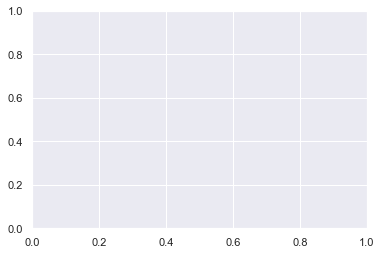

In [16]:
def boxplot_violin(data, datalabels = None, ylabel = None, title = None, ax = plt.gca()):
    '''Function that outpus a violin plot on top of a boxplot'''
    plt.boxplot(data, showmeans = True, showfliers = True)
    plt.violinplot(data, showextrema = False)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    xticks = [i+1 for i in range(len(data))]
    if datalabels == None :
        datalabels = xticks
    plt.setp(ax, xticks=xticks, xticklabels=datalabels)
    return ax

In [17]:
def eta_squared(x,y):
    '''function that computes the eta_squared for a categorical feature x and an numerical feature y.
    x and y are series that have the same length (and indices for the output to be meaningful)'''
    mean_y = y.mean()
    categories = []
    for category in x.unique():
        yi_category = y[x==category]
        categories.append({'ni': len(yi_category),
                           'mean_category': yi_category.mean()})
    #total variation (Total Sum of Squares)
    TSS = sum([(yj-mean_y)**2 for yj in y])
    #inter- (or between) class (or category) variation
    ESS = sum([c['ni']*(c['mean_category']-mean_y)**2 for c in categories])
    return ESS/TSS

<a id="Section5.4"></a>

<a id="Section5.4"></a>

## 2.3 Les Données

 #### Téléchargement des Données

In [18]:
PATH_TO_DATA = os.getcwd()
years = ["2015","2016"]
datasets = {}
for year in years:
    filename = '\\' + year + '-building-energy-benchmarking.csv'
    datasets[year] = pd.read_csv(PATH_TO_DATA + filename)

 #### Un Premier Regarde sur les Données
On vérifie que le téléchargements des données c'est bien passé, la taille des deux datasets, le percentage des valeurs nuls et le type des données.

In [19]:
for data in datasets.values():
    display(data.head())

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   
3              5      2015  NonResidential               Hotel   
4              8      2015  NonResidential               Hotel   

            PropertyName TaxParcelIdentificationNumber  \
0   MAYFLOWER PARK HOTEL                     659000030   
1        PARAMOUNT HOTEL                     659000220   
2           WESTIN HOTEL                     659000475   
3              HOTEL MAX                     659000640   
4  WARWICK SEATTLE HOTEL                     659000970   

                                            Location  CouncilDistrictCode  \
0  {'latitude': '47.61219025', 'longitude': '-122...                    7   
1  {'latitude': '47.61310583', 'longitude': '-122...                    7   
2  {'latitude': '47.61334897', 'longitude': '-122...                    7   
3  {'latitude': '47.61421585', 'longitude': '-122...                    7   
4  {'latitude': '47.6137544', 'longitude': '-122....                    7   

  Neighborhood  YearBuilt  ...  GHGEmissionsIntensity(kgCO2e/ft2)  \
0     DOWNTOWN       1927  ...                               2.64   
1     DOWNTOWN       1996  ...                               2.38   
2     DOWNTOWN       1969  ...                               1.92   
3     DOWNTOWN       1926  ...                              31.38   
4     DOWNTOWN       1980  ...                               4.02   

   DefaultData  Comment  ComplianceStatus       Outlier 2010 Census Tracts  \
0           No      NaN         Compliant           NaN                NaN   
1           No      NaN         Compliant           NaN                NaN   
2          Yes      NaN         Compliant           NaN                NaN   
3           No      NaN         Compliant  High Outlier                NaN   
4           No      NaN         Compliant           NaN                NaN   

  Seattle Police Department Micro Community Policing Plan Areas  \
0                                               14.0              
1                                               14.0              
2                                               56.0              
3                                               56.0              
4                                               56.0              

   City Council Districts SPD Beats  Zip Codes  
0                     NaN      31.0      18081  
1                     NaN      31.0      18081  
2                     NaN      31.0      18081  
3                     NaN      31.0      18081  
4                     NaN      31.0      19576  

[5 rows x 47 columns]

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

In [20]:
for k, data in datasets.items() : 
    print(f"Taille du data de {k}: {data.shape}")

Taille du data de 2015: (3340, 47)
Taille du data de 2016: (3376, 46)


In [21]:
compare_columns(datasets["2015"], datasets["2016"], "2015", "2016")

Colonnes dans les deux datasets :
--------------------------------------------------
NumberofFloors
BuildingType
NaturalGas(kBtu)
LargestPropertyUseType
SourceEUIWN(kBtu/sf)
SecondLargestPropertyUseTypeGFA
Outlier
Neighborhood
SiteEnergyUseWN(kBtu)
ThirdLargestPropertyUseType
PrimaryPropertyType
CouncilDistrictCode
SiteEUIWN(kBtu/sf)
SourceEUI(kBtu/sf)
SecondLargestPropertyUseType
SiteEUI(kBtu/sf)
PropertyGFATotal
ThirdLargestPropertyUseTypeGFA
OSEBuildingID
SiteEnergyUse(kBtu)
PropertyGFABuilding(s)
ListOfAllPropertyUseTypes
SteamUse(kBtu)
ComplianceStatus
TaxParcelIdentificationNumber
YearBuilt
DataYear
PropertyGFAParking
NumberofBuildings
PropertyName
YearsENERGYSTARCertified
Electricity(kWh)
LargestPropertyUseTypeGFA
ENERGYSTARScore
Electricity(kBtu)
DefaultData
NaturalGas(therms)

Colonnes seulement dans le dataset 2015 :
--------------------------------------------------
City Council Districts
SPD Beats
2010 Census Tracts
Zip Codes
Location
Seattle Police Department Micro Communi

In [22]:
for k, data in datasets.items() :
    print(f"Percentage des valeurs nulles du dataset de {k}:")
    display(data.isnull().mean().sort_values())

Percentage des valeurs nulles du dataset de 2015:


OSEBuildingID                                                    0.000000
ComplianceStatus                                                 0.000000
PropertyGFABuilding(s)                                           0.000000
PropertyGFAParking                                               0.000000
PropertyGFATotal                                                 0.000000
NumberofBuildings                                                0.000000
YearBuilt                                                        0.000000
Neighborhood                                                     0.000000
Zip Codes                                                        0.000000
Location                                                         0.000000
PropertyName                                                     0.000000
PrimaryPropertyType                                              0.000000
BuildingType                                                     0.000000
DataYear                              

Percentage des valeurs nulles du dataset de 2016:


OSEBuildingID                      0.000000
PropertyGFABuilding(s)             0.000000
PropertyGFAParking                 0.000000
PropertyGFATotal                   0.000000
NumberofFloors                     0.000000
YearBuilt                          0.000000
Longitude                          0.000000
Latitude                           0.000000
Neighborhood                       0.000000
DefaultData                        0.000000
CouncilDistrictCode                0.000000
ComplianceStatus                   0.000000
State                              0.000000
City                               0.000000
Address                            0.000000
PropertyName                       0.000000
PrimaryPropertyType                0.000000
BuildingType                       0.000000
DataYear                           0.000000
TaxParcelIdentificationNumber      0.000000
SiteEnergyUse(kBtu)                0.001481
SiteEnergyUseWN(kBtu)              0.001777
SiteEUIWN(kBtu/sf)              

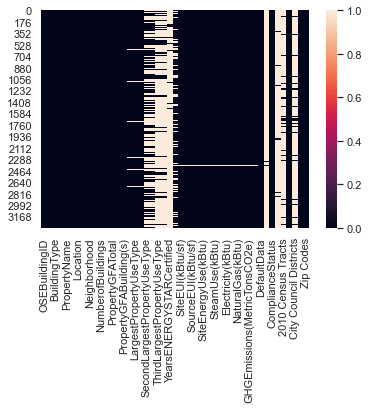

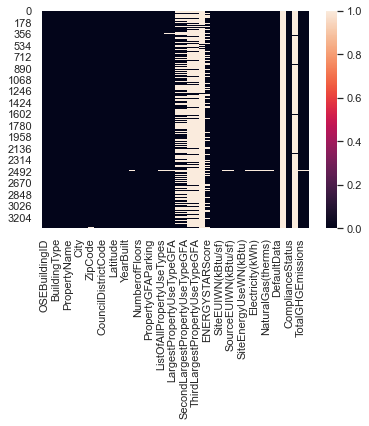

In [23]:
for k, data in datasets.items() :
    sns.heatmap(data.isnull())
    plt.show()

In [24]:
for k, data in datasets.items() :
    print(f"Data types du dataset de {k}:")
    display(data.dtypes)

Data types du dataset de 2015:


OSEBuildingID                                                      int64
DataYear                                                           int64
BuildingType                                                      object
PrimaryPropertyType                                               object
PropertyName                                                      object
TaxParcelIdentificationNumber                                     object
Location                                                          object
CouncilDistrictCode                                                int64
Neighborhood                                                      object
YearBuilt                                                          int64
NumberofBuildings                                                  int64
NumberofFloors                                                   float64
PropertyGFATotal                                                   int64
PropertyGFAParking                                 

Data types du dataset de 2016:


OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

<a id="Section2.3.1"></a>

### 2.3.1 Resumée - Les Données

* Les deux datasets n'ont pas la même taille, en nombre de bâtiments mais aussi en nombre de variable (colonnes).

* La plupart des variables est bien renseigné (moins que 1% de valeurs nulles)

* Après avoir regardé les colonnes pour voir lesquelles sont communes entre les deux datasets et lesquelles ne le sont pas, on voit que pour certaines colonnes (variables), il y a simplement une orthographe un peu différents : 
    * 'Comment' / 'Comments
    * 'Zip Codes' / 'ZipCode'
    * 'GHGEmissionsIntensity(kgCO2e/ft2)' / 'GHGEmissionsIntensity'
    * 'GHGEmissions(MetricTonsCO2e)' / 'TotalGHGEmissions'

<a id="Section3"></a>

# 3. Les Variables

<a id="Section3.1"></a>

## 3.1 Définitions

On regarde les définitions des différents variables pour les datasets "2015 Building Energy Benchmarking" et "2016 Building Energy Benchmarking" sur le site de la ville Seattle (équivalent aux datasets téléchargés) pour mieux comprendre les différents variables. En bas, sont les définitions (en anglais).

* **EPA** - Environmental Protection Agency - The Environmental Protection Agency is an independent executive agency of the United States federal government tasked with environmental protection matters.
* **GFA** -  Gross Floor Area -- measured in square feet
* **EUI** - Energy Use Intensity -- Energy Use (EU) per Area, measured kBtu per sf (see below for units)

* Units
    * **Btu** - British thermal units (Btu) = 0.2931 W⋅h (watt hours) (kBtu = 1000 Btu)
    * **sf** or **ft2** - square feet
    * **Wh** - Watt hour (kWh - kilo Watt hour = 1000 Wh)
    * **therms** - 100 000 Btu = 100 kBtu
    * **CO2e** - CO_2 equivalent
    * **kg** - kilogramm
    * **metric Ton** = 1000 kg


#### Variables

* Identification
    * **OSEBuildingID**	- A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.
    * **PropertyName** Official or common property name as entered in EPA’s Portfolio Manager.
    * **TaxParcelIdentificationNumber** - Property King County PIN

* **YearBuilt** - Year in which a property was constructed or underwent a complete renovation.

* Building Location
    * **Address** - Property street address
    * **City** - Property city
    * **State** - Property state
    * **Zip Codes** / **ZipCode** - Property zip
    * **CouncilDistrictCode** - Property City of Seattle council district.
    * **Neighborhood** - Property neighborhood area defined by the City of Seattle Department of Neighborhoods.
    * **Location** - Latitude and Longitude, "Human Address" = (Address, City, State, Zip Code)
    * **Latitude** - Property latitude.
    * **Longitude** - Property longitude.
    * **SPD Beats** - Seattle Police Department patrol area / beat
    * **Seattle Police Department Micro Community Policing Plan Areas** 
    * **2010 Census Tracts** - geographic area
    * **City Council Districts** - probably the same as 'CouncilDistrictCode'
    
* Building Information - size and area
    * **NumberofBuildings** - Number of buildings included in the property's report. In cases where a property is reporting as a campus, multiple buildings may be included in one report.
    * **NumberofFloors** - Number of floors reported in Portfolio Manager
    * **PropertyGFATotal** - Total building and parking gross floor area.
    * **PropertyGFAParking** - 	Total space in square feet of all types of parking (Fully Enclosed, Partially Enclosed, and Open).
    * **PropertyGFABuilding(s)** - 	Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc.

* Building Information - type and use    
    * **BuildingType** - City of Seattle building type classification.
    * **PrimaryPropertyType** - The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is the Property Type - EPA Calculated field from Portfolio Manager.
    * **ListOfAllPropertyUseTypes** - All property uses reported in Portfolio Manager
    * **LargestPropertyUseType** - The largest use of a property (e.g. office, retail store) by GFA.
    * **LargestPropertyUseTypeGFA** - The gross floor area (GFA) of the largest use of the property.
    * **SecondLargestPropertyUseType** - The second largest use of a property (e.g. office, retail store) by GFA.
    * **SecondLargestPropertyUseTypeGFA** - The gross floor area (GFA) of the second largest use of the property.
    * **ThirdLargestPropertyUseType** - The third largest use of a property (e.g. office, retail store) by GFA.
    * **ThirdLargestPropertyUseTypeGFA** - The gross floor area (GFA) of the third largest use of the property.


* ENERGY STAR
    * **YearsENERGYSTARCertified** - Years the property has received ENERGY STAR certification.
    * **ENERGYSTARScore** - An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to control for differences among climate, building uses, and operations. A score of 50 represents the national median.


* Energy Use - EU
    * **SiteEnergyUse(kBtu)** - The annual amount of energy consumed by the property from all sources of energy.
    * **SiteEnergyUseWN(kBtu)** - The annual amount of energy consumed by the property from all sources of energy, adjusted to what the property would have consumed during 30-year average weather conditions.
    * **SteamUse(kBtu)** - The annual amount of district steam consumed by the property on-site, measured in thousands of British thermal units (kBtu).
    * **Electricity(kWh)** - The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh.
    * **Electricity(kBtu)** - 	The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).
    * **NaturalGas(therms)** - The annual amount of utility-supplied natural gas consumed by the property, measured in therms.
    * **NaturalGas(kBtu)** - The annual amount of utility-supplied natural gas consumed by the property, measured in thousands of British thermal units (kBtu).
    * **OtherFuelUse(kBtu)**

* Energy Use Intensity - EUI (EU per Area)
    * **SiteEUI(kBtu/sf)** - Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.
    * **SiteEUIWN(kBtu/sf)** - Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet). WN Site Energy is the Site Energy Use the property would have consumed during 30-year average weather conditions. WN Site EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.
    * **SourceEUI(kBtu/sf)** - Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.
    * **SourceEUIWN(kBtu/sf)** - Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.



* Emissions
    * **GHGEmissions(MetricTonsCO2e)** / **TotalGHGEmissions** - The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.
    * **GHGEmissionsIntensity(kgCO2e/ft2)** / **GHGEmissionsIntensity** - Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources

* **DataYear** Calendar year (January-December) represented by each data record.

* **DefaultData** - The property used default data for at least one property characteristic.

* **ComplianceStatus** - Whether a property has met energy benchmarking requirements for the current reporting year.

* **Comment** / **Comments** - Comments by a building owner or agent to provide context to the building’s energy use.

* **Outlier** - Whether a property is a high or low outlier (Y/N)

<a id="Section3.2"></a>

## 3.2 Les Variables Pertinents

On peut grouper les variables dans trois différents groups: 


#### Variables Target
Ce sont les variable qu'un veut prédire donnant un certain nombre de paramètres à disposition. C'est le résultat / l'output des modèles qu'on veut créer.
Pour notre problématique se sont :
* Variables liées à la consommation d'énergie et aux émissions de CO2

#### Variables Paramètres
Ce sont les variables qui vont servir des paramètres (features)/ d'input pour les modèles. C'est avec ces données qu'on veut pouvoir prédire les variables target.
* Propriétés des bâtiments qui peuvent déterminer sa consommation d'énergie et ses émissions de CO2
    * Taille (surface, nombre d'étages)
    * Age
    * Type d'usage (vente, parking, ... )
    * Emplacement
    * Sources d'énergie (Seulement le type de sources d'énergie utilisé et pas leur quantité. Le but, c'est de plus dévoir faire des relèves de mètres d'énergie. Mais on peut quand même imaginer qu'on connaît les sources d'énergie utilisées par le bâtiment / propriété.)
    
#### Variables d'Aide
Ce sont les variables qui ne servent pas directement vers la création des modèles, mais qui contiennent d'information qui aide à nettoyer et interpréter les données.
* Variables qui aident à gérer et mieux comprendre les données (vérifier leur qualité, faire du nettoyage, ... )
    * Identificateur
    * Variables humaines
    * Indication sur la qualité des données

<a id="Section4"></a>

# 4. Variables Paramètres et d'Aide

<a id="Section4.1"></a>

## 4.1 L'Identificateur

Le **OSEBuildingID** est un identificateur mis en place par le "Seattle Office of Sustainability and Environment (OSE)" pour pouvoir suivre la consommation d'énergie et les emission des bâtiments d'une certaine taille. En bref, il est spécifiquement mis en place pour notre problématique et est donc naturellement le choix d'indentificateur. On va vérifier qu'il est effectivement unique dans chaqu'un des deux datasets.

Le **TaxParcelIdentificationNumber** est aussi un identificateur de propriété, mais il est plutôt utilisé pour les impôts. On va le suprimer car il n'apporte pas d'information de plus dans notre contexte.

On va garder le **PropertyName** car c'est le nom du bâtiment ou de la propriété et c'est une variable qui aide les humains à identifier les bâtiments ou propriétés et peut donc être utile. 



| Variable | Année | % complète | data type |
| --- | --- | --- | --- |
| **OSEBuildingID** | 2015 | 100% | int64 |
|  | 2016 | 100% | int64 |
| **PropertyName** | 2015 | 100% | object |
|  | 2016 | 100% | object |

<a id="Section4.1.1"></a>

### 4.1.1 OSEBuildingID

In [25]:
var = 'OSEBuildingID' 

In [26]:
compare_unique_value_occurences(datasets["2015"], datasets["2016"], var, "2015", "2016")

Pour la variable 'OSEBuildingID'
--------------------------------------------------
Valeurs uniques dans le dataset 2015: 3340 de 3340
Valeurs uniques dans le dataset 2016: 3376 de 3376
--------------------------------------------------
Valeurs uniques communes aux deux ensembles de données : 3284
Valeurs uniques seulement dans le dataset 2015 : 56
Valeurs uniques seulement dans le dataset 2016 : 92


In [27]:
#do a quick sampling to see if they generally are the same buildings/properties
datasets["2015"].set_index('OSEBuildingID').join(datasets["2016"].set_index('OSEBuildingID'), 
                                            how='inner', lsuffix='_2015', rsuffix='_2016')[
    ['PropertyName_2015', 'PropertyName_2016']].sample(20, random_state = 1)

PropertyName_2015  \
OSEBuildingID                                           
385                                      SKINNER BLDG   
786                  J D OTT COMPANY (2244 6th Ave S)   
49734                              COLLAGE APARTMENTS   
20296                          LEE AND LEE APARTMENTS   
21150                     FIRST FREE METHODIST CHURCH   
766                 SEATTLE TELECOM - 1200 3RD AVENUE   
21941               FIRST AND BROAD CONDO (ELLINGTON)   
26939                                     FIRST PLACE   
24282          HAMM BLDG MIXED USE/OFFICE RETAIL APTS   
21592                         HOLDEN COURT APARTMENTS   
27836                          THE MARQUIS APARTMENTS   
23858                                         PIER 55   
23327                     CLOCKTOWER APTS - 140 UNITS   
27416                                UNIVERSITY HOUSE   
19899                              METROPOLITAN TOWER   
23948                           MANHATTAN CONDOMINIUM   
21902                      MACMILLAN-PIPER/SOUTH PARK   
19876                                       U.S. BANK   
25660                               UNION TRUST ANNEX   
49829                         AEGIS LIVING ON MADISON   

                              PropertyName_2016  
OSEBuildingID                                    
385                            Skinner Building  
786            J D OTT COMPANY (2244 6th Ave S)  
49734                        Collage Apartments  
20296                            Lee & Lee Apts  
21150               First Free Methodist Church  
766                                1200 3rd Ave  
21941                                 Ellington  
26939                               First Place  
24282                             Hamm Building  
21592                   Holden Court Apartments  
27836            Marquis Cooperative Apartments  
23858                                   Pier 55  
23327                Clocktower Apartment Homes  
27416                          University House  
19899             Metropolitan Tower Apartments  
23948                             The Manhattan  
21902                                    Samson  
19876                                 U.S. BANK  
25660                         Union Trust Annex  
49829                          Aegis on Madison

In [28]:
#set 'OSEBuildingID' as the id-variable
id_var = 'OSEBuildingID'

<a id="Section4.1.2"></a>

### 4.1.2 PropertyName

In [29]:
var = "PropertyName"

In [30]:
#try to homogolize the format of the PropteryName
for k, data in datasets.items():
    datasets[k][var] = data[var].str.title()

In [31]:
compare_unique_value_occurences(datasets["2015"], datasets["2016"], var, "2015", "2016")

Pour la variable 'PropertyName'
--------------------------------------------------
Valeurs uniques dans le dataset 2015: 3287 de 3340
Valeurs uniques dans le dataset 2016: 3360 de 3376
--------------------------------------------------
Valeurs uniques communes aux deux ensembles de données : 872
Valeurs uniques seulement dans le dataset 2015 : 2415
Valeurs uniques seulement dans le dataset 2016 : 2488


In [32]:
#create a DataFrame with the combined data names
ly, ry = "2015", "2016"
lsuffix = "_" + ly
rsuffix = "_" + ry

df_comb = datasets[ly].set_index(id_var).join(datasets[ry].set_index(id_var), how='inner', lsuffix=lsuffix, rsuffix=rsuffix)[
          [var + lsuffix, var + rsuffix]]

In [33]:
df_comb[df_comb[var + lsuffix] != df_comb[var + rsuffix]][[var + lsuffix, var + rsuffix]]

PropertyName_2015  \
OSEBuildingID                                   
3                                Westin Hotel   
8                       Warwick Seattle Hotel   
9              West Precinct (Seattle Police)   
10                     Camlin Worldmark Hotel   
11                          Paramount Theater   
...                                       ...   
50033                  Compass On Dexter Apts   
50049              Pacific Center Condominium   
50055                      Identity Apts 4123   
50058                Wedgewood Estates Bldg A   
50059                Wedgewood Estates Bldg B   

                                  PropertyName_2016  
OSEBuildingID                                        
3                           5673-The Westin Seattle  
8                       Warwick Seattle Hotel (Id8)  
9                                     West Precinct  
10                                           Camlin  
11                                Paramount Theatre  
...                                             ...  
50033                             Compass On Dexter  
50049          Pacific Center Condominium (Id50049)  
50055          129610 - Identity Seattle Building D  
50058                  Wedgewood Estates Building A  
50059                  Wedgewood Estates Building B  

[2417 rows x 2 columns]

In [34]:
common_id = df_comb.index

In [35]:
var = "TaxParcelIdentificationNumber"
for k, data in datasets.items() :
    datasets[k] = data.drop(columns = [var])

<a id="Section4.1.3"></a>

### 4.1.3 Resumée - Identificateur

* L'identificateur **OSEBuildingID** est unique pour les deux datasets.
* Les noms des bâtiments / propriétés (**PropertyName**) ne sont pas renseignés d'une façon cohérente entre les deux années. L'orthographe et le format varient beaucoup (e.g. bldg au lieu de building, etc.). Mais ils se resemblent quand même et on peut supposer que l'identificateur 'OSEBuildingID' est en effet unique.
* En totale, on a 3432 bâtiments pour lesquels on a du data, dont 3284 ont du data pour 2015 et 2016.

<a id="Section4.2"></a>

## 4.2 La Localisation / l'Addresse

La localisation et l'addresse d'un bâtiment ou d'une propriété sont des variables qui aident à les identifier et retrouver.

La localisation d'un bâtiment est une variable qui peut avoir une influence sur la consommation d'énergie du bâtiment : le météo locale (vent, température, etc.), sources d'énergie disponibles, état des infrastructures, etc.
Ici, on a du data d'une seule ville (Seattle), alors, c'est possible que la localisation joue un rôle moins important. Cependent, Seattle est une ville au bord de la mer. On peut, alors, imaginer qu'il peuve quand même avoir des différences de météo (e.g. vent) entre la côte et le centre-ville.

Pour la localisation du bâtiment, on va utiliser la **Latitude** et la **Longitude**. Ce sont des variables numériques qui determinent parfaitment la localisation d'un bâtiment, et peuvent donc facilement être utilisées avec des algorithmes. De plus, la longitude et la latitude sont des coordonnées qu'on peut utiliser pour déterminer des distances entre deux endroits. Donc, elles peuvent servir pour déterminer la distance du bâtiment d'un point de référence (e.g. centre-ville) ou d'attribuer le bâtiment à une zone géographique (e.g. zone costale, etc.). Ces variables peuvent plus tard être transformer, i.e. utiliser pour faire du 'feature engineering'.

Dans les jeux de données, il y a aussi des variables qui indiquent des zones géographiques et administratives. Comme déjà dit, il y a moyenne que une zone géographique a un effet sur la consommation d'énergie d'un bâtiment. Mais, à ce stade et sans plus d'information, on ne peut pas dire ce que est la meilleur façon de découper la ville Seattle en zones géographiques. On va pour l'instant garder et regarder les classification en zones **Neighborhood** et **CouncilDistrictCode**. Le code postale (**ZipCode**) peut aussi être utilisé pour délilmiter une zone.

On va directement suprimer les variables **City Council Districts, SPD Beats, Seattle Police Department Micro Community Policing Plan Areas, et 2010 Census Tracts** car on estime qu'elles n'apportent pas plus d'information pertinentes. De plus, elles ne sont que dans le dataset de 2015.

Une addresse (**Address, City, State, ZipCode**), qui est plus pratique pour les humains pour localiser un bâtiment ou une propriété, est une combinaison d'un chiffre et un string et en conséquence ne se prête pas facilement aux algorithmes. Elles peuvent être utiliser pour afficher les bâtiments sur une carte ou peut-être aussi pour vérifier les coordonnées (latitude et longitude).


| Variable | Année | % complète | data type |
| --- | --- | --- | --- |
| **Latitude** | 2015 |  | information dans **Location** |
|  | 2016 | 100% | float64 |
| **Longitude** | 2015 |  | information dans **Location** |
|  | 2016 | 100% | float64 |
| **Address** | 2015 |  | information dans **Location** |
|  | 2016 | 100% | object |
| **City** | 2015 |  | information dans **Location** |
|  | 2016 | 100% | object |
| **State** | 2015 |  | information dans **Location** |
|  | 2016 | 100% | object |
| **ZipCode** | 2015 |  | information dans **Location** |
|  | 2016 | 99.5% | float64 |
| **Location** | 2015 | 100% | object |
|  | 2016 |  |  |
| **Neighborhood** | 2015 | 100% | object |
|  | 2016 | 100% | object |
| **CouncilDistrictCode** | 2015 | 100% | int64 |
|  | 2016 | 100% | int64 |

<a id="Section4.2.1"></a>

### 4.2.1 Adaptation des Datasets

La variable **Location** dans le dataset de 2015 contient plusieurs variables dans un format de dictionnaire. On va extraire ces variables et les adapter au format du dataset de 2016.
De plus on va supprimer les colonnes qui sont dans 2015 mais pas dans 2016.

In [36]:
pd.set_option('display.max_colwidth', None)
display(datasets["2015"][["Location"]].sample(10, random_state=1))
pd.reset_option('display.max_colwidth')

Location
2667      {'latitude': '47.66893632', 'longitude': '-122.3710315', 'human_address': '{"address": "5501 11TH AVE NW", "city": "SEATTLE", "state": "WA", "zip": "98107"}'}
2399      {'latitude': '47.67022757', 'longitude': '-122.3122289', 'human_address': '{"address": "5625 15TH AVE NE", "city": "SEATTLE", "state": "WA", "zip": "98105"}'}
2859        {'latitude': '47.63203903', 'longitude': '-122.3478289', 'human_address': '{"address": "1425 5TH AVE N", "city": "SEATTLE", "state": "WA", "zip": "98109"}'}
2397   {'latitude': '47.69116711', 'longitude': '-122.3508854', 'human_address': '{"address": "8520 EVANSTON AVE N", "city": "SEATTLE", "state": "WA", "zip": "98103"}'}
1819  {'latitude': '47.62845478', 'longitude': '-122.356118', 'human_address': '{"address": "1012 QUEEN ANNE AVE N", "city": "SEATTLE", "state": "WA", "zip": "98109"}'}
896       {'latitude': '47.59891814', 'longitude': '-122.325426', 'human_address': '{"address": "409 MAYNARD AVE S", "city": "SEATTLE", "state": "WA", "zip": "98104"}'}
730       {'latitude': '47.56582643', 'longitude': '-122.4086242', 'human_address': '{"address": "4163 BEACH DR SW", "city": "SEATTLE", "state": "WA", "zip": "98116"}'}
1398          {'latitude': '47.60456484', 'longitude': '-122.3177288', 'human_address': '{"address": "300 11TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98122"}'}
203          {'latitude': '47.61591919', 'longitude': '-122.34571548', 'human_address': '{"address": "2401 4TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98121"}'}
366        {'latitude': '47.72385371', 'longitude': '-122.3407784', 'human_address': '{"address": "1430 N 130TH ST", "city": "SEATTLE", "state": "WA", "zip": "98133"}'}

In [37]:
#cast Location into Latitude, Longitude, Address, City, State and ZipCode
datasets["2015"] = datasets["2015"].join(pd.DataFrame.from_dict([{"latitude" : j["latitude"]} | {"longitude" : j["longitude"]} |
                                                { k:v for k,v in literal_eval(j["human_address"]).items()} 
                                                for j in [literal_eval(i) for i in datasets["2015"]["Location"].values]]))

In [38]:
datasets["2015"].rename(columns = {k : k.capitalize() for k in ['latitude', 'longitude', 'address', 'city', 'state']}, 
                        inplace = True)
datasets["2015"].rename(columns = {'zip' : 'ZipCode'}, 
                        inplace = True)

In [39]:
datasets["2015"][['ZipCode', 'Zip Codes']].value_counts(sort = False)

ZipCode  Zip Codes
98101    18081        228
         19576          2
         19578          4
98102    18376        159
         18390          2
                     ... 
98155    19579          3
98177    18229          3
98178    18230          3
         18800          1
98199    18235         69
Length: 73, dtype: int64

In [40]:
#drop columns that are not needed, including Location and 'Zip Codes'
datasets["2015"].drop(columns = ["Location", "City Council Districts", "SPD Beats", 
                                 "Seattle Police Department Micro Community Policing Plan Areas", 
                                 "2010 Census Tracts", "Zip Codes"], inplace = True)

In [41]:
#set the same data types for the different columns and try to harmonize the formatting as much as possible
select = datasets["2016"]['ZipCode'].notna()
datasets["2016"].loc[select, 'ZipCode'] = datasets["2016"].loc[select, 'ZipCode'].apply(int).apply(str)
#datasets["2015"]['ZipCode'] = datasets["2015"]['ZipCode'].apply(str)

datasets["2016"]['Address'] = datasets["2016"]['Address'].str.upper()
datasets["2015"]['City'] = datasets["2015"]['City'].str.title()

datasets["2015"] = datasets["2015"].astype({'Latitude' :'float64', 'Longitude' : 'float64'})

<a id="Section4.2.2"></a>

### 4.2.2 Latitude, Longitude

In [42]:
var = ['Latitude', 'Longitude']

In [43]:
#round the latitude and the longitude to the same number of decimals in both data sets
decimals = pd.Series([5, 5], index=var)
for k, data in datasets.items() :
    datasets[k][var] = data[var].round(decimals)

In [44]:
for k, data in datasets.items() :
    display(data[var].describe(include = 'all'))

Latitude    Longitude
count  3340.000000  3340.000000
mean     47.624091  -122.335013
std       0.047924     0.027169
min      47.499330  -122.414000
25%      47.599838  -122.350565
50%      47.618495  -122.332710
75%      47.657223  -122.319897
max      47.733810  -122.220470

Latitude    Longitude
count  3376.000000  3376.000000
mean     47.624033  -122.334795
std       0.047758     0.027203
min      47.499170  -122.414250
25%      47.599860  -122.350662
50%      47.618675  -122.332495
75%      47.657115  -122.319407
max      47.733870  -122.220970

In [45]:
df_comb["LocationChange"] = data_comparison(datasets["2015"], datasets["2016"], var, id_var, get_distance)
df_comb["LocationChange"].describe()

count    3284.000000
mean       31.086892
std       135.263511
min         0.000000
25%         5.022554
50%        13.341075
75%        29.971379
max      3213.349691
Name: LocationChange, dtype: float64

In [46]:
pd.cut(df_comb['LocationChange'], bins = [0, 50, 100, 200, 500, 1000, 5000], include_lowest=True).value_counts(sort = False)

(-0.001, 50.0]      2848
(50.0, 100.0]        296
(100.0, 200.0]       109
(200.0, 500.0]        24
(500.0, 1000.0]        0
(1000.0, 5000.0]       7
Name: LocationChange, dtype: int64

In [47]:
for k, data in datasets.items():
    datasets[k][['EastWestDistance', 'NorthSouthDistance']] = create_EW_NS_coordinates(data[['Latitude', 'Longitude']])
    datasets[k]['CenterDistance'] = create_center_distance(data[['Latitude', 'Longitude']])
    display(datasets[k][['EastWestDistance', 'NorthSouthDistance', 'CenterDistance']].describe())

EastWestDistance  NorthSouthDistance  CenterDistance
count       3340.000000         3340.000000     3340.000000
mean        -417.567964         2284.340719     4905.005389
std         2039.269526         5334.909485     3734.503410
min        -6346.000000       -11604.000000       41.000000
25%        -1584.500000         -415.500000     1779.750000
50%         -245.000000         1661.500000     3750.000000
75%          717.000000         5972.500000     7261.750000
max         8180.000000        14498.000000    14688.000000

EastWestDistance  NorthSouthDistance  CenterDistance
count       3376.000000         3376.000000     3376.000000
mean        -401.199941         2277.946386     4898.434538
std         2041.822405         5316.432054     3712.421392
min        -6365.000000       -11622.000000       30.000000
25%        -1592.250000         -413.000000     1782.750000
50%         -228.500000         1681.500000     3778.000000
75%          754.000000         5960.500000     7240.250000
max         8142.000000        14505.000000    14712.000000

<a id="Section4.2.3"></a>

### 4.2.3 Address

In [48]:
var = ['Address']

In [49]:
address_dict = {"STREET":"ST", "AVENUE":"AVE", "PLACE":"PL", "BOULEVARD":"BLVD",
                "SOUTH":"S", "NORTH":"N", "EAST":"E", "WEST":"W", 
                "FIRST":"1ST", "SECOND":"2ND", "THIRD":"3RD", "FOURTH":"4TH", "FIFTH":"5TH", "SIXTH":"6TH",
                "." : "", ",":"",  "-" : "", "  ":" "}

In [50]:
df_comb['AddressChange'] = data_comparison(datasets["2015"], datasets["2016"], var, id_var, 
                                        func=lambda x1, x2 : replace_words(x1,address_dict) != replace_words(x2, address_dict))
df_comb['AddressChange'].value_counts()

False    2637
True      647
Name: AddressChange, dtype: int64

<AxesSubplot:>

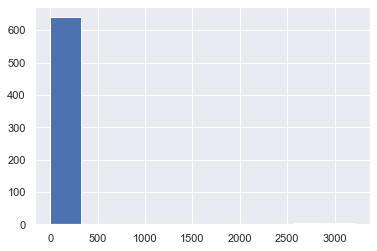

In [51]:
df_comb[df_comb['AddressChange'] == True][['AddressChange', 'LocationChange']].join(
    datasets["2015"].set_index(id_var)[var].join(datasets["2016"].set_index(id_var)[var], 
                                             how = 'inner', lsuffix = "2015", rsuffix = "2016"),
    how = 'left')['LocationChange'].hist()

<a id="Section4.2.4"></a>

### 4.2.4 Neighborhood, CouncilDistrictCode, ZipCode

In [52]:
var = ['CouncilDistrictCode', 'Neighborhood', 'ZipCode']

In [53]:
for k, data in datasets.items() :
    datasets[k] = datasets[k].astype({'CouncilDistrictCode' : 'string'})
    datasets[k]['Neighborhood'] =  datasets[k]['Neighborhood'].str.upper()

In [54]:
for v in var:
    for k, data in datasets.items() :
        tmp_list = np.sort(data[data[v].notna()][v].unique())
        print(f"Valeurs unique de {v} dans le dataset {k}: {len(tmp_list)}\n{tmp_list}")
        print()

Valeurs unique de CouncilDistrictCode dans le dataset 2015: 7
['1' '2' '3' '4' '5' '6' '7']

Valeurs unique de CouncilDistrictCode dans le dataset 2016: 7
['1' '2' '3' '4' '5' '6' '7']

Valeurs unique de Neighborhood dans le dataset 2015: 13
['BALLARD' 'CENTRAL' 'DELRIDGE' 'DOWNTOWN' 'EAST' 'GREATER DUWAMISH'
 'LAKE UNION' 'MAGNOLIA / QUEEN ANNE' 'NORTH' 'NORTHEAST' 'NORTHWEST'
 'SOUTHEAST' 'SOUTHWEST']

Valeurs unique de Neighborhood dans le dataset 2016: 14
['BALLARD' 'CENTRAL' 'DELRIDGE' 'DELRIDGE NEIGHBORHOODS' 'DOWNTOWN' 'EAST'
 'GREATER DUWAMISH' 'LAKE UNION' 'MAGNOLIA / QUEEN ANNE' 'NORTH'
 'NORTHEAST' 'NORTHWEST' 'SOUTHEAST' 'SOUTHWEST']

Valeurs unique de ZipCode dans le dataset 2015: 28
['98101' '98102' '98103' '98104' '98105' '98106' '98107' '98108' '98109'
 '98112' '98115' '98116' '98117' '98118' '98119' '98121' '98122' '98125'
 '98126' '98133' '98134' '98136' '98144' '98146' '98155' '98177' '98178'
 '98199']

Valeurs unique de ZipCode dans le dataset 2016: 55
['98006' '980

In [55]:
datasets["2016"].replace({'Neighborhood' : {'DELRIDGE NEIGHBORHOODS' : 'DELRIDGE'}}, inplace = True)

In [56]:
df_tmp = datasets["2016"].set_index(id_var)[['ZipCode']].join(datasets["2015"].set_index(id_var)[['ZipCode']], 
                                                              how = 'inner', rsuffix = '_2015', lsuffix = '_2016')
display(df_tmp[~df_tmp['ZipCode_2016'].isin(df_tmp['ZipCode_2015'])].value_counts())
display(df_tmp[~df_tmp['ZipCode_2015'].isin(df_tmp['ZipCode_2016'])].value_counts())

ZipCode_2016  ZipCode_2015
98168         98108           2
98164         98104           2
98154         98104           2
98124         98134           2
98006         98101           1
98011         98101           1
98204         98104           1
98198         98109           1
98191         98101           1
98181         98101           1
98165         98125           1
98145         98105           1
98127         98107           1
98114         98122           1
98113         98133           1
98111         98134           1
              98115           1
              98101           1
98070         98103           1
98053         98106           1
98040         98104           1
98033         98119           1
98028         98109           1
98020         98103           1
98013         98133           1
              98103           1
98012         98102           1
98272         98125           1
dtype: int64

Series([], dtype: int64)

In [57]:
output = display_variable_changes(datasets["2015"], datasets["2016"], var, id_var)

   4 bâtiments changent le CouncilDistrictCode
   6 bâtiments changent le Neighborhood
 176 bâtiments changent le ZipCode
 183 bâtiments changent un de ces variables


<a id="Section4.2.5"></a>

### 4.2.5 Resumée - Emplacement / Address

 #### Latitude et Longitude
* La **Latitude** et la **Longitude** sont renseigées pour tous les bâtiments / propriétés. 
* Pour la plus part entre eux, elles sont cohérentes entre les années 2015 et 2016 :
    * Pour **2848 bâtiments / propriétés les emplacements diffèrent de moins de 50 m entre les deux années**. Ce sont 86.7% des bâtiments / propriétes pour lesquelles il y a du data pour 2015 et 2016. Cette variation est negligable, car c'est de l'ordre de la taille d'un bâtiment un peu plus grand, i.e. pas une maison de famille. De plus, elle peut aussi être lié aux erreurs d'arrondi.
    * **7 bâtiments / propriétés ont valeurs erronées pour au moins un des deux années 2015 ou 2016. L'emplacement de ces bâtiments change plus de 1km entre les deux années !**
    
 #### EastWestDistance, NorthSouthDistance, CenterDistance
* Ces variables mésurent l'emplacement est-ouest, nord-sud et la distance de centre ville (la mairie). 
* Les variables 'EastWestDistance' et 'NorthSouthDistance' sont des projections sur les axes est-ouest et nord-sud avec le centre ville à (0,0) et peuvent être négatives. La taille géographiquement d'une ville est assez pétite, pour qu'on peut supposer une rélation linéaire avec les variables 'Longitude' et 'Latitude', respectivement. On n'a besoin que soit ('Latitude', 'Longitude') soit ('NorthSouthDistance', 'EastWestDistance'). Pour la création du modèle, on va donc que garder un de ceux paires : ('NorthSouthDistance', 'EastWestDistance')


 #### Address, City, State 
* Les addresses (**Address**) comme les noms des propriétés (**PropertyName**) sont renseignées pour tous les bâtiments / propriétes. Mais **ces variables n'ont pas un format cohérente d'une année à l'autre**. Ca le rend plus difficile de vérifier si ces données sont bien renseignées. Mais, à ce stade, ce n'est pas grave, car ces variables ne servent que pour la compréhension des humains. Elles pourraient être importantes plus tard pour une application qui affiche ces informations.
* Pour la plupart, l'emplacement de la propriété comme indiquée par les coordonées géographiques ('Latitude', 'Longitude') ne change pas beaucoup même quand les addresses ne se correspondent pas pour les deux années.
* **Tous les bâtiments / propriétés sont à Seattle, WA**. Les variables indicantes la ville et l'état (**City**, **State**) sont toutes renseignées et identiques. Alors, on n'en va pas avoir besoin car il n'y a aucune variation.

 #### ZipCode, Neighborhood, CouncilDistrictCode
* Le code postal, le quartier et le code du quartier du conseil municipal (**ZipCode**, **Neighborhood**, **CouncilDistrictCode**) sont tous, à l'exception de quelques code postals (moins de 5%), entièrement renseignées.
    * Pour le quartier ('Neighborhood') on a 13 valeurs uniques.
    * Pour le code de quartier du conseil municipal ('CouncilDistrictCode') on a 7 valeurs uniques.
    * **Pour le code postal, il y a des incohérences** entre les deux datasets
        * Il y a 27 'ZipCode' qui sont dans le dataset de 2016, mais pas dans celui de 2015.
        * Le format d'entrer le 'ZipCode' a peut-être changer entre 2015 et 2016. Pour 2015, il y a aussi le 'Zip Codes' qui sont différents des 'ZipCode'. Le rapport entre les deux n'est pas évident.
* On s'attend que ces variables ne changent pas d'une année d'autre, car l'emplacement des propriétées normalement ne change pas. Cependent 183 (< 6%) bâtiments/propriétes  changent un de ces variables.
    * 4 bâtiments changent le 'CouncilDistrictCode'
    * 6 bâtiments changent le 'Neighborhood'
    * 176 bâtiments changent le 'ZipCode'
* Ces variables sont toutes une façon de grouper les bâtiments dans des différents zones. A ce stade, c'est difficle à dire, si ce type de classement peut avoir une influence sur la consommation d'énergie. Pour l'emplacement des bâtiments, on a déjà 'CenterDistance' et les pairs 'Latitude'/'Longitude' ou 'EastWestDistance'/'NorthSouthDistance qui sont des variables numériques qui donne de l'information.

<a id="Section4.3"></a>

## 4.3 Taille du Bâtiment / de la Propriété

Pour décrire la taille du bâtiment / de la propriété, il y a plusieurs variables : 
* La surface de la propriété et sa repartition entre surface de bâtiment et surface de parking (**PropertyGFATotal**, **PropertyGFABuilding(s)**, **PropertyGFAParking**). On va vérifier qu'en effect la surface totals est la somme de la surface bâtiment et parking. 
* Le nombre des bâtiments sur la propriété (**NumberofBuildings**), pour les cas où une propriété est déclarée en tant que campus et/ou comprend plusieurs bâtiments.
* Le nombre d'étages (**NumberofFloors**), qui donne une indication sur l'hauteur du bâtiment.

Ces variables sont très importante pour la détermination de la consommation d'un bâtiment. C'est tout à fait normale d'anticiper qu'un bâtiment plus grand va, en générale, consommer plus d'énergie.

| Variable | Année | % complète | data type |
| --- | --- | --- | --- |
| **PropertyGFATotal** | 2015 | 100% | int64 |
|  | 2016 | 100% | int64 |
| **PropertyGFABuilding(s)** | 2015 | 100% | int64 |
|  | 2016 | 100% | int64 |
| **PropertyGFAParking** | 2015 | 100% | int64 |
|  | 2016 | 100% | int64 |
| **NumberofBuildings** | 2015 | 100% | int64 |
|  | 2016 | >97.5% | float64 |
| **NumberofFloors** | 2015 | >97.5% | float64 |
|  | 2016 | 100% | int64 |

Deux de ces variables ne sont pas entièrement renseignées (**NumberofBuildings** pour l'année 2016 et **NumberofFloors** pour l'année 2015.).

<a id="Section4.3.1"></a>

### 4.3.1 PropertyGFATotal, PropertyGFABuilding(s), PropertyGFAParking

In [58]:
var = ['PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking']

In [59]:
for k, data in datasets.items():
    display(data[var].join(
            pd.DataFrame((data['PropertyGFAParking'] + data['PropertyGFABuilding(s)'] - data['PropertyGFATotal']), 
                          columns = ['ParkingPlusBuildingMinusTotal'] )).describe())

PropertyGFATotal  PropertyGFABuilding(s)  PropertyGFAParking  \
count      3.340000e+03            3.340000e+03         3340.000000   
mean       9.077289e+04            7.971886e+04        11054.032335   
std        1.493058e+05            1.292314e+05        35296.330507   
min        2.000000e+04           -5.055000e+04           -3.000000   
25%        2.848700e+04            2.668300e+04            0.000000   
50%        4.385500e+04            4.132600e+04            0.000000   
75%        8.842800e+04            7.872600e+04         4304.250000   
max        2.200000e+06            2.200000e+06       512608.000000   

       ParkingPlusBuildingMinusTotal  
count                         3340.0  
mean                             0.0  
std                              0.0  
min                              0.0  
25%                              0.0  
50%                              0.0  
75%                              0.0  
max                              0.0

PropertyGFATotal  PropertyGFABuilding(s)  PropertyGFAParking  \
count      3.376000e+03            3.376000e+03         3376.000000   
mean       9.483354e+04            8.683201e+04         8001.526066   
std        2.188376e+05            2.079398e+05        32326.723928   
min        1.128500e+04            3.636000e+03            0.000000   
25%        2.848700e+04            2.775600e+04            0.000000   
50%        4.417500e+04            4.321600e+04            0.000000   
75%        9.099200e+04            8.427625e+04            0.000000   
max        9.320156e+06            9.320156e+06       512608.000000   

       ParkingPlusBuildingMinusTotal  
count                         3376.0  
mean                             0.0  
std                              0.0  
min                              0.0  
25%                              0.0  
50%                              0.0  
75%                              0.0  
max                              0.0

In [60]:
show_var = [id_var, 'PropertyName'] + var
display(datasets["2015"][datasets["2015"]['PropertyGFABuilding(s)'] < 0][show_var])
display(datasets["2015"][datasets["2015"]['PropertyGFAParking'] < 0][show_var])

OSEBuildingID                    PropertyName  PropertyGFATotal  \
3139          29788   Queen Anne Square West (2013)             54015   
3322          50002  Freeway Motors University Audi             33648   

      PropertyGFABuilding(s)  PropertyGFAParking  
3139                  -43310               97325  
3322                  -50550               84198

OSEBuildingID   PropertyName  PropertyGFATotal  PropertyGFABuilding(s)  \
2428          25530   Water'S Edge             20967                   20970   
3136          29551  625 5Th Ave S             68452                   68454   

      PropertyGFAParking  
2428                  -3  
3136                  -2

In [61]:
display(datasets["2016"].set_index(id_var).loc[datasets["2015"].set_index(id_var)[
                                               datasets["2015"].set_index(id_var)['PropertyGFABuilding(s)'] < 0].index, : 
                                               ].reset_index()[show_var])
display(datasets["2016"].set_index(id_var).loc[datasets["2015"].set_index(id_var)[
                                               datasets["2015"].set_index(id_var)['PropertyGFAParking'] < 0].index, : 
                                               ].reset_index()[show_var])

OSEBuildingID                  PropertyName  PropertyGFATotal  \
0          29788  Queen Anne Square West (220)             54015   
1          50002         Audi Seattle Uva Bldg             33648   

   PropertyGFABuilding(s)  PropertyGFAParking  
0                   54015                   0  
1                   33648                   0

OSEBuildingID       PropertyName  PropertyGFATotal  PropertyGFABuilding(s)  \
0          25530       Water'S Edge             20967                   20967   
1          29551  625 Union Station             68452                   68452   

   PropertyGFAParking  
0                   0  
1                   0

Le total de la surface de la propriété ('PropertyGFATotal') est par construction la somme de la surface du bâtiment ('PropertyGFABuilding(s)') et du parking ('PropertyGFAParking'). Il y a des valeurs négatifs pour les surfaces pour l'année 2015, ce qu'est un erreur.
Après avoir regarder ces valeurs pour l'année suivant, on remarque que le 'PropertyGFATotal' est correct et qu'il y a eu un erreur dans les deux autres entrées. On corrige cet erreur.

In [62]:
for k, data in datasets.items():
    data['PropertyGFAParking']     = np.where(data['PropertyGFAParking'] < 0, 0, data['PropertyGFAParking'])
    data['PropertyGFABuilding(s)'] = np.where(data['PropertyGFAParking'] < 0, data['PropertyGFATotal'], 
                                                                              data['PropertyGFABuilding(s)'])
    data['PropertyGFABuilding(s)'] = np.where(data['PropertyGFABuilding(s)'] < 0, data['PropertyGFATotal'], 
                                                                                  data['PropertyGFABuilding(s)'])
    data['PropertyGFAParking']     = np.where(data['PropertyGFABuilding(s)'] < 0, 0, data['PropertyGFAParking'])
    
    datasets[k]['PropertyGFATotal'] = data['PropertyGFABuilding(s)'] + data['PropertyGFAParking']

In [63]:
output = display_variable_changes(datasets["2015"], datasets["2016"], var, id_var)

  68 bâtiments changent le PropertyGFATotal
 518 bâtiments changent le PropertyGFABuilding(s)
 473 bâtiments changent le PropertyGFAParking
 520 bâtiments changent un de ces variables


L'erreur la plus commune, c'est d'inclure la surface du parking dans celui du bâtiment. On peut détecter cette erreur, si on compare les entrées des deux années. Quand le total de la surface ne change pas entre les deux années mais pour une des deux années la surface du parking et zero, on peut supposer que pour cette année la surface du parking était à tort inclue dans celle du bâtiment.
On va corriger cette erreur.
De plus on va corriger les cas pour lesquels les valeurs de bâtiment sont identique, mais un des deux parking est à zéro.

In [64]:
var = ['PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking']

for (k1, k2) in [("2015", "2016"), ("2016","2015")] :
    data = datasets[k1][[id_var] + var].join(datasets[k2][[id_var] + var ].set_index(id_var), 
                                              how = "left", on=id_var, lsuffix = k1, rsuffix = k2)
    select = ((data['PropertyGFATotal'+ k1] - data['PropertyGFATotal'+k2]) == 0) & \
             ((data['PropertyGFAParking'+ k2] - data['PropertyGFAParking'+k1]) > 0) & \
             ((data['PropertyGFAParking'+ k1] == 0))
    datasets[k1].loc[select, 'PropertyGFAParking'] = data[select]['PropertyGFAParking' + k2]
    datasets[k1].loc[select, 'PropertyGFABuilding(s)'] = data[select]['PropertyGFABuilding(s)' + k2]
    
    select = ((data['PropertyGFABuilding(s)'+ k1] - data['PropertyGFABuilding(s)'+k2]) == 0) & \
             ((data['PropertyGFAParking'+ k2] - data['PropertyGFAParking'+k1]) > 0) & \
             ((data['PropertyGFAParking'+ k1] == 0))
    datasets[k1].loc[select, 'PropertyGFAParking'] = data[select]['PropertyGFAParking' + k2]
    datasets[k1].loc[select, 'PropertyGFATotal'] = data[select]['PropertyGFATotal' + k2]
    
    select = ((data['PropertyGFABuilding(s)'+ k1] == data['PropertyGFATotal'+k2]) & \
              (data['PropertyGFAParking'+ k2] == data['PropertyGFAParking'+k1]) & \
              (data['PropertyGFAParking'+ k1] != 0))
    datasets[k1].loc[select, 'PropertyGFABuilding(s)'] = data[select]['PropertyGFABuilding(s)' + k2]
    datasets[k1].loc[select, 'PropertyGFATotal'] = data[select]['PropertyGFATotal' + k2]
    

In [65]:
var = ['PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking']
output = display_variable_changes(datasets["2015"], datasets["2016"], var, id_var)

  64 bâtiments changent le PropertyGFATotal
  64 bâtiments changent le PropertyGFABuilding(s)
  19 bâtiments changent le PropertyGFAParking
  64 bâtiments changent un de ces variables


De base, on peut penser que la taille d'un bâtiment ne change pas. Cependent, il peut avoir de la construction et aussi de la démolition. Pour avoir une estimation de la qualité des données on va regarder le changement de surface entre les deux années.

In [66]:
df_comb[[v + '_Change' for v in var]] = data_comparison(datasets["2015"], datasets["2016"], var, id_var)
df_comb[[v + '_Change' for v in var]].describe()

PropertyGFATotal_Change  PropertyGFABuilding(s)_Change  \
count              3284.000000                    3284.000000   
mean                 97.640987                    -235.321559   
std                9154.786492                    9848.455646   
min             -180493.000000                 -248068.000000   
25%                   0.000000                       0.000000   
50%                   0.000000                       0.000000   
75%                   0.000000                       0.000000   
max              313846.000000                  260000.000000   

       PropertyGFAParking_Change  
count                3284.000000  
mean                  332.962546  
std                  8190.535381  
min               -138000.000000  
25%                     0.000000  
50%                     0.000000  
75%                     0.000000  
max                239252.000000

In [67]:
for v in var :
    print(pd.cut(df_comb[v + '_Change'], 
           bins = [-1000001, -10001, -1001, -101, -1, 0, 100, 1000, 10000, 1000000], 
           include_lowest=True).value_counts(sort = False))
    print()

(-1000001.001, -10001.0]      15
(-10001.0, -1001.0]           12
(-1001.0, -101.0]              0
(-101.0, -1.0]                 2
(-1.0, 0.0]                 3220
(0.0, 100.0]                   0
(100.0, 1000.0]                1
(1000.0, 10000.0]             12
(10000.0, 1000000.0]          22
Name: PropertyGFATotal_Change, dtype: int64

(-1000001.001, -10001.0]      22
(-10001.0, -1001.0]            8
(-1001.0, -101.0]              1
(-101.0, -1.0]                 2
(-1.0, 0.0]                 3220
(0.0, 100.0]                   0
(100.0, 1000.0]                1
(1000.0, 10000.0]             12
(10000.0, 1000000.0]          18
Name: PropertyGFABuilding(s)_Change, dtype: int64

(-1000001.001, -10001.0]       1
(-10001.0, -1001.0]            2
(-1001.0, -101.0]              0
(-101.0, -1.0]                 0
(-1.0, 0.0]                 3265
(0.0, 100.0]                   0
(100.0, 1000.0]                1
(1000.0, 10000.0]              3
(10000.0, 1000000.0]          12
Name: Propert

In [68]:
select = (abs(df_comb['PropertyGFAParking_Change']) > 1000) |\
         (abs(df_comb['PropertyGFATotal_Change']) > 1000) |\
         (abs(df_comb['PropertyGFABuilding(s)_Change']) > 1000) 
df_comb[select][[v + '_Change' for v in var]]

PropertyGFATotal_Change  PropertyGFABuilding(s)_Change  \
OSEBuildingID                                                           
3                              -5880.0                      -202598.0   
8                              55690.0                         6150.0   
19                             24800.0                         -400.0   
41                            -16038.0                       -16038.0   
96                            -87820.0                       -78668.0   
...                                ...                            ...   
49867                           8949.0                      -137738.0   
49893                           5996.0                         2596.0   
49918                           5461.0                         5461.0   
49924                          14501.0                        14501.0   
49945                          30095.0                      -125905.0   

               PropertyGFAParking_Change  
OSEBuildingID                             
3                               196718.0  
8                                49540.0  
19                               25200.0  
41                                   0.0  
96                               -9152.0  
...                                  ...  
49867                           146687.0  
49893                             3400.0  
49918                                0.0  
49924                                0.0  
49945                           156000.0  

[61 rows x 3 columns]

In [69]:
var = ['PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking']
output = display_variable_changes(datasets["2015"], datasets["2016"], var, id_var)

  64 bâtiments changent le PropertyGFATotal
  64 bâtiments changent le PropertyGFABuilding(s)
  19 bâtiments changent le PropertyGFAParking
  64 bâtiments changent un de ces variables


<a id="Section4.3.2"></a>

### 4.3.2 NumberofFloors, NumberofBuildings

In [70]:
var = ['NumberofBuildings', 'NumberofFloors']

In [71]:
for k, data in datasets.items() :
    datasets[k] = data.astype({v :'float64' for v in var})

In [72]:
display(datasets["2015"][var].describe().join(datasets["2016"][var].describe(), lsuffix = "_2015", rsuffix = "_2016"))

NumberofBuildings_2015  NumberofFloors_2015  NumberofBuildings_2016  \
count             3340.000000          3332.000000             3368.000000   
mean                 1.035629             4.682173                1.106888   
std                  0.784463             5.458460                2.108402   
min                  1.000000             0.000000                0.000000   
25%                  1.000000             2.000000                1.000000   
50%                  1.000000             4.000000                1.000000   
75%                  1.000000             5.000000                1.000000   
max                 39.000000            99.000000              111.000000   

       NumberofFloors_2016  
count          3376.000000  
mean              4.709123  
std               5.494465  
min               0.000000  
25%               2.000000  
50%               4.000000  
75%               5.000000  
max              99.000000

In [73]:
df_tmp = pd.DataFrame(index = range(0,200))
for v in var :
    for k, data in datasets.items() :
        df_tmp[v+k] = data[v].value_counts().sort_index()
df_tmp.dropna(how='all').fillna(0)

NumberofBuildings2015  NumberofBuildings2016  NumberofFloors2015  \
0                      0.0                   92.0                 5.0   
1                   3321.0                 3175.0               451.0   
2                      5.0                   37.0               444.0   
3                      3.0                   22.0               701.0   
4                      1.0                   12.0               700.0   
5                      0.0                   10.0               289.0   
6                      3.0                    5.0               299.0   
7                      3.0                    1.0               133.0   
8                      0.0                    3.0                60.0   
9                      0.0                    2.0                18.0   
10                     1.0                    2.0                31.0   
11                     1.0                    1.0                32.0   
12                     0.0                    0.0                18.0   
13                     0.0                    0.0                20.0   
14                     0.0                    2.0                12.0   
15                     0.0                    0.0                 8.0   
16                     1.0                    1.0                 7.0   
17                     0.0                    0.0                 9.0   
18                     0.0                    0.0                 7.0   
19                     0.0                    0.0                 6.0   
20                     0.0                    0.0                 4.0   
21                     0.0                    0.0                 5.0   
22                     0.0                    0.0                 4.0   
23                     0.0                    1.0                 6.0   
24                     0.0                    0.0                 7.0   
25                     0.0                    0.0                 5.0   
26                     0.0                    0.0                 6.0   
27                     0.0                    1.0                 5.0   
28                     0.0                    0.0                 2.0   
29                     0.0                    0.0                 3.0   
30                     0.0                    0.0                 1.0   
31                     0.0                    0.0                 2.0   
32                     0.0                    0.0                 1.0   
33                     0.0                    0.0                 6.0   
34                     0.0                    0.0                 2.0   
36                     0.0                    0.0                 2.0   
37                     0.0                    0.0                 2.0   
38                     0.0                    0.0                 1.0   
39                     1.0                    0.0                 1.0   
40                     0.0                    0.0                 1.0   
41                     0.0                    0.0                 2.0   
42                     0.0                    0.0                 6.0   
46                     0.0                    0.0                 1.0   
47                     0.0                    0.0                 1.0   
49                     0.0                    0.0                 1.0   
55                     0.0                    0.0                 1.0   
56                     0.0                    0.0                 1.0   
63                     0.0                    0.0                 1.0   
76                     0.0                    0.0                 1.0   
99                     0.0                    0.0                 1.0   
111                    0.0                    1.0                 0.0   

     NumberofFloors2016  
0                  16.0  
1                 466.0  
2                 439.0  
3                 692.0  
4                 692.0  
5                 295.0  
6                 306.0  


Une propriété doit au moins avoir un bâtiment avec au moins un étage. Les valeurs de '0' pour ces variables sont aberantes. Alors, on va les corriger avec la valeur donnée pour l'autre année, s'il existe. Autrement on va mettre un '1'. 
On va traiter les valeur 'nuls' (nan) de la même façon.
Pour une traîtement avancée, on pourra imaginer d'imputer avec le médian. Pour les nombre des étages, ca pourra être significant.

In [74]:
for v in var :
    for (k1, k2) in [("2015", "2016"), ("2016","2015")] :
        data = datasets[k1][[id_var, v]].join(datasets[k2][[id_var, v]].set_index(id_var), 
                                              how = "left", on=id_var, lsuffix = k1, rsuffix = k2)
        select1 = data[v+k1].isna() | (data[v+k1] == 0)
        select2 = data[v+k2].isna() | (data[v+k2] == 0)
        datasets[k1][v] = np.where(select1, np.where(select2, 1, data[v+k2]), data[v+k1])

In [75]:
df_comb[[v + '_Change' for v in var]] = data_comparison(datasets["2015"], datasets["2016"], var, id_var)
datasets["2015"].set_index(id_var)[var].join(datasets["2016"].set_index(id_var)[var], how='inner', 
                                             lsuffix='_2015', rsuffix='_2016').join(
                                             df_comb[[v + '_Change' for v in var]], how = 'inner').describe()

NumberofBuildings_2015  NumberofFloors_2015  NumberofBuildings_2016  \
count             3284.000000          3284.000000             3284.000000   
mean                 1.034409             4.696407                1.101705   
std                  0.784232             5.490565                0.916899   
min                  1.000000             1.000000                1.000000   
25%                  1.000000             2.000000                1.000000   
50%                  1.000000             4.000000                1.000000   
75%                  1.000000             5.000000                1.000000   
max                 39.000000            99.000000               27.000000   

       NumberofFloors_2016  NumberofBuildings_Change  NumberofFloors_Change  
count          3284.000000               3284.000000                 3284.0  
mean              4.696407                  0.067296                    0.0  
std               5.490565                  1.072477                    0.0  
min               1.000000                -38.000000                    0.0  
25%               2.000000                  0.000000                    0.0  
50%               4.000000                  0.000000                    0.0  
75%               5.000000                  0.000000                    0.0  
max              99.000000                 26.000000                    0.0

In [76]:
pd.cut(df_comb['NumberofBuildings_Change'], bins = [-40, -11,-6, -2, -1, 0, 1, 5, 10 ,40], 
       include_lowest=True).value_counts(sort = False)

(-40.001, -11.0]       1
(-11.0, -6.0]          0
(-6.0, -2.0]           4
(-2.0, -1.0]           4
(-1.0, 0.0]         3191
(0.0, 1.0]            33
(1.0, 5.0]            41
(5.0, 10.0]            6
(10.0, 40.0]           4
Name: NumberofBuildings_Change, dtype: int64

In [77]:
var = ['PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'NumberofBuildings', 'NumberofFloors']
output = display_variable_changes(datasets["2015"], datasets["2016"], var, id_var)

  64 bâtiments changent le PropertyGFATotal
  64 bâtiments changent le PropertyGFABuilding(s)
  19 bâtiments changent le PropertyGFAParking
  93 bâtiments changent le NumberofBuildings
   0 bâtiments changent le NumberofFloors
 154 bâtiments changent un de ces variables


<a id="Section4.3.3"></a>

### 4.3.3 Resumée - Taille du Bâtiment / de la Propriété

 #### PropertyGFATotal, PropertyGFABuilding(s), PropertyGFAParking
* 'PropertyGFATotal' =  'PropertyGFABuilding(s)' + 'PropertyGFAParking' par construction, car il n'y a aucune déviation de cette formule.
    * On a corrigé les instances pour lesquelles la valeur d'une surface était négative.
* Pour les propriétés pour lesquelles ont des données pour les deux années, on vérifie que la surface et sa repartition entre parking et bâtiment n'a pas changé.
    * On corrige les changements qui indiquent que la surface du parking était à tort inclue dans celle du bâtiment.
* 68 propriétés changent leur surface totale, dont 65 de plus de 1000sf.

#### NumberofFloors, NumberofBuildings
* Pas tous les propriétés ont eu le nombre d'étages et nombre de bâtiments renseignés. On a imputé ces valeurs avec les valeurs de l'autre année si disponible autrement avec '1'.
* De la même façon, on a corrigé les entrées '0' qui étaient abberantes avec les valeurs de l'autre année si disponible autrement avec '1'.
* 93 propriétés changent le nombre de bâtiments d'une année à l'autre, dont 56 ont un changement de plus d'un bâtiment avec 11 de plus de 5 bâtiments, ce que indique une erreur dans le data de au moins une des deux années.



* Des propriétés pour lesquelles ont de data pour les deux années, 158 change au moins un des variables qui indiquent la taille de la propriété / bâtiment.

<a id="Section4.4"></a>

## 4.4 Construction / Rénovation Majeur du Bâtiment

Les codes de construction évoluent avec le temps. La façon de construire un bâtiment peut très bien jouer un rôle sur sa consommation d'énergie. Si un bâtiment est mal isolé, le chauffage en hiver va sûrement nécessiter plus d'énergie.

On note aussi que les températures peuvent changer d'année à année. Dans une année avec un hiver clément, on a tendence d'utiliser moins d'énergie pour chauffer. 
* La variable **YearBuilt** indique l'année que le bâtiment était construit ou rénové complètement.
* La variable **DataYear** indique l'année pour laquelle les données étaient prises.

| Variable | Année | % complète | data type |
| --- | --- | --- | --- |
| **YearBuilt** | 2015 | 100% | int64 |
|  | 2016 | 100% | int64 |
| **DataYear** | 2015 | 100% | int64 |
|  | 2016 | 100% | int64 |

<a id="Section4.4.1"></a>

### 4.4.1 YearBuilt

In [78]:
var = 'YearBuilt'
df_comb[var + '_Change'] = data_comparison(datasets["2015"], datasets["2016"], var, id_var)
df_comb[var + '_Change'].describe()

count    3284.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: YearBuilt_Change, dtype: float64

In [79]:
for k, data in datasets.items():
    datasets[k]["BuildingAge"] = data['DataYear']-data['YearBuilt']

In [80]:
df_comb.drop(columns = [var + '_Change'], inplace = True)

<a id="Section4.4.2"></a>

### 4.4.2 Resumée -  Construction / Rénovation Majeur du Bâtiment

 #### YearBuilt
* Il n'y a aucune changement de l'année de construction / rénovation entre les deux datasets. Alors, les écarts de taille de la propriéte entre les deux années indiquent qu'il y a une erreur dans au moins un des deux datasets.

#### BuildingAge
* On va construire la variable **BuildingAge**, qui indique l'âge du bâtiment au moment des relèves. On va plutôt utiliser cette variable pour la modèlisation de la consommation d'énergie. On note que si on veut utiliser le modèle sur des années plus tard, il va peut-être adjuster cette variable. Il y a moyen que la dâte de construction (normes de construction) joue un rôle plus important que l'âge du bâtiment (entretien). Cependent à quelques années près, il ne doit pas avoir trop de changement. Et on pourra aussi imaginer que les modèles doivent être mise à jour régulièrement, aussi pour prendre en compte le changement climatique.

<a id="Section4.5"></a>

<a id="Section4.5"></a>

## 4.5 Type d'usage du Bâtiment

A part la taille du bâtiment, on peut bien imaginer que la façon un bâtiment est utilisé va influencer sa consommation d'énergie. Une salle de stockage ne va surement pas utiliser autant d'énergie q'un data center.

* Les variables **BuildingType**, **PrimaryPropertyType**, **ListOfAllPropertyUseTypes**, **LargestPropertyUseType**, **SecondLargestPropertyUseType**, **ThirdLargestPropertyUseType** donnent tous information sur le type de bâtiment et son usage. 
* Les variables **LargestPropertyUseTypeGFA**, **SecondLargestPropertyUseTypeGFA** et **ThirdLargestPropertyUseTypeGFA** donne de l'information combien de la surface du bâtiment est utilisé pour les top trois types d'usages.


| Variable | Année | % complète | data type |
| --- | --- | --- | --- |
| **BuildingType** | 2015 | 100% | object |
|  | 2016 | 100% | object |
| **PrimaryPropertyType** | 2015 | 100% | object |
|  | 2016 | 100% | object |
| **LargestPropertyUseType** | 2015 | >95.9% | object |
|  | 2016 | 99.4% |object  |
| **LargestPropertyUseTypeGFA** | 2015 | >95.9% | float64 |
|  | 2016 | 99.4% | float64 |
| **SecondLargestPropertyUseType** | 2015 | 46.7% | object |
|  | 2016 | 49.7% | object |
| **SecondLargestPropertyUseTypeGFA** | 2015 | 46.7% | float64 |
|  | 2016 | 49.7% | float64 |
| **ThirdLargestPropertyUseType** | 2015 | 16.8% | object |
|  | 2016 | 17.7% | object |
| **ThirdLargestPropertyUseTypeGFA** | 2015 | 16.8% | float64 |
|  | 2016 | 17.7% | float64 |
| **ListOfAllPropertyUseTypes** | 2015 | 96.2% | object |
|  | 2016 | >99.7% | object |

<a id="Section4.5.1"></a>

### 4.5.1 BuildingType

In [81]:
var = 'BuildingType'

In [82]:
pd.set_option('display.max_rows', 160)
display(pd.DataFrame(datasets["2015"][var].value_counts(sort = False)).join(
        pd.DataFrame(datasets["2016"][var].value_counts(sort = False)), 
        how = 'outer', lsuffix = "_2015", rsuffix = "_2016").fillna(0))

BuildingType_2015  BuildingType_2016
Campus                             22.0                 24
Multifamily HR (10+)              107.0                110
Multifamily LR (1-4)             1029.0               1018
Multifamily MR (5-9)              554.0                580
NonResidential                   1461.0               1460
Nonresidential COS                 68.0                 85
Nonresidential WA                   0.0                  1
SPS-District K-12                  99.0                 98

On voit qu'il y a plusieurs catégories qui non résidentiel et on peut supposer que les suffixes 'COS' et 'WA' signifient respectivement 'City of Seatle' et 'Washington'. C'est simplement une indice que la propriété est gérée par la ville ou l'état Washington.
De même 'SPS' signifie 'Seattle Public Schools' et 'SPS-District K-12' indiquent les écoles primaires et sécondaires publique.
On peut imaginer que les propriétés publiques sont gérées différemment que les propriétés publiques. On va alors créer une variable de type one-hot **PublicBuilding** qui indique si la propriété est publique ou pas. De plus, on va renommener 'Nonresidential COS' et 'Nonresidential WA' par 'NonResidential', car l'information sur la gestion publique est maintenant contenu dans la variable 'PublicBuilding'

In [83]:
for k, data in datasets.items():
    datasets[k]['PublicBuilding'] = np.where(data['BuildingType'].str.contains('COS|SPS|WA', regex = True), 1, 0)
    datasets[k]['BuildingType'] = np.where(data['BuildingType'].str.contains('Nonresidential', regex = False), 
                                                                             'NonResidential', data['BuildingType'])

In [84]:
var = ['BuildingType', 'PublicBuilding']
#output = 
tmp = display_variable_changes(datasets["2015"], datasets["2016"], var, id_var)
display(datasets["2015"][datasets["2015"][id_var].isin((tmp[0][tmp[0] == True]).index.values)][var + ['PropertyName', id_var,
                                                                                                     'NumberofBuildings']])
display(datasets["2016"][datasets["2016"][id_var].isin((tmp[0][tmp[0] == True]).index.values)][var + ['PropertyName', id_var,
                                                                                                     'NumberofBuildings']])

   3 bâtiments changent le BuildingType
   1 bâtiments changent le PublicBuilding
   3 bâtiments changent un de ces variables


BuildingType  PublicBuilding                      PropertyName  \
979   Multifamily LR (1-4)               0            Washington Care Center   
1711        NonResidential               1  Joint Training Facilities Campus   
1727  Multifamily MR (5-9)               0           Taylor Anne Condominium   

      OSEBuildingID  NumberofBuildings  
979           20377                1.0  
1711          23117                1.0  
1727          23174                1.0

BuildingType  PublicBuilding                      PropertyName  \
966         NonResidential               0            Washington Care Center   
1692                Campus               0  Joint Training Facilities Campus   
1707  Multifamily LR (1-4)               0           Taylor Anne Condominium   

      OSEBuildingID  NumberofBuildings  
966           20377                1.0  
1692          23117                5.0  
1707          23174                1.0

<a id="Section4.5.2"></a>

### 4.5.2 PrimaryPropertyType

In [85]:
var = 'PrimaryPropertyType'

In [86]:
compare_unique_values(datasets["2015"], datasets["2016"], var, "2015", "2016")

Valeurs dans les deux datasets :
--------------------------------------------------
Other
Medical Office
High-Rise Multifamily
Mixed Use Property
Low-Rise Multifamily
Refrigerated Warehouse
Large Office
Retail Store
Worship Facility
Mid-Rise Multifamily
Small- and Mid-Sized Office
Laboratory
Senior Care Community
Restaurant
K-12 School
Hotel
Hospital
Self-Storage Facility
Distribution Center

Valeurs seulement dans le dataset 2015 :
--------------------------------------------------
Distribution Center

Supermarket/Grocery Store
Non-Refrigerated Warehouse
College/University
Restaurant

Residence Hall/Dormitory
Self-Storage Facility

SPS-District K-12

Valuer seulement dans le dataset 2016 :
--------------------------------------------------
Office
University
Residence Hall
Supermarket / Grocery Store
Warehouse



Il y a évidemment des fautes de frappe et aussi des petites incohérences entres les deux années pour les differents catégories de 'PrimaryPropertyType'

In [87]:
propertyuse_dict = {"University" : "College/University", 
                    "Warehouse" : "Non-Refrigerated Warehouse",
                    "Supermarket / Grocery Store" :  "Supermarket/Grocery Store",
                    "Residence Hall" : "Residence Hall/Dormitory", 
                    "SPS-District K-12" : "K-12 School"}
for k, data in datasets.items() :
    data['PrimaryPropertyType'] = data['PrimaryPropertyType'].str.strip()
    data.replace({'PrimaryPropertyType' : propertyuse_dict}, inplace = True)

In [88]:
compare_unique_values(datasets["2015"], datasets["2016"], var, "2015", "2016")

Valeurs dans les deux datasets :
--------------------------------------------------
Other
Medical Office
High-Rise Multifamily
College/University
Mixed Use Property
Low-Rise Multifamily
Refrigerated Warehouse
Supermarket/Grocery Store
Residence Hall/Dormitory
Large Office
Retail Store
Worship Facility
Mid-Rise Multifamily
Small- and Mid-Sized Office
Laboratory
Senior Care Community
Restaurant
K-12 School
Hotel
Non-Refrigerated Warehouse
Hospital
Self-Storage Facility
Distribution Center

Valeurs seulement dans le dataset 2015 :
--------------------------------------------------

Valuer seulement dans le dataset 2016 :
--------------------------------------------------
Office



<a id="Section4.5.3"></a>

### 4.5.3 LargestPropertyUseType

In [89]:
var = ['PrimaryPropertyType','LargestPropertyUseType']

In [90]:
pd.set_option('display.max_rows', 90)
display(pd.DataFrame(datasets["2015"][var].value_counts(sort = False)).join(
        pd.DataFrame(datasets["2016"][var].value_counts(sort = False)), 
        how = 'outer', lsuffix = "_2015", rsuffix = "_2016").fillna(0))
pd.set_option('display.max_rows', 60)

0_2015  \
PrimaryPropertyType         LargestPropertyUseType                                       
College/University          College/University                                    21.0   
Distribution Center         Distribution Center                                   51.0   
High-Rise Multifamily       Multifamily Housing                                   97.0   
Hospital                    Hospital (General Medical & Surgical)                  9.0   
Hotel                       Hotel                                                 67.0   
K-12 School                 K-12 School                                          136.0   
Laboratory                  Laboratory                                             0.0   
Large Office                Office                                               165.0   
Low-Rise Multifamily        Multifamily Housing                                  953.0   
Medical Office              Medical Office                                        41.0   
Mid-Rise Multifamily        Multifamily Housing                                  521.0   
Mixed Use Property          Bank Branch                                            1.0   
                            Distribution Center                                    1.0   
                            Fitness Center/Health Club/Gym                         1.0   
                            Hotel                                                  1.0   
                            Laboratory                                             1.0   
                            Medical Office                                         2.0   
                            Multifamily Housing                                   27.0   
                            Non-Refrigerated Warehouse                            12.0   
                            Office                                                30.0   
                            Other                                                  9.0   
                            Other - Education                                      2.0   
                            Other - Entertainment/Public Assembly                  2.0   
                            Other - Recreation                                     1.0   
                            Other - Restaurant/Bar                                 2.0   
                            Parking                                               12.0   
                            Residence Hall/Dormitory                               1.0   
                            Restaurant                                             1.0   
                            Retail Store                                           9.0   
                            Self-Storage Facility                                  0.0   
                            Senior Care Community                                  1.0   
                            Social/Meeting Hall                                    2.0   
                            Strip Mall                                             1.0   
                            Supermarket/Grocery Store                              2.0   
Non-Refrigerated Warehouse  Non-Refrigerated Warehouse                           182.0   
Office                      Office                                                 0.0   
Other                       Adult Education                                        2.0   
                            Automobile Dealership                                  6.0   
                            Bank Branch                                            3.0   
                            Convention Center                                      1.0   
                            Courthouse                                             1.0   
                            Data Center                                            2.0   
                            Financial Office                                       3.0   
                            Fi

Les deux variables 'PrimaryPropertyType' est 'LargestPropertyUseType' sont très similaires. Dans beaucoup des instances ils sont identiques. La variable 'LargestPropertyUseType' a plus de catégories qui autrement sont grouper dans les catégories 'Mixed Use Property' et 'Other'. Il y quelques petits incohérences et doublons, qu'on va corriger pour mieux aligner ces deux catégories.

* Dans 'PrimaryPropertyType', on va changer:
    * 'Hospital' pour 'Hospital (General Medical & Surgical)'
    * 'Restaurant' pour 'Restaurant/Bar'
    * 'High-Rise Multifamily', 'Mid-Rise Multifamily', et 'Low-Rise Multifamily' par 'Multifamily Housing'. Finalement, l'information sur le nombre des étages peut être trouver dans la variable 'NumberofFloors'.
    * On va supposer que 'Office' veut effectivement dire 'Small- and Mid-Sized Office'
* Pour l'instant, on ne va rien change sur 'LargestPropertyTypeUse', car il y moyen cette variable est lié aux variables 'ListOfAllPropertyUseTypes', 'SecondLargestPropertyUseType' et 'ThirdLargestPropertyUseType'. 

In [91]:
for k, data in datasets.items() :
    data.replace({'PrimaryPropertyType' : {'Hospital' : 'Hospital (General Medical & Surgical)', 
                                           'Office' : 'Small- and Mid-Sized Office'}}, inplace = True)
    data['PrimaryPropertyType'] = np.where(data['PrimaryPropertyType'].str.contains('Multifamily', regex = False),
                                           'Multifamily Housing', data['PrimaryPropertyType'])

In [92]:
output = display_variable_changes(datasets["2015"], datasets["2016"], var, id_var)

  40 bâtiments changent le PrimaryPropertyType
 142 bâtiments changent le LargestPropertyUseType
 156 bâtiments changent un de ces variables


<a id="Section4.5.4"></a>

### 4.5.4 ListOfAllPropertyUseTypes
#### et LargestPropertyUseType, SecondLargestPropertyUseType, ThirdLargestPropertyUseType, 

In [93]:
var = ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']

In [94]:
usetype_list = []
for v in var :
    for k, data in datasets.items():
        usetype_list += list(data[v].unique())
usetype_list = sorted([i for i in set(usetype_list) if str(i) != 'nan'])
print(f"Le nombre de types d'usage unique est : {len(usetype_list)}")
print(usetype_list)

Le nombre de types d'usage unique est : 65
['Adult Education', 'Automobile Dealership', 'Bank Branch', 'Bar/Nightclub', 'College/University', 'Convenience Store without Gas Station', 'Convention Center', 'Courthouse', 'Data Center', 'Distribution Center', 'Enclosed Mall', 'Fast Food Restaurant', 'Financial Office', 'Fire Station', 'Fitness Center/Health Club/Gym', 'Food Sales', 'Food Service', 'Hospital (General Medical & Surgical)', 'Hotel', 'K-12 School', 'Laboratory', 'Library', 'Lifestyle Center', 'Manufacturing/Industrial Plant', 'Medical Office', 'Movie Theater', 'Multifamily Housing', 'Museum', 'Non-Refrigerated Warehouse', 'Office', 'Other', 'Other - Education', 'Other - Entertainment/Public Assembly', 'Other - Lodging/Residential', 'Other - Mall', 'Other - Public Services', 'Other - Recreation', 'Other - Restaurant/Bar', 'Other - Services', 'Other - Technology/Science', 'Other - Utility', 'Other/Specialty Hospital', 'Outpatient Rehabilitation/Physical Therapy', 'Parking', 'Per

In [95]:
var = 'ListOfAllPropertyUseTypes'

In [96]:
for k, data in datasets.items() :
    display(data[['ListOfAllPropertyUseTypes']].sample(10, random_state=1))

ListOfAllPropertyUseTypes
2667                                Multifamily Housing
2399                                Multifamily Housing
2859                                Multifamily Housing
2397                                                NaN
1819                                Multifamily Housing
896   Multifamily Housing, Office, Restaurant, Retai...
730                                 Multifamily Housing
1398                                Multifamily Housing
203       Financial Office, Laboratory, Office, Parking
366                          Non-Refrigerated Warehouse

ListOfAllPropertyUseTypes
1394                   Multifamily Housing
1964           Distribution Center, Office
2578  Multifamily Housing, Office, Parking
893     Multifamily Housing, Office, Other
1419                   Multifamily Housing
3240        Automobile Dealership, Parking
2152                         Office, Other
297                     Laboratory, Office
2422          Multifamily Housing, Parking
3180                   Multifamily Housing

In [97]:
for k, data in datasets.items():
    if sum([isinstance(data.loc[i, 'ListOfAllPropertyUseTypes'], str) for i in data.index]) :
        data['ListOfAllPropertyUseTypes'] = data['ListOfAllPropertyUseTypes'].str.split(r',\s*(?![^()]*\))')

In [98]:
listusetype_list = []
for k, data in datasets.items():
    for i_list in data['ListOfAllPropertyUseTypes'] :
        if isinstance(i_list, list):
            listusetype_list += i_list
listusetype_list = list(set(listusetype_list))
print(f"Le nombre de types d'usage unique est : {len(listusetype_list)}")
print(listusetype_list)

Le nombre de types d'usage unique est : 68
['Other - Recreation', 'Other/Specialty Hospital', 'Convention Center', 'Other', 'Other - Education', 'Medical Office', 'College/University', 'Social/Meeting Hall', 'Energy/Power Station', 'Urgent Care/Clinic/Other Outpatient', 'Outpatient Rehabilitation/Physical Therapy', 'Convenience Store without Gas Station', 'Adult Education', 'Bar/Nightclub', 'Enclosed Mall', 'Personal Services (Health/Beauty, Dry Cleaning, etc)', 'Refrigerated Warehouse', 'Supermarket/Grocery Store', 'Fire Station', 'Performing Arts', 'Data Center', 'Courthouse', 'Residence Hall/Dormitory', 'Single Family Home', 'Wholesale Club/Supercenter', 'Other - Lodging/Residential', 'Other - Public Services', 'Other - Services', 'Other - Technology/Science', 'Retail Store', 'Police Station', 'Worship Facility', 'Vocational School', 'Office', 'Food Service', 'Residential Care Facility', 'Hospital (General Medical & Surgical)', 'Lifestyle Center', 'Other - Utility', 'Automobile Deal

In [99]:
intersection_and_setdifferences(usetype_list, listusetype_list)

(['Other - Recreation',
  'Convention Center',
  'Other/Specialty Hospital',
  'Other',
  'Other - Education',
  'Medical Office',
  'College/University',
  'Social/Meeting Hall',
  'Urgent Care/Clinic/Other Outpatient',
  'Outpatient Rehabilitation/Physical Therapy',
  'Convenience Store without Gas Station',
  'Bar/Nightclub',
  'Adult Education',
  'Enclosed Mall',
  'Personal Services (Health/Beauty, Dry Cleaning, etc)',
  'Refrigerated Warehouse',
  'Fire Station',
  'Supermarket/Grocery Store',
  'Performing Arts',
  'Courthouse',
  'Data Center',
  'Other - Public Services',
  'Residence Hall/Dormitory',
  'Wholesale Club/Supercenter',
  'Other - Lodging/Residential',
  'Other - Services',
  'Other - Technology/Science',
  'Retail Store',
  'Police Station',
  'Worship Facility',
  'Vocational School',
  'Office',
  'Food Service',
  'Residential Care Facility',
  'Hospital (General Medical & Surgical)',
  'Lifestyle Center',
  'Other - Utility',
  'Automobile Dealership',
  'La

In [100]:
for k, data in datasets.items() :
    display(pd.DataFrame([data[data['ListOfAllPropertyUseTypes'].isna()][
                                   ['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'PrimaryPropertyType']].count(),
                          data[data['LargestPropertyUseType'].isna()][
                                   ['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'PrimaryPropertyType']].count()],
                         index = ['ListOfAllPropertyUseTypes_isNA', 'LargestPropertyUseType_isNA']))

ListOfAllPropertyUseTypes  \
ListOfAllPropertyUseTypes_isNA                          0   
LargestPropertyUseType_isNA                             9   

                                LargestPropertyUseType  PrimaryPropertyType  
ListOfAllPropertyUseTypes_isNA                       0                  127  
LargestPropertyUseType_isNA                          0                  136

ListOfAllPropertyUseTypes  \
ListOfAllPropertyUseTypes_isNA                          0   
LargestPropertyUseType_isNA                            11   

                                LargestPropertyUseType  PrimaryPropertyType  
ListOfAllPropertyUseTypes_isNA                       0                    9  
LargestPropertyUseType_isNA                          0                   20

Les variables 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType' et 'ListOfAllPropertyUseTypes' sont liées. Elles contiennent les même catégories ('PropertyUseTypes').

La variable 'PrimaryPropertyType' est remplie à 100% de base. Les variables 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType' sont prèsque reseignées au complète, il y a seulement quelques entrées nuls. On note que si 'ListOfAllPRopertyUseTypes' est nul, 'LargestPropertyUseType' est aussi nul, mais l'inverse n'est pas toujours le cas.
* On va, alors, d'abord imputer la variable 'ListOfAllPropertyUseTypes' (avec 'PrimaryPropertyUse' - d'une façon que l'entrée correspond à une des catégories des 'PropertyUseTypes'). 
* On replace 'Other' dans 'LargestPropertyUseType', s'il y a une autre valeur dans 'ListOfAllPropertyUsetypes'et même façon on remplie les valeurs nuls

In [101]:
for k, data in datasets.items():
    data['ListOfAllPropertyUseTypes'] = data['ListOfAllPropertyUseTypes'].fillna(pd.Series(
                                        np.where(data['PrimaryPropertyType'].isin(listusetype_list),
                                                 data['PrimaryPropertyType'], 
                                                 np.where(data['PrimaryPropertyType'].str.contains('Office', regex = False),
                                                          'Office', 'Other'))))
    data['ListOfAllPropertyUseTypes'] = [[i] if isinstance(i,str) else i  for i in data['ListOfAllPropertyUseTypes']]
    datasets[k]['NumberofPropertyUseTypes'] = data['ListOfAllPropertyUseTypes'].apply(len)
    data['LargestPropertyUseType'] = np.where((data['LargestPropertyUseType'] == 'Other') | \
                                              (data['LargestPropertyUseType'].isna()),
                                              find_usetype('LargestPropertyUseType'), 
                                              data['LargestPropertyUseType'])

In [102]:
var = ['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
for k, data in datasets.items() :
    display(data.groupby('NumberofPropertyUseTypes', dropna = False)[var].count())

ListOfAllPropertyUseTypes  LargestPropertyUseType  \
NumberofPropertyUseTypes                                                      
1                                              1775                    1775   
2                                              1005                    1005   
3                                               365                     365   
4                                               120                     120   
5                                                43                      43   
6                                                22                      22   
7                                                 5                       5   
8                                                 2                       2   
9                                                 3                       3   

                          SecondLargestPropertyUseType  \
NumberofPropertyUseTypes                                 
1                                                    0   
2                                                 1000   
3                                                  364   
4                                                  120   
5                                                   43   
6                                                   22   
7                                                    5   
8                                                    2   
9                                                    3   

                          ThirdLargestPropertyUseType  
NumberofPropertyUseTypes                               
1                                                   0  
2                                                   1  
3                                                 364  
4                                                 120  
5                                                  43  
6                                                  22  
7                                                   5  
8                                                   2  
9                                                   3

ListOfAllPropertyUseTypes  LargestPropertyUseType  \
NumberofPropertyUseTypes                                                      
1                                              1705                    1705   
2                                              1085                    1085   
3                                               370                     370   
4                                               126                     126   
5                                                55                      55   
6                                                26                      26   
7                                                 3                       3   
8                                                 2                       2   
9                                                 3                       3   
11                                                1                       1   

                          SecondLargestPropertyUseType  \
NumberofPropertyUseTypes                                 
1                                                   11   
2                                                 1084   
3                                                  369   
4                                                  126   
5                                                   55   
6                                                   26   
7                                                    3   
8                                                    2   
9                                                    3   
11                                                   0   

                          ThirdLargestPropertyUseType  
NumberofPropertyUseTypes                               
1                                                   3  
2                                                  11  
3                                                 367  
4                                                 126  
5                                                  55  
6                                                  26  
7                                                   3  
8                                                   2  
9                                                   3  
11                                                  0

Pour la plupart des entrées, le fait qu'il y a une entrées pour 'LargestPropertyUseType', 'SecondLargestPropertyUseType, et 'ThirdLargestPropertyUseType' ou pas correspond au nombre de types d'utilisation ('NumberofPropertyUseTypes').
On va essayer d'imputer les valeurs pour 'SecondLargestPropertyUseType, et 'ThirdLargestPropertyUseType' qui manquent et corriger les autres incohérences. Pout l'instant on va ignorer les doublons entre les 'PropertyUseTypes'.

In [103]:
#make sure that all the PropertyUseTypes are in ListOfAllPropertyUseTypes
#and get rid of any potential duplicates in ListOfallPropertyUseTypes
var = ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
for k, data in datasets.items():
    for v in var:
        select = (~data[v].isna()) & \
                 ([x not in xl for x, xl in zip(data[v], data['ListOfAllPropertyUseTypes'])])
        data['ListOfAllPropertyUseTypes'] = [sorted(list(set(xl + [x]))) if s else sorted(list(set(xl))) for s, x, xl in zip(
                                             select, data[v], data['ListOfAllPropertyUseTypes'])]
    data['NumberofPropertyUseTypes'] = data['ListOfAllPropertyUseTypes'].apply(len)

In [104]:
#fillna for the other two PropertyUseTypes
var = ['SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
for k, data in datasets.items():
    for v in var:
        select = data[v].isna()
        data[v] = data[v].fillna(pd.Series(find_usetype(v)))

<a id="Section4.5.5"></a>

### 4.5.5 LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA

In [105]:
var = ['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']
for k, data in datasets.items():
    display(data[var].describe())

LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
count               3.204000e+03                      1559.000000   
mean                7.488154e+04                     27675.646568   
std                 1.236249e+05                     52480.843425   
min                 5.872000e+03                         0.000000   
25%                 2.500000e+04                      4959.000000   
50%                 3.900000e+04                     10600.000000   
75%                 7.206750e+04                     26224.500000   
max                 1.719643e+06                    686750.000000   

       ThirdLargestPropertyUseTypeGFA  
count                      560.000000  
mean                     10755.708929  
std                      22618.529737  
min                          0.000000  
25%                       2385.250000  
50%                       5019.500000  
75%                      10275.000000  
max                     303910.000000

LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
count               3.356000e+03                      1679.000000   
mean                7.917764e+04                     28444.075817   
std                 2.017034e+05                     54392.917928   
min                 5.656000e+03                         0.000000   
25%                 2.509475e+04                      5000.000000   
50%                 3.989400e+04                     10664.000000   
75%                 7.620025e+04                     26640.000000   
max                 9.320156e+06                    686750.000000   

       ThirdLargestPropertyUseTypeGFA  
count                      596.000000  
mean                     11738.675166  
std                      29331.199286  
min                          0.000000  
25%                       2239.000000  
50%                       5043.000000  
75%                      10138.750000  
max                     459748.000000

In [106]:
var = ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
area ='GFA'

In [107]:
#correct double entries by adding them and setting the double to 'Other'
for k, data in datasets.items():
    for i,v in enumerate(var):
        for j in range(i+1, len(var)):
            select = (data[v] == data[var[j]]) & (data[v] != 'Other')
            data.loc[select, v+area] = data.loc[select, v+area]  + data.loc[select, var[j] + area]
            data.loc[select, var[j] + area] = 0
            data.loc[select, var[j]] = pd.Series(find_usetype(var[j]))[select]

In [108]:
#look at the zero values
for k, data in datasets.items():
    for v in var:
        select = data[v+area] == 0
        display(data[select][v].unique())

array([], dtype=object)

array(['Parking', 'Swimming Pool', 'Other', 'Office'], dtype=object)

array(['Swimming Pool', 'Parking', 'Retail Store', 'Other', 'Bank Branch'],
      dtype=object)

array([], dtype=object)

array(['Parking', 'Swimming Pool', 'Other', 'Retail Store'], dtype=object)

array(['Swimming Pool', 'Parking', 'Retail Store', 'Other',
       'Senior Care Community'], dtype=object)

In [109]:
#look at the empty values
for k, data in datasets.items():
    for v in var:
        select = data[v] == 'Swimming Pool'
        display(data[select][v+area])

Series([], Name: LargestPropertyUseTypeGFA, dtype: float64)

80      0.0
843     0.0
1005    0.0
2553    0.0
2887    0.0
2957    0.0
3072    0.0
3164    0.0
Name: SecondLargestPropertyUseTypeGFA, dtype: float64

2       0.0
4       0.0
16      0.0
49      0.0
143     0.0
504     0.0
726     0.0
809     0.0
856     0.0
889     0.0
890     0.0
1061    0.0
1624    0.0
1699    0.0
1811    0.0
2427    0.0
2606    0.0
2641    0.0
2756    0.0
2886    0.0
2930    0.0
3005    0.0
3196    0.0
3254    0.0
3260    0.0
Name: ThirdLargestPropertyUseTypeGFA, dtype: float64

Series([], Name: LargestPropertyUseTypeGFA, dtype: float64)

80      0.0
262     0.0
832     0.0
992     0.0
2204    0.0
2520    0.0
2853    0.0
2921    0.0
3033    0.0
3123    0.0
Name: SecondLargestPropertyUseTypeGFA, dtype: float64

4       0.0
16      0.0
49      0.0
144     0.0
501     0.0
720     0.0
799     0.0
844     0.0
877     0.0
878     0.0
1050    0.0
1079    0.0
1606    0.0
1680    0.0
1790    0.0
2354    0.0
2399    0.0
2574    0.0
2609    0.0
2724    0.0
2852    0.0
2895    0.0
2922    0.0
2969    0.0
3155    0.0
3215    0.0
3221    0.0
3337    0.0
3373    0.0
Name: ThirdLargestPropertyUseTypeGFA, dtype: float64

Le fait qu'une propriété a une piscine (Swimming Pool) est noté dans les types d'utilisation. Cependent, il n'y a acune précision sur la taille de la piscine. On va, alors, sortir cette valeur des types d'utilisation et créer une variable de type one-hot qui indique si la propriéte a une piscine ou pas.

In [110]:
for k, data in datasets.items():
    select = (data['LargestPropertyUseType'] == 'Swimming Pool') | (data['SecondLargestPropertyUseType'] == 'Swimming Pool') | \
             (data['ThirdLargestPropertyUseType'] == 'Swimming Pool') | \
             (np.array([('Swimming Pool' in xl) for xl in data['ListOfAllPropertyUseTypes']]))
    data['HasSwimmingPool'] = [int(s) for s in select]

    for v in var:
        select = (data[v] == 'Swimming Pool')
        data.loc[select, v] = 'Other'
        data.loc[select, v+area] = 0

In [111]:
var = ['HasSwimmingPool']
output = display_variable_changes(datasets["2015"], datasets["2016"], var, id_var)
for k, data in datasets.items():
    print(f"En {k}, {data['HasSwimmingPool'].sum()} propriétés indiquent qu'ils ont une piscine.")

   6 bâtiments changent le HasSwimmingPool
   6 bâtiments changent un de ces variables
En 2015, 44 propriétés indiquent qu'ils ont une piscine.
En 2016, 51 propriétés indiquent qu'ils ont une piscine.


In [112]:
var = ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
area ='GFA'
#fill in the empty values of the PropertyUseTypeAreas
for k, data in datasets.items():
    for v in var:
        select = data[v+area].isna()
        data[v+area] = data[v+area].fillna(pd.Series(np.where(data[v] == 'Parking', data['PropertyGFAParking'],
                                                     np.where(data[v] != 'Other', 
                                                              data['PropertyGFABuilding(s)'].divide(
                                                              [len(xl) if 'Parking' not in xl else len(xl)-1 
                                                              for xl in data['ListOfAllPropertyUseTypes']]), 0))))

In [113]:
#correct the zero values, so that that at least the 'LargestPropertyUseTypeGFA' has a non-zero value
for k, data in datasets.items():
    select = (data['LargestPropertyUseTypeGFA'] == 0) & (data['NumberofPropertyUseTypes'] == 1)
    data.loc[select, 'LargestPropertyUseTypeGFA'] = np.where(data[select]['LargestPropertyUseType'] == 'Parking', 
                                                             data[select]['PropertyGFAParking'],
                                                             data[select]['PropertyGFABuilding(s)'])
    select = (data['SecondLargestPropertyUseTypeGFA'] == 0) & (data['LargestPropertyUseType'] == 'Parking')
    data.loc[select, 'SecondLargestPropertyUseTypeGFA'] = data[select]['PropertyGFABuilding(s)'].divide(
                                                              [len(xl)-1 if len(xl) > 1 else 1 
                                                               for xl in data[select]['ListOfAllPropertyUseTypes']])
    #correct the remaining zero values, which are mainly 'Parking' (most of the values remain zero)
    put_sum = data['PropertyGFABuilding(s)']
    for i, v in enumerate(var) :
        select = (data[v+area] == 0) & (data[v] != 'Other')
        data.loc[select, v+area] = np.where(data[select][v] == 'Parking', data[select]['PropertyGFAParking'],
                                            put_sum[select].divide(
                                            [len(xl)-i if 'Parking' not in xl else max(len(xl)-1-i, 1)
                                             for xl in data[select]['ListOfAllPropertyUseTypes']]))
        put_sum = (put_sum - np.where(data[v] != 'Parking', data[v+area], 0)).apply(lambda x : max(x,0))

In [114]:
var = ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
area ='GFA'
#look at the sum for inconsistancies
for k, data in datasets.items():
    parking_sum = np.zeros(len(data.index))
    building_sum = np.zeros(len(data.index))
    for v in var :
        parking_sum  += np.where(data[v] == 'Parking', data[v+area].fillna(0), 0)
        building_sum += np.where(data[v] != 'Parking', data[v+area].fillna(0), 0)
    data['ParkingPropertyUseTypeGFA'] = pd.Series(parking_sum)
    data['BuildingPropertyUseTypeGFA'] = pd.Series(building_sum)
    data['TotalPropertyUseTypeGFA'] = pd.Series(building_sum) + pd.Series(parking_sum)

In [115]:
var = ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
area ='GFA'
#look at the sum for inconsistancies
for k, data in datasets.items():
    #verify that 
    #'PropertyGFATotal' =  'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'
    display(pd.DataFrame([pd.Series((data['TotalPropertyUseTypeGFA'] <= data['PropertyGFATotal']).value_counts()),
                          pd.Series((data['BuildingPropertyUseTypeGFA'] <= data['PropertyGFABuilding(s)']).value_counts()),
                          pd.Series((data['ParkingPropertyUseTypeGFA'] <= data['PropertyGFAParking']).value_counts())],
                          index = ["TotalGFAsmaller", "BuildingGFAsmaller", "ParkingGFAsmaller"]))

True  False
TotalGFAsmaller     2630    710
BuildingGFAsmaller  2606    734
ParkingGFAsmaller   3002    338

True  False
TotalGFAsmaller     2589    787
BuildingGFAsmaller  2582    794
ParkingGFAsmaller   2989    387

In [116]:
#Correct the most common misktakes - not properly including the 'Parking'
var = ['TotalPropertyUseTypeGFA', 'ParkingPropertyUseTypeGFA', 'BuildingPropertyUseTypeGFA']
for (k1, k2) in [("2015", "2016"), ("2016","2015")] :
    data = datasets[k1][[id_var] + var].join(datasets[k2][[id_var] + var ].set_index(id_var), 
                                              how = "left", on=id_var, lsuffix = k1, rsuffix = k2)
    select = ((data['TotalPropertyUseTypeGFA'+ k1] - data['TotalPropertyUseTypeGFA' + k2]).divide(
               data['TotalPropertyUseTypeGFA'+ k1] + data['TotalPropertyUseTypeGFA' + k2]) == 0) & \
             (data['ParkingPropertyUseTypeGFA'+ k2] > 0) & (data['ParkingPropertyUseTypeGFA'+ k1] == 0)
              
    datasets[k1].loc[select, 'ParkingPropertyUseTypeGFA'] = data[select]['ParkingPropertyUseTypeGFA' + k2]
    datasets[k1].loc[select, 'BuildingPropertyUseTypeGFA'] = datasets[k1].loc[select, 'TotalPropertyUseTypeGFA'] - \
                                                             datasets[k1].loc[select, 'ParkingPropertyUseTypeGFA']
    
    select = ((data['BuildingPropertyUseTypeGFA'+ k1] - data['BuildingPropertyUseTypeGFA' + k2]).divide(
               data['BuildingPropertyUseTypeGFA'+ k1] + data['BuildingPropertyUseTypeGFA' + k2]) == 0) & \
             (data['ParkingPropertyUseTypeGFA'+ k2] > 0) & (data['ParkingPropertyUseTypeGFA'+ k1] == 0)
    datasets[k1].loc[select, 'ParkingPropertyUseTypeGFA'] = data[select]['ParkingPropertyUseTypeGFA' + k2]
    datasets[k1].loc[select, 'TotalPropertyUseTypeGFA'] = datasets[k1].loc[select, 'BuildingPropertyUseTypeGFA'] + \
                                                          datasets[k1].loc[select, 'ParkingPropertyUseTypeGFA']

In [117]:
#Correct the most common misktakes - not properly including the 'Parking'
for k, data in datasets.items():
    
    select = (data['PropertyGFAParking'] == 0) & (data['ParkingPropertyUseTypeGFA'] != 0)  &\
             (data['TotalPropertyUseTypeGFA'] == data['PropertyGFATotal'])
    data.loc[select, 'PropertyGFAParking'] = data.loc[select, 'ParkingPropertyUseTypeGFA']
    data.loc[select, 'PropertyGFABuilding(s)'] = data.loc[select, 'PropertyGFATotal'] - \
                                                 data.loc[select, 'PropertyGFAParking']
    
    select = (data['PropertyGFAParking'] == 0) & (data['ParkingPropertyUseTypeGFA'] != 0) &\
             (data['BuildingPropertyUseTypeGFA'] == data['PropertyGFABuilding(s)'])
    data.loc[select, 'PropertyGFAParking'] = data.loc[select, 'ParkingPropertyUseTypeGFA']
    data.loc[select, 'PropertyGFATotal'] = data.loc[select, 'PropertyGFABuilding(s)'] + \
                                           data.loc[select, 'PropertyGFAParking']
        
var = ['PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking']

for (k1, k2) in [("2015", "2016"), ("2016","2015")] :
    data = datasets[k1][[id_var] + var].join(datasets[k2][[id_var] + var ].set_index(id_var), 
                                              how = "left", on=id_var, lsuffix = k1, rsuffix = k2)
    select = (data['PropertyGFATotal' + k1] == data['PropertyGFATotal' + k2]) & \
             (data['PropertyGFAParking'+ k2] > 0) & (data['PropertyGFAParking'+ k1] == 0)
    datasets[k1].loc[select, 'PropertyGFAParking'] = data[select]['PropertyGFAParking' + k2]
    datasets[k1].loc[select, 'PropertyGFABuilding(s)'] = data[select]['PropertyGFABuilding(s)' + k2]
    
    select = (data['PropertyGFABuilding(s)'+ k1] == data['PropertyGFABuilding(s)'+ k2]) & \
             (data['PropertyGFAParking'+ k2] > 0) & (data['PropertyGFAParking'+ k1] == 0)
    datasets[k1].loc[select, 'PropertyGFAParking'] = data[select]['PropertyGFAParking' + k2]
    datasets[k1].loc[select, 'PropertyGFATotal'] = data[select]['PropertyGFATotal' + k2]
    
    select = ((data['PropertyGFABuilding(s)'+ k1] == data['PropertyGFATotal'+k2]) & \
              (data['PropertyGFAParking'+ k2] == data['PropertyGFAParking'+k1]) & \
              (data['PropertyGFAParking'+ k1] != 0))
    datasets[k1].loc[select, 'PropertyGFABuilding(s)'] = data[select]['PropertyGFABuilding(s)' + k2]
    datasets[k1].loc[select, 'PropertyGFATotal'] = data[select]['PropertyGFATotal' + k2]

In [118]:
var = ['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']
output = display_variable_changes(datasets["2015"], datasets["2016"], var, id_var)

 253 bâtiments changent le LargestPropertyUseTypeGFA
 156 bâtiments changent le SecondLargestPropertyUseTypeGFA
  57 bâtiments changent le ThirdLargestPropertyUseTypeGFA
 282 bâtiments changent un de ces variables


In [119]:
var = ['PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking']
output = display_variable_changes(datasets["2015"], datasets["2016"], var, id_var)

  63 bâtiments changent le PropertyGFATotal
  63 bâtiments changent le PropertyGFABuilding(s)
  17 bâtiments changent le PropertyGFAParking
  63 bâtiments changent un de ces variables


In [120]:
#If a parking usetype was indicated, make sure that the 'PropertyGFAParking' is non zero. 
#This assumes that the parking was metered with the building as explained in the Benchmarking guide.
#If the fractional difference between the 'PropertyGFATotal' and 'TotalPropertyUseTypeGFA' is less than 
#that between the 'PropertyGFABuilding(s)' and 'BuildingPropertyUseTypeGFA', we assume that the parking was incorrectly
#included in the building total. Otherwise, we assume that the parking was accidently omitted.
for k, data in datasets.items():
    
    select = (data['PropertyGFAParking'] == 0) & (data['ParkingPropertyUseTypeGFA'] != 0)  &\
             (abs(data['TotalPropertyUseTypeGFA'] - data['PropertyGFATotal']).divide(data['PropertyGFATotal']) <= \
              abs(data['BuildingPropertyUseTypeGFA'] - data['PropertyGFABuilding(s)']).divide(data['PropertyGFABuilding(s)']) )
    data.loc[select, 'PropertyGFAParking'] = data.loc[select, 'ParkingPropertyUseTypeGFA']
    data.loc[select, 'PropertyGFABuilding(s)'] = data.loc[select, 'PropertyGFATotal'] - \
                                                 data.loc[select, 'PropertyGFAParking']
    
    select = (data['PropertyGFAParking'] == 0) & (data['ParkingPropertyUseTypeGFA'] != 0) &\
             (abs(data['TotalPropertyUseTypeGFA'] - data['PropertyGFATotal']).divide(data['PropertyGFATotal']) > \
              abs(data['BuildingPropertyUseTypeGFA'] - data['PropertyGFABuilding(s)']).divide(data['PropertyGFABuilding(s)']) )
    data.loc[select, 'PropertyGFAParking'] = data.loc[select, 'ParkingPropertyUseTypeGFA']
    data.loc[select, 'PropertyGFATotal'] = data.loc[select, 'PropertyGFABuilding(s)'] + \
                                           data.loc[select, 'PropertyGFAParking']

#Make sure that the dataset between the two years correspond.    
var = ['PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking']

for (k1, k2) in [("2015", "2016"), ("2016","2015")] :
    data = datasets[k1][[id_var] + var].join(datasets[k2][[id_var] + var ].set_index(id_var), 
                                              how = "left", on=id_var, lsuffix = k1, rsuffix = k2)
    select = (data['PropertyGFATotal' + k1] == data['PropertyGFATotal' + k2]) & \
             (data['PropertyGFAParking'+ k2] > 0) & (data['PropertyGFAParking'+ k1] == 0)
    datasets[k1].loc[select, 'PropertyGFAParking'] = data[select]['PropertyGFAParking' + k2]
    datasets[k1].loc[select, 'PropertyGFABuilding(s)'] = data[select]['PropertyGFABuilding(s)' + k2]
    
    select = (data['PropertyGFABuilding(s)'+ k1] == data['PropertyGFABuilding(s)'+ k2]) & \
             (data['PropertyGFAParking'+ k2] > 0) & (data['PropertyGFAParking'+ k1] == 0)
    datasets[k1].loc[select, 'PropertyGFAParking'] = data[select]['PropertyGFAParking' + k2]
    datasets[k1].loc[select, 'PropertyGFATotal'] = data[select]['PropertyGFATotal' + k2]
    
    select = ((data['PropertyGFABuilding(s)'+ k1] == data['PropertyGFATotal'+k2]) & \
              (data['PropertyGFAParking'+ k2] == data['PropertyGFAParking'+k1]) & \
              (data['PropertyGFAParking'+ k1] != 0))
    datasets[k1].loc[select, 'PropertyGFABuilding(s)'] = data[select]['PropertyGFABuilding(s)' + k2]
    datasets[k1].loc[select, 'PropertyGFATotal'] = data[select]['PropertyGFATotal' + k2]

In [121]:
var = ['PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 
       'TotalPropertyUseTypeGFA', 'BuildingPropertyUseTypeGFA', 'ParkingPropertyUseTypeGFA']
output = display_variable_changes(datasets["2015"], datasets["2016"], var, id_var)

  64 bâtiments changent le PropertyGFATotal
  64 bâtiments changent le PropertyGFABuilding(s)
  17 bâtiments changent le PropertyGFAParking
 223 bâtiments changent le TotalPropertyUseTypeGFA
 235 bâtiments changent le BuildingPropertyUseTypeGFA
  86 bâtiments changent le ParkingPropertyUseTypeGFA
 288 bâtiments changent un de ces variables


On n'a plus besoin de 'Parking' dans la list de types d'utilisation. Le fait qu'une propriété a un parking est indiqué une non-zéro surface de parking. Alors, on va le rétirer et mettre à jour le nombre de types d'utilisation

In [122]:
for k, data in datasets.items():
    select = np.array([('Parking' in xl) for xl in data['ListOfAllPropertyUseTypes']])
    data.loc[select, 'ListOfAllPropertyUseTypes'] = np.array([sorted(list(set(xl) - set(['Parking']))) 
                                                              for xl in data[select]['ListOfAllPropertyUseTypes']], 
                                                              dtype = list)
    data['NumberofPropertyUseTypes'] = data['ListOfAllPropertyUseTypes'].apply(len)

Les surfaces pour les types d'utilisation ('LargestPropertyUseTypeGFA' ,...) ne sont pas toujours cohérentes avec celles de la propriété ('PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAPArking'). On va alors plutôt utiliser des fractions. On normalise les surfaces avec la surface totale des bâtiments.

In [123]:
var = ['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']
suffix = 'Frac'
for k, data in datasets.items():
    for v in var:
        data[v+suffix] = data[v].divide(data['BuildingPropertyUseTypeGFA'])

<a id="Section4.5.6"></a>

### 4.5.6 PrimaryPropertyType et LargestPropertyUseType - "Large Office"

De base, on ne compte pas utiliser 'PrimaryPropertyType', mais les 'PropertyUseTypes' pour catégoriser les types d'utilisation des différents bâtiments. Le 'PrimaryPropertyType' fait une distinction entre la taille des bureaux. On va transposer cette distinction au 'LargestPropertyUseType'.

In [124]:
for k, data in datasets.items():
    select = (data['PrimaryPropertyType'] == 'Large Office') & (data['LargestPropertyUseType'] == 'Office')
    data.loc[select, 'LargestPropertyUseType'] = 'Large Office'

<a id="Section4.5.7"></a>

### 4.5.7 Resumée - Type d'usage du bâtiment

 #### BuildingType, PublicBuilding
La variable 'BuildingType' est une classification des bâtiments entre résidentielles et non-résidentielles. Les propriétés non-résidentielles sont de plus classées en fonction de l'entité qui gère la propriéte. On a crée une variable qui indique si la propriété est publique ou privée ('PublicBuilding'). Autrement, cette variable n'a pas l'air d'être importante pour la modélisation de la consommation d'énergie. Cependent elle va être utiliser pour choisir propriétés non-résidentielles et écarter les propriétés résidentielles.
* 3 bâtiments changent le 'BuildingType' dont un change aussi 'PublicBuilding' (car elle change entre non-résidentielle et campus)

#### PrimaryPropertyType 
* On corrige les fautes de frappe et des autres petites incohérences dans les données.
* Cette variable est très similaire à 'LargestPropertyUseType'. On peut la presque considérée comme une sur-classification.
    * Elle est renseignée à 100%, alors on l'utilise pour imputer des valeurs manquant des types d'usage (PropertyUseTypes).
* On change les classifications un petit peu pour qu'elles ressemblent plus à celui de 'LargestPropertyUseType'.
* 20 différents 'PrimaryPropertyType' (avec 'Other')
* 40 bâtiment changent leur 'PrimaryPropertyType' entre les deux années.

#### PropertyUseTypes
* Les variables 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType' et 'ListOfAllPropertyUseTypes' sont liées. Elles contiennent les même catégories ('PropertyUseTypes').
    * Elles sont pour la pluspart cohérentes entres elles-mêmes.
    * Il y 68 différents 'PropertyUseTypes' (avec 'Swimming Pool', 'Parking' et 'Other'). C'est beaucoup pour faire des one-hot catégories. Il va falloir les grouper dans des catégories plus larges ou juste considérer les catégories qui surviennent le plus souvent.
* Les valeurs manquantes de 'ListOfAllPropertyUseTypes' sont imputées de 'PrimaryPropertyType', qui à leur tour servent à remplir les valeurs manquantes des autres 'PropertyUseTypes'.
    * La valeur 'Other' est utilisée pour 'SecondLargestPropertyUseType' and 'ThirdLargestPropertyUseType', s'il y a moins que 2 voit 3 types d'utilisation pour la propriété.
 
    
#### PropertyUseTypeGFAs
* La surface des trois plus large catégories de type d'utilisation sont données dans ces variables ('LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'). Pour la plupart des données (>75%) la somme de ces variables est moins ou égal à la surface déclarée pour la propriété, le bâtiment et le parking ('PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking'). Il y a quand même assez de incohérences. Alors, on ne va pas utiliser ces valeurs en soi, mais plutôt les utiliser pour construire des percentages d'un type d'utilisation.
* On utilise ces valeurs pour corriger les entrées pour lesquelles la surface du parking était à tort inclue dans celle du bâtiment ou le parking était oublié dans le 'PropertyGFAParking'.

#### Parking
La plus grand faute quand les données sont rentrées dans le logiciel dédié au 'benchmarking', c'est de pas proprement renseigner le parking. 
* Souvent le parking est à tort include dans la surface du bâtiment
* Des fois, le parking est indiqué comme un type d'utilisation du bâtiment et sa surface est aussi rentrée, mais la surface du parking n'est pas dans 'PropertyGFAParking'

    
#### HasSwimmingPool
En regardant les 'PropertyUseTypeGFAs', on a vu que le fait d'avoir une piscine (Swimming Pool) est indiqué dans le 'PropertyTypes', mais que les valeurs reseignées pour la surface de la piscine étaient tous zéro. Pour cette raison, on sort cette catégorie des PropertyUseTypes et crée une one-hot variable 'HasSwimmingPool' qui indique si la propriété a une piscine ou pas.
* Il y a 6 propriétés pour lesquelles cette variable change entre les deux années.
* Il y 44 et 51 propriétés avec une piscine pour les années 2015 et 2016, respectivement.

<a id="Section4.6"></a>

## 4.6 Conformité des Données

Dans les données, il y a des variables qui donne de l'information sur la qualité ou conformité des données:
* La variable **DefaultData** indique probablement si des valeurs de défault étaient utiliser. Dans le guide sur le benchmarking, on voit qu'il y cette option pour le calcul du score 'EnergyStar'. On n'a pas access à ces données qui indiquent plutôt le temps d'occupation du bâtiment. Ce n'est pas clair si elle joue un rôle sur la qualité des données importante pour la modélisation: la surface indiquée, le type d'utilisation et la consommation d'énergie.
* La variable **ComplianceStatus** indique si les données sont bien renseignées ou pas. Alors, on va utiliser cette variable pour écarter les entrées qui ne sont pas conforme et qui ont probablements des données mal renseignées.
* La variable **Outlier** indique si les valeurs renseignées sont dans les normes ou pas, i.e. le bâtiment a une consommation beaucoup plus basse ou élèvée donnant ces caractèristiques. On va écater les entrées qui sont considérées commes outliers.
* La variable **Comment**/**Comments** donne des commentaires sur les entrées. Elle est presque complètement vide. On va supprimer cette variable.
* La variable **YearsENERGYSTARCertified** indique le nombre des années la propriété était certifiée avec un score 'EnergyStar'. Mais il y a moins que 4% des entrées pour lesquelles cette variable et non-nul. On va supprimer cetter variable

| Variable | Année | % complète | data type |
| --- | --- | --- | --- |
| **DefaultData** | 2015 | >99.9% | object |
|  | 2016 | 100% | object |
| **ComplianceStatus** | 2015 | 100% | object |
|  | 2016 | 100% | object |
| **Outlier** | 2015 | <3% | object |
|  | 2016 | <1% | object |
| **Comment** | 2015 | <0.5% | object |
| **Comments** | 2016 | 0% | object |
| **YearsENERGYSTARCertified** | 2015 | <3.3% | object |
|  | 2016 | <3.3% | object |

<a id="Section4.6.1"></a>

### 4.6.1 DefaultData, ComplianceStatus, Outlier

In [125]:
var = ['DefaultData','ComplianceStatus','Outlier']

In [126]:
for k, data in datasets.items():
    for v in var :
        print(f"Pour le dataset {k} et la variable {v}, on a les valeurs:\n{data[v].unique()}")
        print()

Pour le dataset 2015 et la variable DefaultData, on a les valeurs:
['No' 'Yes' nan]

Pour le dataset 2015 et la variable ComplianceStatus, on a les valeurs:
['Compliant' 'Not Compliant']

Pour le dataset 2015 et la variable Outlier, on a les valeurs:
[nan 'High Outlier' 'Low Outlier']

Pour le dataset 2016 et la variable DefaultData, on a les valeurs:
[False  True]

Pour le dataset 2016 et la variable ComplianceStatus, on a les valeurs:
['Compliant' 'Error - Correct Default Data' 'Missing Data' 'Non-Compliant']

Pour le dataset 2016 et la variable Outlier, on a les valeurs:
[nan 'High outlier' 'Low outlier']



In [127]:
datasets["2015"]['DefaultData'] = datasets["2015"]['DefaultData'].replace({'No':False, 'Yes':True}).fillna(True)
datasets["2015"]['Outlier'] = datasets["2015"]['Outlier'].fillna('Normal').str.title()
datasets["2016"]['Outlier'] = datasets["2016"]['Outlier'].fillna('Normal').str.title()
datasets["2016"]['ComplianceStatus'] = datasets["2016"]['ComplianceStatus'].replace(['Error - Correct Default Data',
                                                                                     'Missing Data', 'Non-Compliant'], 
                                                                                     'Not Compliant')

In [128]:
output = display_variable_changes(datasets["2015"], datasets["2016"], var, id_var)

 448 bâtiments changent le DefaultData
 160 bâtiments changent le ComplianceStatus
  73 bâtiments changent le Outlier
 632 bâtiments changent un de ces variables


In [129]:
for k, data in datasets.items():
    print(f"Pour les données de {k}:")
    print()
    print(data["DefaultData"].value_counts())
    print(data["Outlier"].value_counts())
    print(data["ComplianceStatus"].value_counts())
    select = (data["ComplianceStatus"] == 'Not Compliant') | (data["DefaultData"] == True) | \
             (data["Outlier"].str.contains('Outlier'))
    print()
    print("Nombre total des entrées soit abberantes, non-conformes ou avec des données par défault :", data[select].shape[0])
    print()
    print()

Pour les données de 2015:

False    2791
True      549
Name: DefaultData, dtype: int64
Normal          3256
High Outlier      46
Low Outlier       38
Name: Outlier, dtype: int64
Compliant        3337
Not Compliant       3
Name: ComplianceStatus, dtype: int64

Nombre total des entrées soit abberantes, non-conformes ou avec des données par défault : 618


Pour les données de 2016:

False    3263
True      113
Name: DefaultData, dtype: int64
Normal          3344
Low Outlier       23
High Outlier       9
Name: Outlier, dtype: int64
Compliant        3211
Not Compliant     165
Name: ComplianceStatus, dtype: int64

Nombre total des entrées soit abberantes, non-conformes ou avec des données par défault : 165




In [130]:
datasets["2015"].drop(columns=['Comment'], inplace = True, errors = 'ignore')
datasets["2016"].drop(columns=['Comments'], inplace = True, errors = 'ignore')
for k, data in datasets.items():
    datasets[k].drop(columns = ['YearsENERGYSTARCertified'], inplace = True, errors = 'ignore')

<a id="Section4.6.2"></a>

### 4.6.2 Resumée - Conformité des Données

On va utiliser ces trois variables pour écarter des entrées qui sont probablement soit erronées soit abberantes.
* 618 et 165 d'entrées de 2015 et 2016 respectivement sont considérées comme abberantes, non-conformes ou/et avec des données par défault
* 632 propriétés changent leur statut de conformité, de 'données par défault' ou/et de 'valeur abberante' entre les deux années.

#### DefaultData
* En 2015 et 2016, il y a 549 et 113 propriétés qui ne sont pas conforme.
    * En 2016, tous les entrées avec des données par défault sont classées non-conforme.
* 448 propriétés changent leur statut de conformité.

#### Compliance Status
* En 2015 et 2016, il y a 3 et 165 propriétés qui ne sont pas conforme.
    * Presque toutes les entrées de 2015 sont considées comme conforme.
* 160 propriétés changent leur statut de conformité.

#### Outlier
* En 2015 et 2016, il y a 84 et 32 propriétés qui sont considérées comme des valeurs abberantes.
    * En 2016, tous les entrées classées comme 'valuer abberante' sont aussi classées non-conforme.
* 73 propriétés changent leur statut de 'valeur abberante'.

<a id="Section5"></a>

# 5. Premier Nettoyage

<a id="Section5.1"></a>

## 5.1 Conformité des Données

Avant de regarder les variables qu'on veut prédire, on va faire un premier nettoyage des données:
* écarter tous les entrées ne considerées pas conforme
* écarter tous les entrées classées comme aberrantes
* écarter tous les entrées avec des données par défault

Après ce nettoyage, on n'a plus besoin de ces variables et on va les supprimer.

In [131]:
var = 'ComplianceStatus'
for k, data in datasets.items() :
    datasets[k].drop(index = data[data[var] == 'Not Compliant'].index, columns = [var], inplace = True, errors = 'ignore')

In [132]:
var = 'Outlier'
for k, data in datasets.items():
    datasets[k].drop(index = data[data[var].str.contains('Outlier')].index, columns = [var], inplace = True, errors = 'ignore')

In [133]:
var = 'DefaultData'
for k, data in datasets.items() :
    datasets[k].drop(index = data[data[var] == True].index, columns = [var], inplace = True, errors = 'ignore')

<a id="Section5.2"></a>

## 5.2 Selection des Propriétés Non-Résidentielles

Le but du projet est de modéliser les propriétés non-résidentielles. On va écarter tous les propriétés qui servent principalent comme résidence. Et on va aussi écarter les 'Campus', car ça implique plusieurs bâtiments qui peuvent être assez éloingés, les un les autres.

In [134]:
var = ['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType']
for k, data in datasets.items():
    #datasets[k].drop(index = (data[(data[var] == 'Campus') & (data['PrimaryPropertyType'].str.contains('Multifamily'))]).index,
                     #inplace = True, errors = 'ignore')
        
    datasets[k].drop(index = data[data['BuildingType'] == 'Campus'].index, inplace = True, errors = 'ignore')
    for v in var :
        datasets[k].drop(index = data[data[v].str.contains('Multifamily')].index, inplace = True, errors = 'ignore')

<a id="Section5.3"></a>

## 5.3 Résumé

In [135]:
for k, data in datasets.items():
    print(f"Après le premier nettoyage on a {datasets[k].shape[0]} entrées pour l'année {k}.")

Après le premier nettoyage on a 1399 entrées pour l'année 2015.
Après le premier nettoyage on a 1514 entrées pour l'année 2016.


Après un grand premier nettoyage plus de 50% des entrées sont écartées et on reste avec:
* 1399 entrées pour l'année 2015
* 1514 entrées pour l'année 2016

<a id="Section6"></a>

#  6. Variables Target: Consommation d'Energie et Emissions

Il y plusieurs variables liées à la consommation d'énergie et des emissions.
* L'énergie totale consommée par la propriété: **SiteEnergyUse(kBtu)**, normalisé par
    * le météo : **SiteEnergyUseWN(kBtu)**
    * la surface de la propriété : **SiteEUI(kBtu/sf)**
    * la surface de la proprété et le météo : **SiteEUIWN(kBtu/sf)**
* L'énergie totale consommée par la propriété plus la perte d'énergie lié à son transport du source à la propriété: **SourceEUI(kBtu/sf)**, normalisée par:
    * le météo : **SiteEUIWN(kBtu/sf)**
* Les relevés des différents compteurs:
    * l'électricité en kBtu et kWh: **Electricity(kBtu)** et **Electricity(kWh)** (1kWh = 3.412 kBtu)
    * le gas ent kBtu et therms: **NaturalGas(kBtu)** et **NaturalGas(therms)** (1therms = 100 kBtu)
    * le vapeur en kBtu: **SteamUse(kBtu)**
    * autres sources d'énergie : **OtherFuelUse(kBtu)**
* Les emissions de carbon calculées des relevés énergétiques: 
    * **GHGEmissions(MetricTonsCO2e)** / **TotalGHGEmissions**
        * = Electricity + NaturalGas + Steam
        * "This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu."
    * normalisées par la surface de la propriété : **GHGEmissionsIntensity(kgCO2e/ft2)** / **GHGEmissionsIntensity** 

* **ENERGYSTARScore**, qui est calculé donnant plusieurs caracteristiques de la propriété. Le score est sur un échelle de 0 à 100.

Beaucoup de ces variables ont une rélation bien définie entre elles et sont pratiquement des doublons, e.g. les relevés d'énergie avec des différents unités, ou sont une linéaire combinison comme les émmissions de CO2, qui sont calculé sur la base des relevés d'énergie. On va regarder ces variable pour vérifier la qualité des données.



| Variable | Année | % complète | data type |
| --- | --- | --- | --- |
| **SiteEnergyUse(kBtu)** | 2015 | >99% | float64 |
|  | 2016 | >99% | float64 |
| **SiteEnergyUseWN(kBtu)** | 2015 | >99% | float64 |
|  | 2016 | >99% | float64 |
| **SteamUse(kBtu)** | 2015 | >99% | float64 |
|  | 2016 | >99% | float64 |
| **Electricity(kWh)** | 2015 |>99 % | float64 |
|  | 2016 | >99% | float64 |
| **Electricity(kBtu)** | 2015 | >99% | float64 |
|  | 2016 | >99% | float64 |
| **NaturalGas(therms)** | 2015 | >99% | float64 |
|  | 2016 | >99% | float64 |
| **NaturalGas(kBtu)** | 2015 | >99% | float64 |
|  | 2016 | >99% | float64 |
| **OtherFuelUse(kBtu)** | 2015 | >99% | float64 |
|  | 2016 | - |  |
| **SiteEUI(kBtu/sf)** | 2015 | >99% | float64 |
|  | 2016 | >99% | float64 |
| **SiteEUIWN(kBtu/sf)** | 2015 | >99% | float64 |
|  | 2016 | >99% | float64 |
| **SourceEUI(kBtu/sf)** | 2015 | >99% | float64 |
|  | 2016 | >99% | float64 |
| **SourceEUIWN(kBtu/sf)** | 2015 | >99% | float64 |
|  | 2016 | >99% | float64 |
| **GHGEmissions(MetricTonsCO2e)** | 2015 | >99% | float64 |
| **TotalGHGEmissions** | 2016 | >99% | float64 |
| **GHGEmissionsIntensity(kgCO2e/ft2)** | 2015 | >99% | float64 |
| **GHGEmissionsIntensity** | 2016 | >99% | float64 |
| **ENERGYSTARScore** | 2015 | 77.6% | float64 |
|  | 2016 | 75% | float64 |

<a id="Section6.1"></a>

## 6.1 Adaptation des Datasets

Il y a deux variables qui sont nommées différemment dans les deux datasets 2015 et 2016:
* GHGEmissions(MetricTonsCO2e) / TotalGHGEmissions
* GHGEmissionsIntensity(kgCO2e/ft2) / GHGEmissionsIntensity

Avant de renommer les colonnes on va vérifier que les unités sont les même pour ce colonnes et cette différence entre les deux années est simplement une question d'appellation.

In [136]:
common_id = datasets["2015"].set_index(id_var)[datasets["2015"].set_index(id_var).index.isin(
                                               datasets["2016"].set_index(id_var).index)].index

In [137]:
pd.DataFrame(datasets["2015"]['GHGEmissions(MetricTonsCO2e)'].describe()).join(
    datasets["2016"]['TotalGHGEmissions'].describe()).join(
    pd.Series((datasets["2016"].set_index(id_var).loc[common_id, 'TotalGHGEmissions'] - \
               datasets["2015"].set_index(id_var).loc[common_id, 'GHGEmissions(MetricTonsCO2e)']).describe(),
              name = "EmDiff_2016_15")).join(
    datasets["2015"]['GHGEmissionsIntensity(kgCO2e/ft2)'].describe()).join(
    datasets["2016"]['GHGEmissionsIntensity'].describe()).join(
    pd.Series((datasets["2016"].set_index(id_var).loc[common_id, 'GHGEmissionsIntensity'] - \
               datasets["2015"].set_index(id_var).loc[common_id, 'GHGEmissionsIntensity(kgCO2e/ft2)']).describe(),
              name = "EmIDiff_2016_15"))

GHGEmissions(MetricTonsCO2e)  TotalGHGEmissions  EmDiff_2016_15  \
count                   1398.000000        1514.000000     1352.000000   
mean                     163.244621         167.903375        5.722973   
std                      569.458620         575.968224       82.736317   
min                        0.000000          -0.800000     -487.970000   
25%                       19.312500          20.135000       -1.922500   
50%                       47.625000          49.265000        0.465000   
75%                      136.535000         143.102500        6.085000   
max                    11824.890000       12307.160000     2436.900000   

       GHGEmissionsIntensity(kgCO2e/ft2)  GHGEmissionsIntensity  \
count                        1398.000000            1514.000000   
mean                            1.358405               1.631935   
std                             2.021238               2.258462   
min                             0.000000              -0.020000   
25%                             0.170000               0.350000   
50%                             0.640000               0.875000   
75%                             1.647500               1.950000   
max                            21.100000              25.710000   

       EmIDiff_2016_15  
count      1352.000000  
mean          0.255407  
std           0.622440  
min          -6.580000  
25%           0.080000  
50%           0.170000  
75%           0.320000  
max           7.650000

In [138]:
datasets["2015"].rename(columns = {'GHGEmissions(MetricTonsCO2e)' : 'TotalGHGEmissions', 
                                   'GHGEmissionsIntensity(kgCO2e/ft2)' : 'GHGEmissionsIntensity'},
                        inplace = True)

<a id="Section6.2"></a>

## 6.2 Ecarter les Valeurs Nulles

On va écarter les valeurs nulles des variables qui indiquent la consommation d'énergie et les émissions de CO2. Ce sont les variables qu'on souhaite pouvoir prédire (target variables). Pour construire notre modèle, on n'utilise pas des valeurs estimées, car ça peut introduire un bias dans le modèle et on ne peut pas proprement évaluer le modèle.

On n'écarte pas les valeurs nulles du scoring 'EnergyStar', car cette variable n'est pas très bien renseignée et on risque de perdre trop des données.

In [139]:
#drop the na in the target variables 
var = ['SiteEnergyUse(kBtu)','TotalGHGEmissions']

for k, data in datasets.items():
    datasets[k].dropna(subset = var, inplace = True)

common_id = datasets["2015"].set_index(id_var)[datasets["2015"].set_index(id_var).index.isin(
            datasets["2016"].set_index(id_var).index)].index

<a id="Section6.3"></a>

## 6.3 La Consommation d'Energie - SiteEnergyUse(kBtu)

<a id="Section6.3.1"></a>

### 6.3.1 La Consommation d'Energie et les Relevés des Compteurs
**SiteEnergyUse(kBtu)**, **SteamUse(kBtu)**, **Electricity(kBtu)**, **Electricity(kWh)**, **NaturalGas(kBtu)**, **NaturalGas(therms)**

In [140]:
var = ['SiteEnergyUse(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','Electricity(kWh)','NaturalGas(kBtu)', 'NaturalGas(therms)']
for k, data, in datasets.items():
    display(pd.DataFrame(data[var].describe()).join(
            pd.Series((data['Electricity(kBtu)'].divide(data['Electricity(kWh)'])).describe(), 
                       name = "Conv.Electr.kWh to kBtu")).join(
            pd.Series((data['NaturalGas(kBtu)'].divide(data['NaturalGas(therms)'])).describe(),
                       name = "Conv.Gas.therms to kBtu")))

SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
count         1.398000e+03    1.398000e+03       1.398000e+03   
mean          7.563563e+06    5.141032e+05       5.418357e+06   
std           1.891005e+07    5.265366e+06       1.345821e+07   
min           0.000000e+00    0.000000e+00       0.000000e+00   
25%           1.192118e+06    0.000000e+00       7.281445e+05   
50%           2.530934e+06    0.000000e+00       1.642403e+06   
75%           6.970002e+06    0.000000e+00       5.008434e+06   
max           2.958126e+08    1.278697e+08       2.847263e+08   

       Electricity(kWh)  NaturalGas(kBtu)  NaturalGas(therms)  \
count      1.398000e+03      1.398000e+03        1.398000e+03   
mean       1.587964e+06      1.615330e+06        1.615330e+04   
std        3.944213e+06      5.430285e+06        5.430285e+04   
min        0.000000e+00      0.000000e+00        0.000000e+00   
25%        2.133985e+05      0.000000e+00        0.000000e+00   
50%        4.813410e+05      4.140220e+05        4.140500e+03   
75%        1.467827e+06      1.363862e+06        1.363850e+04   
max        8.344505e+07      1.364484e+08        1.364484e+06   

       Conv.Electr.kWh to kBtu  Conv.Gas.therms to kBtu  
count              1396.000000               987.000000  
mean                  3.412323               100.006097  
std                   0.006812                 0.577933  
min                   3.411803                91.250000  
25%                   3.412140                99.997698  
50%                   3.412142               100.000000  
75%                   3.412142               100.002303  
max                   3.666667               111.000000

SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
count         1.514000e+03    1.514000e+03       1.514000e+03   
mean          7.736021e+06    5.044881e+05       5.476636e+06   
std           1.878799e+07    5.358022e+06       1.310600e+07   
min           5.713320e+04    0.000000e+00      -1.154170e+05   
25%           1.242703e+06    0.000000e+00       7.254918e+05   
50%           2.678165e+06    0.000000e+00       1.694667e+06   
75%           7.216647e+06    0.000000e+00       5.126331e+06   
max           2.930908e+08    1.349435e+08       2.745325e+08   

       Electricity(kWh)  NaturalGas(kBtu)  NaturalGas(therms)  \
count      1.514000e+03      1.514000e+03        1.514000e+03   
mean       1.605110e+06      1.709342e+06        1.709342e+04   
std        3.841150e+06      5.556654e+06        5.556654e+04   
min       -3.382680e+04      0.000000e+00        0.000000e+00   
25%        2.126294e+05      0.000000e+00        0.000000e+00   
50%        4.966785e+05      4.636810e+05        4.636809e+03   
75%        1.502442e+06      1.470013e+06        1.470013e+04   
max        8.046087e+07      1.381912e+08        1.381912e+06   

       Conv.Electr.kWh to kBtu  Conv.Gas.therms to kBtu  
count              1512.000000              1075.000000  
mean                  3.411728               100.000016  
std                   0.010596                 0.000870  
min                   3.000000                99.987152  
25%                   3.412000                99.999996  
50%                   3.412000               100.000000  
75%                   3.412000               100.000004  
max                   3.412085               100.019019

En regardent la consommation d'énergie totale de la propriété et les relevés de compteurs, on constate:
* Pour 2015, il y a des propriétés qui n'ont pas consommé de l'énergie. On va écarter ces propriétés car soit elles ne sont pas occupées soit les valeurs reseignées sont érronnées.
* Pour 2016, il y a des valeurs négatives pour les relevés d'électricité, on va regarder ça de plus près.
* Les conversions entre kBtu et kWh et entre kBt et therms ont l'air d'être plutôt cohérentes. Des erreurs sont probablement des erreurs d'arrondi. On va garder les relevés d'énergie avec l'unité 'kBtu' pour faire notre modélisation et supprimer les autres.

<a id="Section6.3.2"></a>

### 6.3.2 Bâtiments à Zéro Consommation Energétique

Bâtiments à zéro consommation énergique étaient probablement soit pas occupées soit leur consommation n'était pas renseignée. On va supprimer ces bâtiments.

In [141]:
select_id = np.union1d(datasets["2015"][datasets["2015"]['SiteEnergyUse(kBtu)'] == 0][id_var].values,
                       datasets["2016"][datasets["2016"]['SiteEnergyUse(kBtu)'] == 0][id_var].values)

df_tmp = pd.DataFrame()
for i in select_id :
    for k, data in datasets.items() :
        df_tmp = pd.concat([df_tmp, data[data[id_var] == i][['PropertyName', 'DataYear', id_var] + var]])
display(df_tmp)

PropertyName  DataYear  OSEBuildingID  SiteEnergyUse(kBtu)  \
44   Century Square Retail      2015             58                  0.0   
45         1525 4Th Avenue      2016             58            1247362.0   
572          Seattle Tower      2015            765                  0.0   
571          Seattle Tower      2016            765           16246106.0   

     SteamUse(kBtu)  Electricity(kBtu)  Electricity(kWh)  NaturalGas(kBtu)  \
44              0.0                0.0      0.000000e+00               0.0   
45              0.0           714939.0      2.095366e+05          532423.0   
572             0.0                0.0      0.000000e+00               0.0   
571       7413886.0          8704772.0      2.551223e+06          127447.0   

     NaturalGas(therms)  
44             0.000000  
45          5324.230469  
572            0.000000  
571         1274.469971

In [142]:
#the buildings are either not occupied or the energy use has not been entered correctly, drop these values
for k, data in datasets.items() :
    datasets[k].drop(datasets[k][datasets[k]['SiteEnergyUse(kBtu)'] == 0].index, inplace = True, errors = 'ignore')

<a id="Section6.3.3"></a>

### 6.3.3 Relevés Négatifs

Les relevés négatifs ne sont pas nécessairement des entrées erronées. Ca peut indiquer que la propriété produit de l'énergie, par example avec des panneaux solaires qui deviennent de plus en plus populaires.
Le résumé statistique des relevés indique qu'il y a des bâtiments avec un relevé négatif pour l'électricité.

In [143]:
select_id = np.union1d(datasets["2015"][datasets["2015"]['Electricity(kBtu)'] < 0][id_var].values,
                       datasets["2016"][datasets["2016"]['Electricity(kBtu)'] < 0][id_var].values)

df_tmp = pd.DataFrame()
for i in select_id :
    for k, data in datasets.items() :
        df_tmp = pd.concat([df_tmp, data[data[id_var] == i][['PropertyName', 'DataYear', id_var] + var]])
display(df_tmp)

PropertyName  DataYear  OSEBuildingID  SiteEnergyUse(kBtu)  \
3206  Bullitt Center      2016          49784          342726.0938   

      SteamUse(kBtu)  Electricity(kBtu)  Electricity(kWh)  NaturalGas(kBtu)  \
3206             0.0          -115417.0      -33826.80078               0.0   

      NaturalGas(therms)  
3206                 0.0

Il y a un seul bâtiment pour lequel le relevés d'électricité est négatif: **le Bullitt Center**.

Si on va sur le site internet du Bullitt Center, on voit que c'est un bâtiment vert, ce que veut dire que le bâtiment est construit pour consommer le moins d'énergie et produire le moins de déchet et d'emission CO2 que possible. Le bâtiment a effectivement des panneaux solaires et on peut supposer que ce bâtiment, grâce à ces panneaux, produit plus d'énergie qu'il consomme et donc le relevé d'énergie est négatif. (https://bullittcenter.org/)

<a id="Section6.3.4"></a>

### 6.3.4 Somme des Relevés et la Consommation d'Energie Declarée

Il y a de plus en plus de bâtiments qui ont des panneaux solaires (ou potentiellement des petites éoliennes) et produisent une partie de leur consommation d'énergie eux même. Dans ce cas, la consommation d'énergie du bâtiment peut bien être plus élévée que la somme des relevés, qui de base indiquent seulement l'énergie reçue d'un fournisseur externe. Mais dans les données, une différence significative entre la consommation d'énergie et la somme de relevés de compteurs peut aussi lié à des mauvaises rensignements, e.g. pas tous les reléves étaient déclarées.

* On va créer une variable 'EnergyUseDifference(kBtu)', qui indique la différence entre la consommation d'énergie et la somme des relevés pour regarder un peu plus près la différence entre la consommation d'énergie et la somme des relevés.
* On vérifie que 'OtherFuelUse(kBtu)' correspond à cette différence.

In [144]:
for k, data in datasets.items():
    datasets[k]['EnergyUseDifference(kBtu)'] = data['SiteEnergyUse(kBtu)'] \
                                             - data['SteamUse(kBtu)'] - data['Electricity(kBtu)'] - data['NaturalGas(kBtu)']
display(pd.DataFrame(datasets["2015"]['EnergyUseDifference(kBtu)'].describe()).join(
        pd.DataFrame(datasets["2016"]['EnergyUseDifference(kBtu)'].describe()), lsuffix = "_2015", rsuffix = "_2016").join(
        pd.Series((datasets["2015"]['EnergyUseDifference(kBtu)'] - \
                   datasets["2015"]['OtherFuelUse(kBtu)'])[datasets["2015"]['OtherFuelUse(kBtu)'] != 0].describe(), 
                   name = "EnergyDiff_Minus_OtherFuelUse_2015")))

EnergyUseDifference(kBtu)_2015  EnergyUseDifference(kBtu)_2016  \
count                    1.396000e+03                    1.514000e+03   
mean                     1.579470e+04                    4.555509e+04   
std                      3.036723e+05                    8.346615e+05   
min                     -6.185830e+05                   -1.109896e+06   
25%                     -2.020000e+02                    0.000000e+00   
50%                     -6.700000e+01                    3.125000e-01   
75%                     -2.900000e+01                    1.000000e+00   
max                      8.269669e+06                    2.255370e+07   

       EnergyDiff_Minus_OtherFuelUse_2015  
count                           15.000000  
mean                             0.133333  
std                              0.351866  
min                              0.000000  
25%                              0.000000  
50%                              0.000000  
75%                              0.000000  
max                              1.000000

La variable 'OtherFuelUse(kBtu)' uniquement renseignée pour l'année 2015 indique qu'il y a une source d'énergie qui ne figure pas dans les compteurs. Elle a une valeur non-nulle pour seulement 15 propriétés (après le prémière nettoyage) et dans ces cas elle est égal à la différence entre la consommation totale d'énergié et la somme des relevés.

Il y a des écarts assez large entre la consommation totale d'énergié et la somme des relevés , négatifs comme possitifs. La magnitude absolue des minimum et maximum écarts sont de la même order de magnitude que la consommation d'énergie d'un bâtiment.

In [145]:
var = ['SiteEnergyUse(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']

select_id = np.union1d(datasets["2015"][datasets["2015"]['EnergyUseDifference(kBtu)'] > \
                                        (0.01 * datasets["2015"]['SiteEnergyUse(kBtu)'])][id_var].values,
                       datasets["2016"][datasets["2016"]['EnergyUseDifference(kBtu)'] > \
                                        (0.010 * datasets["2016"]['SiteEnergyUse(kBtu)'])][id_var].values)
df_tmp = pd.DataFrame()
for i in select_id :
    for k, data in datasets.items() :
        df_tmp = pd.concat([df_tmp, data[data[id_var] == i][['PropertyName', id_var, 'DataYear','EnergyUseDifference(kBtu)'] +\
                                                            var]])
display(df_tmp)
display(len(df_tmp[id_var].unique()))

PropertyName  OSEBuildingID  DataYear  \
69                       Key Arena - Seattle Center            103      2015   
69                                        Key Arena            103      2016   
70           Bagley Wright Theater - Seattle Center            104      2015   
70                            Bagley Wright Theatre            104      2016   
71                          Armory - Seattle Center            106      2015   
71                                           Armory            106      2016   
73                 Exhibition Hall - Seattle Center            110      2015   
73                                  Exhibition Hall            110      2016   
75                      Mccaw Hall - Seattle Center            112      2015   
75                                       Mccaw Hall            112      2016   
270             Seattle Trade And Technology Center            398      2015   
270                             2601 Elliott Avenue            398      2016   
407                                   Alley 24 East            561      2015   
403                                         Alley24            561      2016   
513                       Iuc- Whole Foods Interbay            700      2016   
578              Bank Of America Fifth Avenue Plaza            772      2015   
577                                800 Fifth Avenue            772      2016   
605                                 200 Sw Michigan            803      2015   
601                                 200 Sw Michigan            803      2016   
1291    Seattle Children'S Theater - Seattle Center          21436      2015   
1280                     Seattle Children'S Theatre          21436      2016   
1301                 Phelps Center - Seattle Center          21464      2015   
1291                                  Phelps Center          21464      2016   
1302                     Playhouse - Seattle Center          21465      2015   
1292                                      Playhouse          21465      2016   
2060                                  Clear Channel          24216      2015   
2037                      Lamar Advertising Company          24216      2016   
2152                      Islamic School Of Seattle          24547      2015   
2761                                     C & T Bldg          26849      2016   
2825                  New Central Hotel Condominium          26973      2015   
2791                                    New Central          26973      2016   
3206                                 Bullitt Center          49784      2016   
3269  Lakeside Building- Paul Allen Athletic Center          49850      2015   
3230                   Paul G Allen Athletic Center          49850      2016   
3311              First Hill Street Car Maintenance          49958      2015   
3270         First Hill Street Car Maintenance Shop          49958      2016   
3275                                      Aerospace          49968      2016   
3277    Computer Science And Electrical Engineering          49972      2016   

      EnergyUseDifference(kBtu)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
69                 6.464408e+06         2.933740e+07       8560000.0   
69                 2.458002e+06         2.365898e+07       6093150.0   
70                 1.778490e+05         5.069854e+06       1270000.0   
70                 2.669105e+05         8.141156e+06       4120130.0   
71                 8.269669e+06         2.718510e+07      10951000.0   
71                 3.939011e+06         2.095503e+07       9763690.0   
73                 3.379520e+05         2.632472e+06       1145000.0   
73                 2.306400e+05         2.726369e+06       1202380.0   
75                 2.944420e+06         2.082813e+07       3900000.0   
75                 2.073342e+06         2.072325e+07       5137220.0   
270                2.304567e+06         1.858646e+07             0.0   
270                4.000000e+00         1.810203e+07  

22

En regardant les propriétés qui ont une consommation d'énergie plus élévée que la somme des la consommation totale d'énergié et la somme des relevés, on voit que certains propriétés ont une consommation d'énérgie plus élévée pour les deux années cependent pour des autres propriétés ce n'est le cas que pour une des deux années. Alors, on ne peut pas savoir si entre 2015 et 2016, le changement est lié à l'installation (ou désinstallation) des panneaux solaires, une autre source d'énergie ou simplement au fait que le relevé d'un ou plusieurs compteurs n'était pas renseigné.
* Il y a 22 propriétés pour lesquelles la différence entre la consommation d'énergie et la somme des relevés est plus que 10% de la consommation d'énergie.
* On va supposer que la consommation totale d'énergie renseignée est correcte, même si elle est moins que la somme des relevés de compteur.

In [146]:
var = ['SiteEnergyUse(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']

select_id = np.union1d(datasets["2015"][datasets["2015"]['EnergyUseDifference(kBtu)'] < \
                                        ( -0.01 * datasets["2015"]['SiteEnergyUse(kBtu)'])][id_var].values,
                       datasets["2016"][datasets["2016"]['EnergyUseDifference(kBtu)'] < \
                                        ( -0.01 * datasets["2016"]['SiteEnergyUse(kBtu)'])][id_var].values)
df_tmp = pd.DataFrame()
for i in select_id :
    for k, data in datasets.items() :
        df_tmp = pd.concat([df_tmp, data[data[id_var] == i][['PropertyName', id_var, 'DataYear', 'EnergyUseDifference(kBtu)'] +\
                                                            var]])
display(df_tmp)
display(len(df_tmp[id_var].unique()))

PropertyName  OSEBuildingID  DataYear  \
207           Centurylink: Seattle Bell Plaza            328      2015   
206                              1600 Seventh            328      2016   
564                    Market Place One & Two            757      2015   
563   Market Place I & Ii-2003 Western Avenue            757      2016   
1201                              Cochran Inc          21213      2015   
1192                             Cochran, Inc          21213      2016   
2472                        Buttnick Building          25661      2015   
2441                       Buttnick City Loan          25661      2016   

      EnergyUseDifference(kBtu)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
207                    -1682.00          40451748.00             0.0   
206                  -530136.00          40847752.00             0.0   
564                  -618583.00           5288304.00             0.0   
563                 -1109896.50           5177270.50             0.0   
1201                 -488605.00           1554939.00             0.0   
1192                      -0.25           2050600.75             0.0   
2472                     -85.00           3039626.00             0.0   
2441                 -496692.00           2092696.00             0.0   

      Electricity(kBtu)  NaturalGas(kBtu)  
207          40453430.0               0.0  
206          40839637.0          538251.0  
564           5288523.0          618364.0  
563           4871126.0         1416041.0  
1201          1482658.0          560886.0  
1192          1488811.0          561790.0  
2472          2042113.0          997598.0  
2441          1597575.0          991813.0

4

En regardant les propriétés qui ont une consommation d'énergie moins que la somme des relevés, on voit que en comparant les relevés des deux années que très probablement le relevé d'un (ou plusieurs) compteurs n'était pas pris en compte pour la consommation totale d'énergie. Cette hypothèse est soutenue par le fait que la différence dans 2 des 4 cas est presque identique à l'énergie venant du gas naturel (ids : 328,757). Dans les deux autre cas (ids: 21213, 25661), les relevés de compteur entre les deux années sont assez similaires indiquant qu'ils sont corrects.
* Il y a 4 propriétés pour lesquelles la différence entre la consommation d'énergie et la somme des relevés est négative avec une valeur absolue plus que 10% de la consommation d'énergie.
* On va supposer que la consommation totale d'énergie renseignée n'a pas prise en compte tous les relevés et on va corriger cet oubli.

In [147]:
#Where the SiteEneryUse is less than the meter readings,
#one can assume that the user forgot to add an energy meter readings to the total SiteEnergyUse of the site/building
for k, data in datasets.items() : 
    select =  data['EnergyUseDifference(kBtu)'] < (- 0.01 * data['SiteEnergyUse(kBtu)'])
    
    datasets[k].loc[select, 'SiteEnergyUse(kBtu)'] = data.loc[select, 'SiteEnergyUse(kBtu)'] - \
                                                     data.loc[select, 'EnergyUseDifference(kBtu)']
    datasets[k].loc[select, 'EnergyUseDifference(kBtu)'] = 0

<a id="Section6.3.5"></a>

### 6.3.5 Résumé - Consommation d'Enerigie

* On écarte les bâtiments avec zéro consommation d'énergie - ils sont soit pas occupés soit la consommation d'énergie n'étaient pas renseignée.
* Il peut avoir des relevés d'électricité négatifs qui indiquent que le bâtiment produit plus d'énergie qu'il consomme.
* Une somme des relevés énergetiques inférieur à la consommation d'énergie peut indiquer que la propriété a des panneaux solaires (ou autres sources d'énergie) sur site. Mais cette différence peut aussi être liée à avoir négliger de renseigner tous les compteurs.
* Quand la somme des relevés est supérieur à la consommation d'énergie, on suppose que pas tous les relevés étaient pris en compte pour calculer la consommation totale d'énergie.

<a id="Section6.4"></a>

## 6.4 Emissions de CO2 - TotalGHGEmissions

<a id="Section6.4.1"></a>

### 6.4.1 Les Emissions CO2 et les Relevés de Compteurs

Les emissions de CO2 sont déterminées par les relevés de compteur d'énergie. On va vérifier que c'est en effet le cas et qu'il n'y pas des erreurs flagrants.

In [148]:
var = ['SiteEnergyUse(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','TotalGHGEmissions']
for k, data in datasets.items():
    datasets[k]['EnergyUseDifference(kBtu)'] = data['SiteEnergyUse(kBtu)'] \
                                             - data['SteamUse(kBtu)'] - data['Electricity(kBtu)'] - data['NaturalGas(kBtu)']
    display(data[var].describe().join(
            pd.Series(((data['Electricity(kWh)'].multiply(52.44*0.00045359/(1000)) + \
              data['SteamUse(kBtu)'].multiply(170.17*0.00045359/1000) + \
              data['NaturalGas(kBtu)'].multiply(53.11/(1000*1000)) - \
              data['TotalGHGEmissions'])).describe() ,name = 'EmisCalcDiff')).join(
            datasets[k]['EnergyUseDifference(kBtu)'].describe()))

SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
count         1.396000e+03    1.396000e+03       1.396000e+03   
mean          7.575192e+06    5.148397e+05       5.426120e+06   
std           1.892128e+07    5.269104e+06       1.346629e+07   
min           1.144100e+04    0.000000e+00       1.100000e+01   
25%           1.205944e+06    0.000000e+00       7.340148e+05   
50%           2.537118e+06    0.000000e+00       1.644132e+06   
75%           6.983940e+06    0.000000e+00       5.020854e+06   
max           2.958126e+08    1.278697e+08       2.847263e+08   

       NaturalGas(kBtu)  TotalGHGEmissions  EmisCalcDiff  \
count      1.396000e+03        1396.000000   1396.000000   
mean       1.617645e+06         163.478496     -0.000410   
std        5.433832e+06         569.833117      0.004167   
min        0.000000e+00           0.080000     -0.074261   
25%        0.000000e+00          19.380000     -0.002744   
50%        4.148625e+05          47.675000     -0.000162   
75%        1.365639e+06         136.737500      0.002347   
max        1.364484e+08       11824.890000      0.004971   

       EnergyUseDifference(kBtu)  
count               1.396000e+03  
mean                1.658781e+04  
std                 3.028955e+05  
min                -1.179300e+04  
25%                -2.012500e+02  
50%                -6.600000e+01  
75%                -2.900000e+01  
max                 8.269669e+06

SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
count         1.514000e+03    1.514000e+03       1.514000e+03   
mean          7.737432e+06    5.044881e+05       5.476636e+06   
std           1.878844e+07    5.358022e+06       1.310600e+07   
min           5.713320e+04    0.000000e+00      -1.154170e+05   
25%           1.242703e+06    0.000000e+00       7.254918e+05   
50%           2.678165e+06    0.000000e+00       1.694667e+06   
75%           7.216647e+06    0.000000e+00       5.126331e+06   
max           2.930908e+08    1.349435e+08       2.745325e+08   

       NaturalGas(kBtu)  TotalGHGEmissions  EmisCalcDiff  \
count      1.514000e+03        1514.000000   1514.000000   
mean       1.709342e+06         167.903375     -0.000537   
std        5.556654e+06         575.968224      0.004068   
min        0.000000e+00          -0.800000     -0.073131   
25%        0.000000e+00          20.135000     -0.002954   
50%        4.636810e+05          49.265000     -0.000390   
75%        1.470013e+06         143.102500      0.002044   
max        1.381912e+08       12307.160000      0.004984   

       EnergyUseDifference(kBtu)  
count               1.514000e+03  
mean                4.696640e+04  
std                 8.338862e+05  
min                -1.000000e+00  
25%                 0.000000e+00  
50%                 3.125000e-01  
75%                 1.000000e+00  
max                 2.255370e+07

<a id="Section6.4.2"></a>

### 6.4.2 Résumé - Emissions de CO2

Effectivement, les emissions de CO2 calculées sont une linéaire combinaison des relevés de compteurs d'énergie comme indiqué dans la définition de la variable. 
* 'TotalGHGEmissions' est une variable calculée à partir des relevés renseignés. 
* Les emissions de CO2 ne sont pas exactement proportionelles à la consommation d'énergie parce que les différents sources d'énergie contribuent avec des poids différents. Energie venant d'une source sur site ne figure pas dans les emissions de CO2.

<a id="Section6.5"></a>

## 6.5 Types d'Energie - Feature Engineering

Le but de la modélisation de la consommation d'énergie et l'emission de CO2 est de s'en passer des relevés de compteur, alors on ne peut pas les utiliser dans la modélisation. Cependent, on peut bien imaginer que les types d'énergie utilisée par une propriété sont connues. Alors, on va créer des variables de type one-hot qui indiquent si une propriété utilise une type d'énergie ou pas.

In [149]:
var = ['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']
for v in var:
    for k, data in datasets.items() :
        datasets[k]['Useof' + re.sub(r'(Use)*\(kBtu\)$', '', v)] = [1 if (use != 0) else 0 for use in data[v].values]

In [150]:
var = ['UseofSteam', 'UseofElectricity', 'UseofNaturalGas']
for k, data in datasets.items() :
    display(data[var].describe())

UseofSteam  UseofElectricity  UseofNaturalGas
count  1396.000000            1396.0      1396.000000
mean      0.075931               1.0         0.707020
std       0.264983               0.0         0.455292
min       0.000000               1.0         0.000000
25%       0.000000               1.0         0.000000
50%       0.000000               1.0         1.000000
75%       0.000000               1.0         1.000000
max       1.000000               1.0         1.000000

UseofSteam  UseofElectricity  UseofNaturalGas
count  1514.000000       1514.000000      1514.000000
mean      0.072655          0.998679         0.710040
std       0.259655          0.036334         0.453894
min       0.000000          0.000000         0.000000
25%       0.000000          1.000000         0.000000
50%       0.000000          1.000000         1.000000
75%       0.000000          1.000000         1.000000
max       1.000000          1.000000         1.000000

In [151]:
for k, data in datasets.items() :
    display(data[data['UseofElectricity'] == 0][['PropertyName', id_var, 'SiteEnergyUse(kBtu)',
                                                'SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)', 
                                                 'EnergyUseDifference(kBtu)']])

Empty DataFrame
Columns: [PropertyName, OSEBuildingID, SiteEnergyUse(kBtu), SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu), EnergyUseDifference(kBtu)]
Index: []

PropertyName  OSEBuildingID  SiteEnergyUse(kBtu)  \
426                    Pier 57          23854           11508035.0   
513  Iuc- Whole Foods Interbay            700           12525174.0   

     SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  \
426             0.0                0.0        11508035.0   
513             0.0                0.0               0.0   

     EnergyUseDifference(kBtu)  
426                        0.0  
513                 12525174.0

In [152]:
display(datasets["2015"][datasets["2015"][id_var].isin([700, 23854])][['PropertyName', id_var, 'SiteEnergyUse(kBtu)',
                                                                       'SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)', 
                                                                       'EnergyUseDifference(kBtu)']])

PropertyName  OSEBuildingID  SiteEnergyUse(kBtu)  \
1946  Pier 57 Bay Pavilion          23854           10721568.0   

      SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  \
1946             0.0           426512.0        10295074.0   

      EnergyUseDifference(kBtu)  
1946                      -18.0

<a id="Section6.5.1"></a>

### 6.5.1 Types d'Energy


#### UseofElectricity
* 100% des propriétés utilisent de l'électricité
    * c'est probablement un oubli de renseigner le relevé de compteur pour les deux propriétés qui indiquent que ce n'est pas le cas
* Cette variable est superflue.

#### UseofSteam
* environ 7% des propriétés utilisent de vapeur

#### UseofNaturalGas
* environ 70% des propriétés utilisent de gaz

<a id="Section6.6"></a>

## 6.6 Supprimer les Variables Superflues

Les autres variables liées à la consommation d'énergie dependent d'une façon ou d'autre à la consommation d'énergie et/ou les relevés de compteurs. 

In [153]:
var = ['SiteEnergyUseWN(kBtu)', 'Electricity(kWh)', 'NaturalGas(therms)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'UseofElectricity']
for k, data in datasets.items() :
    datasets[k].drop(columns = var, inplace = True, errors = 'ignore')
datasets["2015"].drop(columns = "OtherFuelUse(kBtu)", inplace = True, errors = 'ignore')

<a id="Section7"></a>

# 7. Analyse exploratoire

<a id="Section7.1"></a>

## 7.1 Les Variables Target

<a id="Section7.1.1"></a>

### 7.1.1 La Consommation d'Energie et l'Emission de CO2

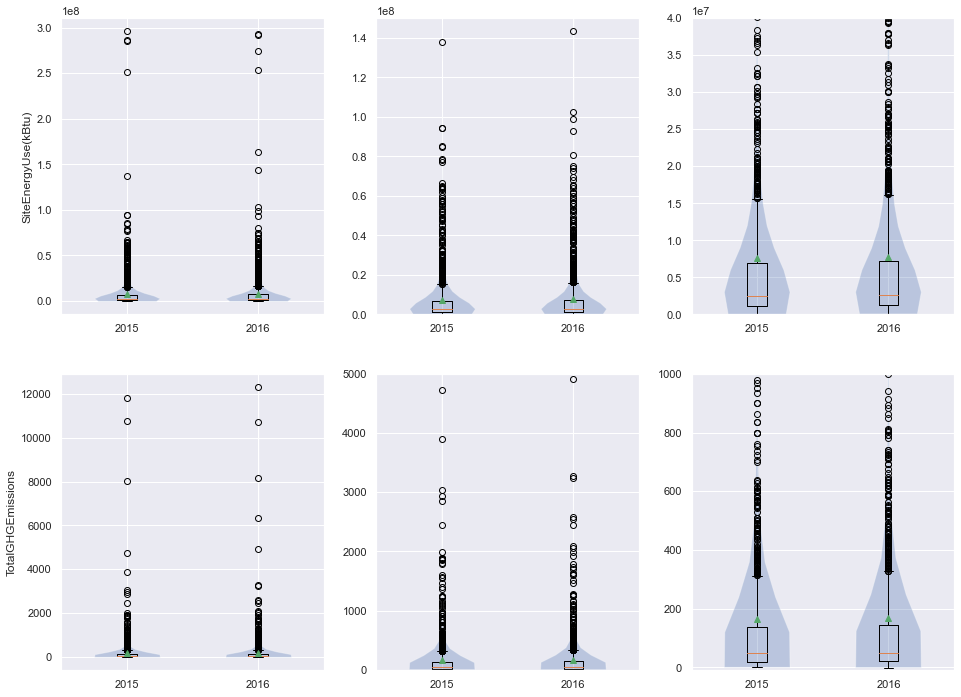

In [154]:
var = 'SiteEnergyUse(kBtu)'
data = [datasets["2015"][var], datasets["2016"][var]]
datalabels = ["2015", "2016"]
ylabel = var

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(16,12))
plt.axes(ax1)
boxplot_violin(data, datalabels= datalabels, ylabel= ylabel, ax = ax1)

plt.axes(ax2)
boxplot_violin(data, datalabels= datalabels, ax = ax2)
plt.ylim(0,1.5e8)

plt.axes(ax3)
boxplot_violin(data, datalabels= datalabels, ax = ax3)
plt.ylim(0,4e7)

var = 'TotalGHGEmissions'
data = [datasets["2015"][var], datasets["2016"][var]]
datalabels = ["2015", "2016"]
ylabel = var

plt.axes(ax4)
boxplot_violin(data, datalabels= datalabels, ylabel= ylabel, ax = ax4)

plt.axes(ax5)
boxplot_violin(data, datalabels= datalabels, ax = ax5)
plt.ylim(-10,5000)

plt.axes(ax6)
boxplot_violin(data, datalabels= datalabels, ax = ax6)
plt.ylim(-10,1000)
plt.show()

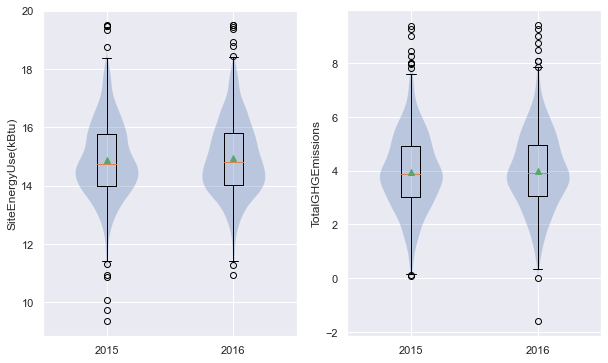

In [155]:
var = 'SiteEnergyUse(kBtu)'
data = [np.log(datasets["2015"][var]), np.log(datasets["2016"][var])]
datalabels = ["2015", "2016"]
ylabel = var

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))
plt.axes(ax1)
boxplot_violin(data, datalabels= datalabels, ylabel= ylabel, ax = ax1)

var = 'TotalGHGEmissions'
data = [np.log(datasets["2015"][var] + 1), np.log(datasets["2016"][var]+1)]
datalabels = ["2015", "2016"]
ylabel = var

plt.axes(ax2)
boxplot_violin(data, datalabels= datalabels, ylabel= ylabel, ax = ax2)

plt.show()

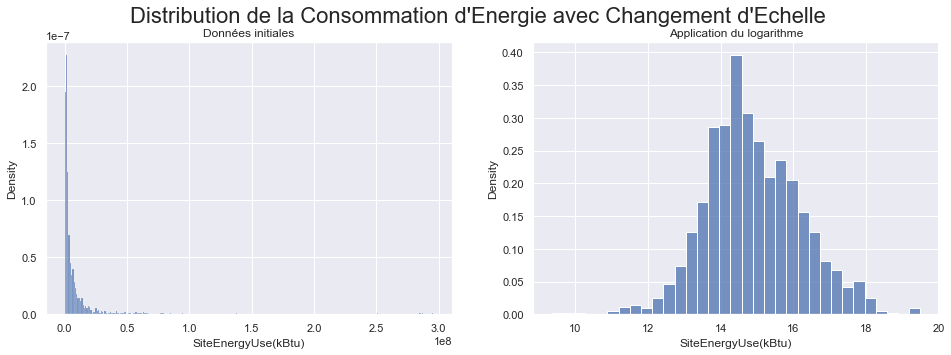

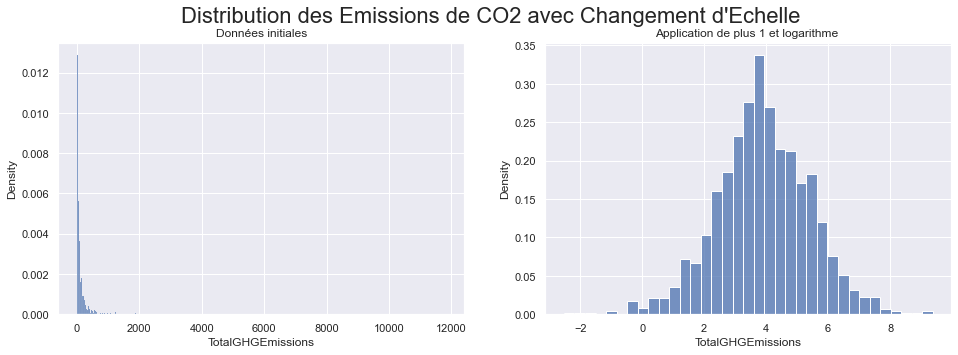

In [156]:
ml_data = datasets["2015"]

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(16,5))
sns.histplot(data=ml_data['SiteEnergyUse(kBtu)'], stat="density", ax=axes[0])
axes[0].set_title("Données initiales")
sns.histplot(data=np.log(ml_data['SiteEnergyUse(kBtu)']), stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme")
plt.suptitle("Distribution de la Consommation d'Energie avec Changement d'Echelle",  fontsize=22)
plt.show()
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(16,5))
sns.histplot(data=ml_data['TotalGHGEmissions'], stat="density", ax=axes[0])
axes[0].set_title("Données initiales")
sns.histplot(data=np.log(ml_data['TotalGHGEmissions']), stat="density", ax=axes[1])
axes[1].set_title("Application de plus 1 et logarithme ")
plt.suptitle("Distribution des Emissions de CO2 avec Changement d'Echelle",  fontsize=22)
plt.show()

<a id="Section7.1.2"></a>

### 7.1.2  Résumé - Target Features

* Il y a quelques valeurs exceptionnellement larges (plus que 10 fois le moyen) qui risque de trop influencer la modélisation, surtout sans une remise à l'échelle.
* La distribution des variables à modéliser est asymmetrique. Elle diminue exponentiellement avec la grandeur de la variable.
    * La modélilsation va nécessiter une remise à l'échelle, i.e. une logarithmique, QuantileScaler,....
* Une remise en échelle avec une logarithique donne une distribution qui resemble plus à une distribution normale
    * Pour les émissions on a d'abord ajouter 1 pour éviter des valeurs négatives dans la logarithmique.

<a id="Section7.2"></a>

## 7.2 Les Variables Paramètres

<a id="Section7.2.1"></a>

### 7.2.1 L'Emplacement du Bâtiment

#### Visualisation - Map

In [157]:
import folium
import folium.plugins

citycenter = [47.60357, -122.32945]
seattle_map = folium.Map(location=citycenter, zoom_start=11, width = '40%')

#Clusters
marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lng, in zip(datasets["2015"]['Latitude'], datasets["2015"]['Longitude']):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)


display(seattle_map)

#### Scatterplot avec la Consommation d'Energie

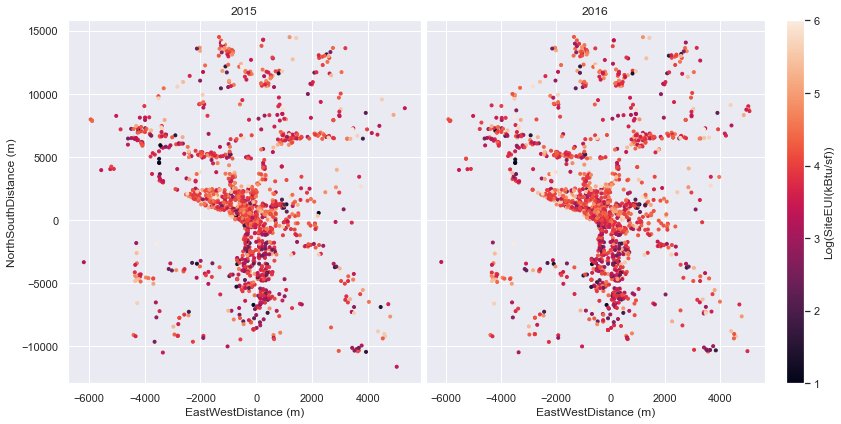

In [158]:
fig, ax = plt.subplots(1,2, sharey = True, figsize =(12,6), gridspec_kw={'width_ratios': [1, 1.2]})
plt.axes(ax[0])
plt.scatter(datasets["2015"]['EastWestDistance'], datasets["2015"]['NorthSouthDistance'], 
            c = np.log(datasets["2015"]['SiteEUI(kBtu/sf)']), marker = '.', vmin = 1, vmax = 6)
plt.title("2015")
plt.ylabel('NorthSouthDistance (m)')
plt.xlabel('EastWestDistance (m)')

plt.axes(ax[1])
scatter_map = plt.scatter(datasets["2016"]['EastWestDistance'], datasets["2016"]['NorthSouthDistance'], 
            c = np.log(datasets["2016"]['SiteEUI(kBtu/sf)']), marker = '.', vmin = 1, vmax = 6)
plt.title("2016")
plt.xlabel('EastWestDistance (m)')
cbar = plt.colorbar()
cbar.set_label('Log(SiteEUI(kBtu/sf))')
plt.tight_layout(w_pad=0.5, h_pad=2.0)

#### Covariance 

In [159]:
var = ['Latitude', 'Longitude', 'EastWestDistance', 'NorthSouthDistance', 'CenterDistance',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity']

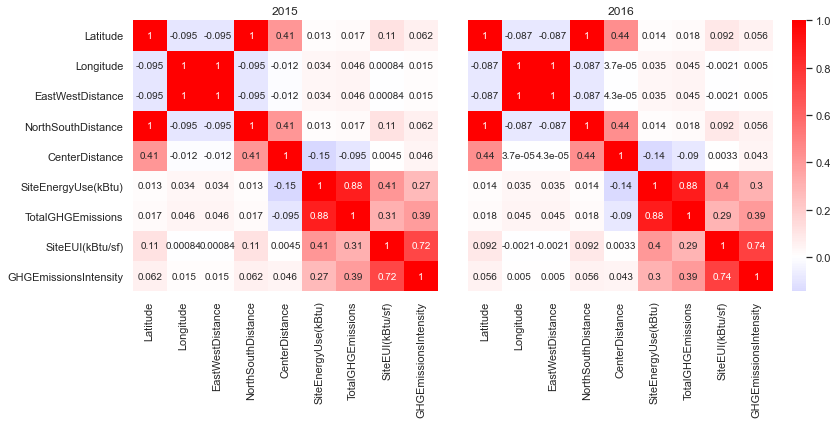

In [160]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (12,6), gridspec_kw={'width_ratios': [1, 1.25]})
for i, (k, data) in enumerate(datasets.items()) :
    corr = data[var].corr()
    sns.heatmap(corr, center = 0, cmap = 'bwr', annot = True, cbar = bool(i), ax = ax[i])
    ax[i].set_title(k)
    i += 1
plt.tight_layout(w_pad = 3)

#### Eta Carré 

In [161]:
features = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity']

var = ['Neighborhood', 'CouncilDistrictCode']
for k, data in datasets.items():
    X = datasets[k][var + features].copy()
    print("Dataset", k)
    for group_column in var:
        print("Eta Squared for", group_column)
        eta_2_list = []
        for feature in features :
            eta_2 = eta_squared(X[group_column], X[feature])
            eta_2_list.append(eta_2)
            print(feature, eta_2 , sep = '\t\t')
        print()

Dataset 2015
Eta Squared for Neighborhood
SiteEnergyUse(kBtu)		0.04176198455948988
TotalGHGEmissions		0.03320031356855129
SiteEUI(kBtu/sf)		0.04144574430596664
GHGEmissionsIntensity		0.05109165901895871

Eta Squared for CouncilDistrictCode
SiteEnergyUse(kBtu)		0.03276619044566069
TotalGHGEmissions		0.026869097501615355
SiteEUI(kBtu/sf)		0.026857352576957528
GHGEmissionsIntensity		0.03167770303055514

Dataset 2016
Eta Squared for Neighborhood
SiteEnergyUse(kBtu)		0.03845243042340203
TotalGHGEmissions		0.03302662969735137
SiteEUI(kBtu/sf)		0.03579864460080267
GHGEmissionsIntensity		0.04545449683894966

Eta Squared for CouncilDistrictCode
SiteEnergyUse(kBtu)		0.03108334075563357
TotalGHGEmissions		0.02680382864722978
SiteEUI(kBtu/sf)		0.023606254406901037
GHGEmissionsIntensity		0.029244049052390333



<a id="Section7.2.2"></a>

### 7.2.2 La Taille du Bâtiment

#### Distributions / Boxplots - NumberofFloors, NumberofBuildings

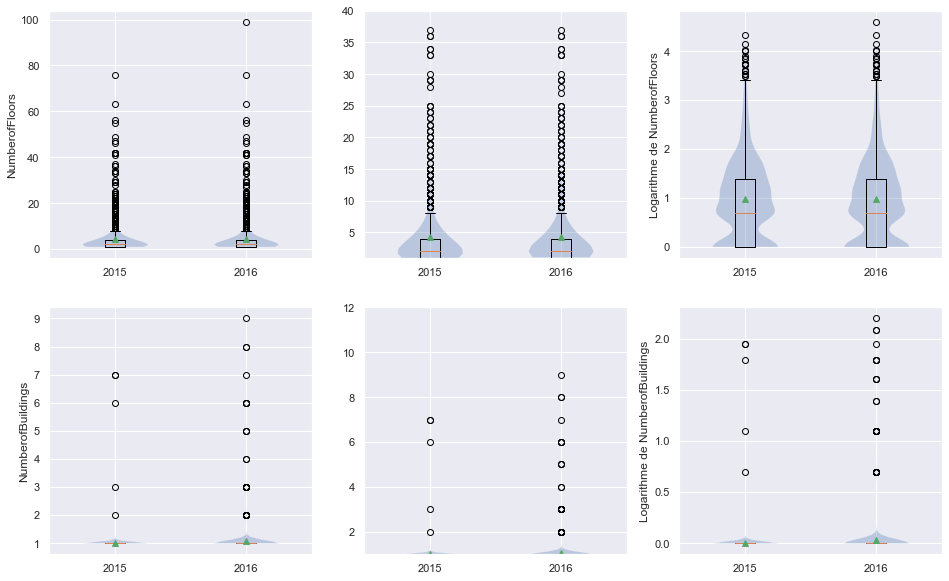

In [162]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(16,10))

var = 'NumberofFloors'
data = [datasets["2015"][var], datasets["2016"][var]]
datalabels = ["2015", "2016"]
ylabel = var

plt.axes(ax1)
boxplot_violin(data, datalabels= datalabels, ylabel= ylabel, ax = ax1)

plt.axes(ax2)
boxplot_violin(data, datalabels= datalabels, ax = ax2)
plt.ylim(1,40)

data = [np.log(datasets["2015"][var]), np.log(datasets["2016"][var])]
ylabel = 'Logarithme de '+ var

plt.axes(ax3)
boxplot_violin(data, datalabels= datalabels, ylabel= ylabel, ax = ax3)

var = 'NumberofBuildings'
data = [datasets["2015"][var], datasets["2016"][var]]
datalabels = ["2015", "2016"]
ylabel = var

plt.axes(ax4)
boxplot_violin(data, datalabels= datalabels, ylabel= ylabel, ax = ax4)

plt.axes(ax5)
boxplot_violin(data, datalabels= datalabels, ax = ax5)
plt.ylim(1,12)

data = [np.log(datasets["2015"][var]), np.log(datasets["2016"][var])]
ylabel = 'Logarithme de '+ var

plt.axes(ax6)
boxplot_violin(data, datalabels= datalabels, ylabel= ylabel, ax = ax6)

plt.show()

In [163]:
for k, data in datasets.items():
    print(f"{data[data['NumberofFloors'] > 1].shape[0]} propriétés du dataset de {k} ont plus qu'une étage.")

1006 propriétés du dataset de 2015 ont plus qu'une étage.
1081 propriétés du dataset de 2016 ont plus qu'une étage.


In [164]:
for k, data in datasets.items():
    print(f"{data[data['NumberofBuildings'] > 1].shape[0]} propriétés du dataset de {k} ont plus qu'un bâtiment.")

5 propriétés du dataset de 2015 ont plus qu'un bâtiment.
37 propriétés du dataset de 2016 ont plus qu'un bâtiment.


In [165]:
var = ['NumberofBuildings', 'NumberofFloors']
output = display_variable_changes(datasets["2015"], datasets["2016"], var, id_var)
common_id = datasets["2015"].set_index(id_var)[datasets["2015"].set_index(id_var).index.isin(
            datasets["2016"].set_index(id_var).index)].index


display(datasets["2015"].set_index(id_var).loc[common_id, [var[0]]][output[0]].join(
        datasets["2016"].set_index(id_var).loc[common_id, [var[0]]][output[0]], 
            lsuffix = "2015", rsuffix = "2016").value_counts())

  35 bâtiments changent le NumberofBuildings
   0 bâtiments changent le NumberofFloors
  35 bâtiments changent un de ces variables


NumberofBuildings2015  NumberofBuildings2016
1.0                    2.0                      14
                       3.0                       8
                       5.0                       3
                       6.0                       3
                       4.0                       1
                       7.0                       1
                       8.0                       1
                       9.0                       1
2.0                    1.0                       1
7.0                    3.0                       1
                       8.0                       1
dtype: int64

#### Distributions / Boxplots - PropertyGFABuilding(s), PropertyGFAParking, PropertyGFATotal

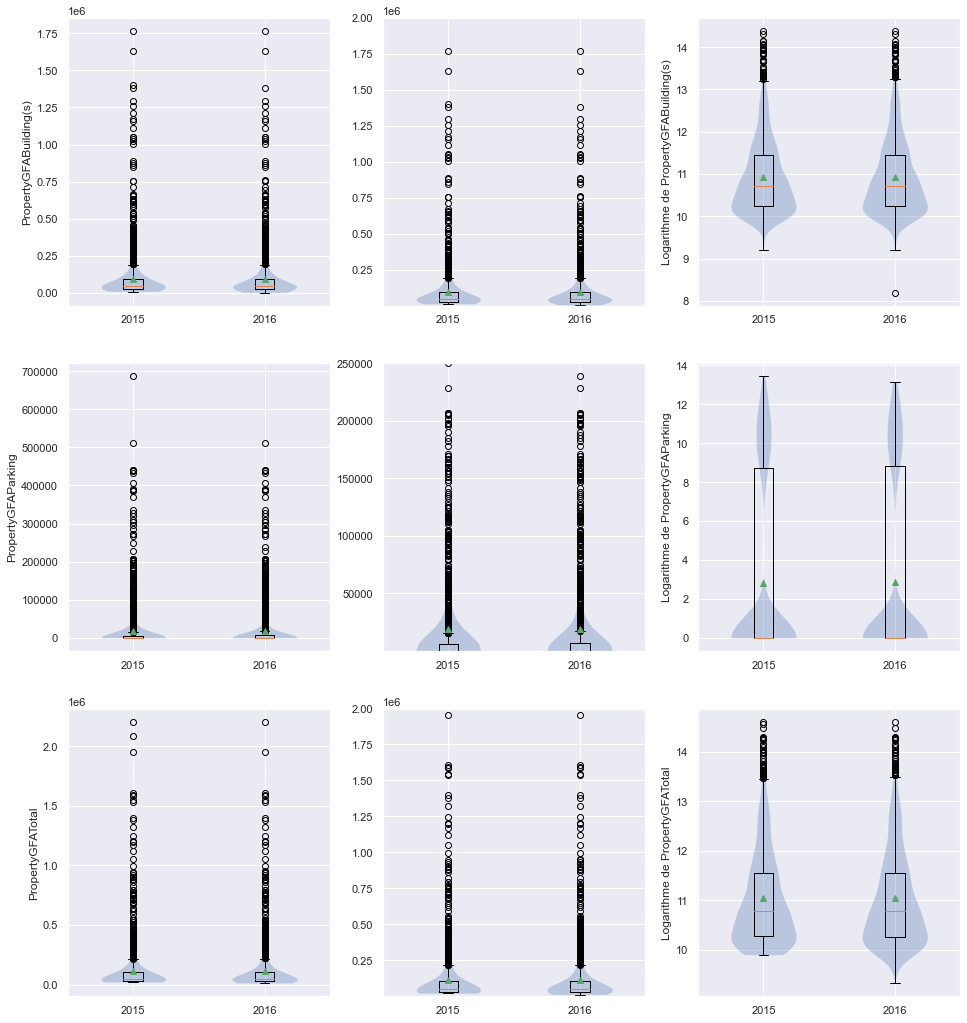

In [166]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(16,18))

var = 'PropertyGFABuilding(s)'
data = [datasets["2015"][var], datasets["2016"][var]]
datalabels = ["2015", "2016"]
ylabel = var

plt.axes(ax1)
boxplot_violin(data, datalabels= datalabels, ylabel= ylabel, ax = ax1)

plt.axes(ax2)
boxplot_violin(data, datalabels= datalabels, ax = ax2)
plt.ylim(1,2e6)

data = [np.log(datasets["2015"][var]), np.log(datasets["2016"][var])]
ylabel = 'Logarithme de '+ var

plt.axes(ax3)
boxplot_violin(data, datalabels= datalabels, ylabel = ylabel, ax = ax3)

var = 'PropertyGFAParking'
data = [datasets["2015"][var], datasets["2016"][var]]
datalabels = ["2015", "2016"]
ylabel = var

plt.axes(ax4)
boxplot_violin(data, datalabels= datalabels, ylabel= ylabel, ax = ax4)

plt.axes(ax5)
boxplot_violin(data, datalabels= datalabels, ax = ax5)
plt.ylim(1,2.5e5)

data = [np.log(datasets["2015"][var]+1), np.log(datasets["2016"][var]+1)]
ylabel = 'Logarithme de '+ var

plt.axes(ax6)
boxplot_violin(data, datalabels= datalabels, ylabel= ylabel, ax = ax6)

var = 'PropertyGFATotal'
data = [datasets["2015"][var], datasets["2016"][var]]
datalabels = ["2015", "2016"]
ylabel = var

plt.axes(ax7)
boxplot_violin(data, datalabels= datalabels, ylabel= ylabel, ax = ax7)

plt.axes(ax8)
boxplot_violin(data, datalabels= datalabels, ax = ax8)
plt.ylim(1,2e6)

data = [np.log(datasets["2015"][var]), np.log(datasets["2016"][var])]
ylabel = 'Logarithme de '+ var

plt.axes(ax9)
boxplot_violin(data, datalabels= datalabels, ylabel= ylabel, ax = ax9)

plt.show()

#### Distributions / Boxplots - GFAperFloor, GFAperBuilding

In [167]:
floors_buildings_var = ['NumberofFloors', 'NumberofBuildings']
area_per_floors_buildings_var = ['GFAperFloor','GFAperBuilding']
for k, data in datasets.items():
    for v1, v2 in zip(area_per_floors_buildings_var, floors_buildings_var) :
        data[v1] = data['PropertyGFABuilding(s)'].divide(data[v2])

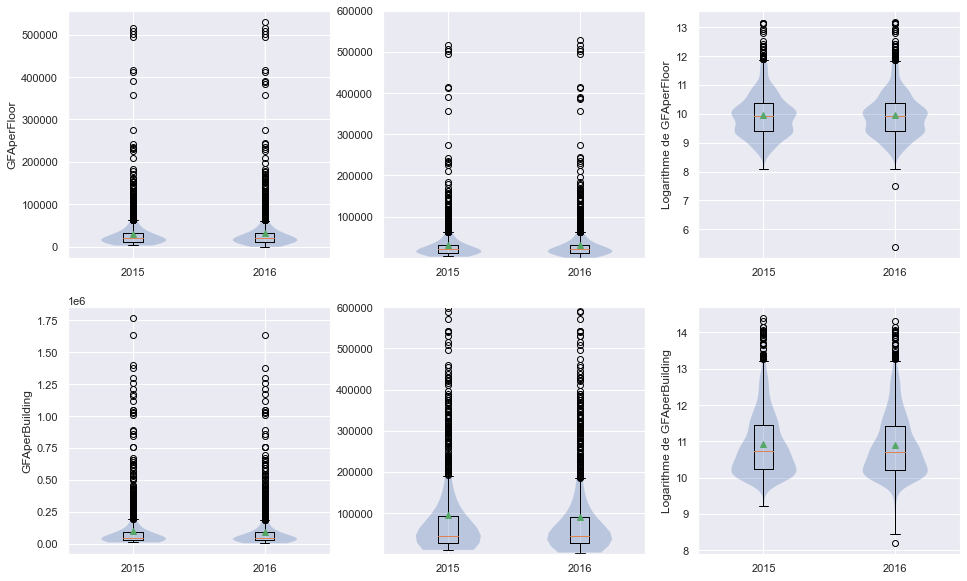

In [168]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(16,10))

var = 'GFAperFloor'
data = [datasets["2015"][var], datasets["2016"][var]]
datalabels = ["2015", "2016"]
ylabel = var

plt.axes(ax1)
boxplot_violin(data, datalabels= datalabels, ylabel= ylabel, ax = ax1)

plt.axes(ax2)
boxplot_violin(data, datalabels= datalabels, ax = ax2)
plt.ylim(1,0.6e6)

data = [np.log(datasets["2015"][var]), np.log(datasets["2016"][var])]
ylabel = "Logarithme de " + var

plt.axes(ax3)
boxplot_violin(data, datalabels= datalabels, ylabel= ylabel, ax = ax3)

var = 'GFAperBuilding'
data = [datasets["2015"][var], datasets["2016"][var]]
datalabels = ["2015", "2016"]
ylabel = var

plt.axes(ax4)
boxplot_violin(data, datalabels= datalabels, ylabel= ylabel, ax = ax4)

plt.axes(ax5)
boxplot_violin(data, datalabels= datalabels, ax = ax5)
plt.ylim(1,0.6e6)

data = [np.log(datasets["2015"][var]), np.log(datasets["2016"][var])]
ylabel = "Logarithme de " + var

plt.axes(ax6)
boxplot_violin(data, datalabels= datalabels, ylabel= ylabel, ax = ax6)

plt.show()

#### Distributions / Boxplots - ParkingFrac

In [169]:
for k, data in datasets.items():
    data['ParkingFrac'] = data['PropertyGFAParking'].divide(data['PropertyGFABuilding(s)'])

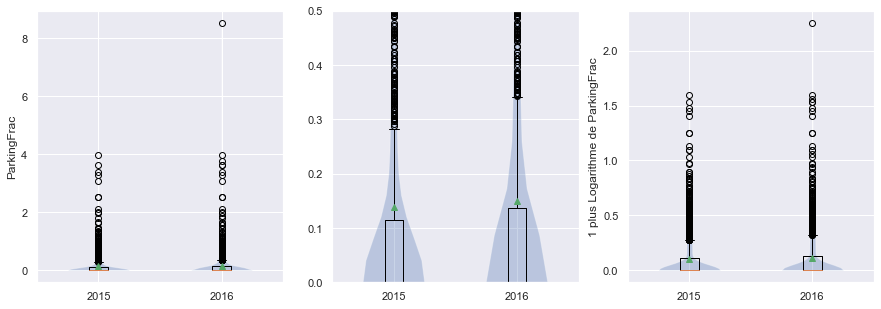

In [170]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(15,5))

var = 'ParkingFrac'
data = [datasets["2015"][var], datasets["2016"][var]]
datalabels = ["2015", "2016"]
ylabel = var

plt.axes(ax1)
boxplot_violin(data, datalabels= datalabels, ylabel= ylabel, ax = ax1)

plt.axes(ax2)
boxplot_violin(data, datalabels= datalabels, ax = ax2)
plt.ylim(0,0.5)

data = [np.log1p(datasets["2015"][var]), np.log1p(datasets["2016"][var])]
ylabel = '1 plus Logarithme de '+ var

plt.axes(ax3)
boxplot_violin(data, datalabels= datalabels, ylabel= ylabel, ax = ax3)
#plt.ylim(0,0.5)


plt.show()

In [171]:
for k, data in datasets.items():
    display(data[data['ParkingFrac'] >=1.5][['PropertyName', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
                                            'PropertyGFAParking', 'ParkingFrac', 'PropertyGFATotal', 'PropertyGFABuilding(s)']])

PropertyName LargestPropertyUseType  \
42                                      Hilton Seattle                  Hotel   
162          Thornton Cinema Building & Parking Garage                Parking   
292                               Meridian Center East                Parking   
435                Centurylink: Seattle 1St Ave Garage                  Other   
512                                       2323 Elliott                Parking   
564                             Market Place One & Two           Large Office   
603   University Village Parking Garage/Retail/Storage                Parking   
841                      Olympic Scultpture Park (Sam)    Social/Meeting Hall   
1295                                      202 Westlake           Large Office   
1450                       Seattle Prep - St. Ignatius                Parking   
2230                 The Innovation Center (Mckinstry)                Parking   
3139                     Queen Anne Square West (2013)                 Office   
3322                    Freeway Motors University Audi                Parking   

      LargestPropertyUseTypeGFA  PropertyGFAParking  ParkingFrac  \
42                     348630.0            205970.0     1.631575   
162                    335109.0            335109.0     3.954602   
292                    166960.0            166960.0     1.663362   
435                     51427.0             41600.0     3.636364   
512                    197040.0            197130.0     2.500000   
564                    120290.0             87160.0     1.981675   
603                    232685.0            272900.0     3.083686   
841                      8969.0             22867.0     2.093089   
1295                   120548.0            100800.0     3.370110   
1450                    65000.0             65640.0     3.264048   
2230                    84710.0             84710.0     2.000000   
3139                    54015.0             97325.0     1.801814   
3322                    83600.0             84198.0     2.502318   

      PropertyGFATotal  PropertyGFABuilding(s)  
42            332210.0                126240.0  
162           419848.0                 84739.0  
292           267335.0                100375.0  
435            53040.0                 11440.0  
512           275982.0                 78852.0  
564           131143.0                 43983.0  
603           361398.0                 88498.0  
841            33792.0                 10925.0  
1295          130710.0                 29910.0  
1450           85750.0                 20110.0  
2230          127065.0                 42355.0  
3139          151340.0                 54015.0  
3322          117846.0                 33648.0

PropertyName  \
43                              Seattle Hilton Hotel   
163                                       Building 1   
291                                  Meridian (East)   
356                               70100179-Lake City   
404                                      011-Seattle   
432                              Seattle 1St Ave Gar   
509                                     2323 Elliott   
563          Market Place I & Ii-2003 Western Avenue   
599                                       North Bldg   
830                           Olympic Sculpture Park   
1109                                  Ballard Center   
1285                                    202 Westlake   
1335                                   Ignatius Hall   
2206  Mckinstry Sea - 210 S Hudson Innovation Center   
3098                    Queen Anne Square West (220)   
3233                                           South   
3267                                   Market Garage   
3294                           Audi Seattle Uva Bldg   
3322              Honda Of Seattle/Toyota Of Seattle   

         LargestPropertyUseType  LargestPropertyUseTypeGFA  \
43                        Hotel                   348630.0   
163                     Parking                   335109.0   
291                     Parking                   166960.0   
356   Supermarket/Grocery Store                   121087.0   
404                Retail Store                    98863.0   
432                       Other                    51427.0   
509                     Parking                   197040.0   
563                Large Office                   120248.0   
599                     Parking                   232685.0   
830         Social/Meeting Hall                     8969.0   
1109      Senior Care Community                    36000.0   
1285               Large Office                   120548.0   
1335                    Parking                    65000.0   
2206                    Parking                    84710.0   
3098                     Office                    54015.0   
3233           Lifestyle Center                   318986.0   
3267      Senior Care Community                    38800.0   
3294                    Parking                    83600.0   
3322                    Parking                   202171.0   

      PropertyGFAParking  ParkingFrac  PropertyGFATotal  \
43              205970.0     1.631575          332210.0   
163             335109.0     3.954602          419848.0   
291             166960.0     1.663362          267335.0   
356             187878.0     1.551595          308965.0   
404             159994.0     1.538197          264008.0   
432              41600.0     3.636364           53040.0   
509             197130.0     2.500000          275982.0   
563              87160.0     1.981675          131143.0   
599             272900.0     3.083686          361398.0   
830              22867.0     2.093089           33792.0   
1109             31000.0     8.525853           34636.0   
1285            100800.0     3.370110          130710.0   
1335             65640.0     3.264048           85750.0   
2206             84710.0     2.000000          127065.0   
3098             97325.0     1.801814          151340.0   
3233            239252.0     3.637541          305025.0   
3267            156000.0     3.768571          197395.0   
3294             84198.0     2.502318          117846.0   
3322            202171.0     1.871330          310207.0   

      PropertyGFABuilding(s)  
43                  126240.0  
163                  84739.0  
291                 100375.0  
356                 121087.0  
404                 104014.0  
432                  11440.0  
509                  78852.0  
563                  43983.0  
599                  88498.0  
830                  10925.0  
1109                  3636.0  
1285                 29910.0  
1335                 20110.0  
2206                 42355.0  
3098                 54015.0  
3

#### Corvariance

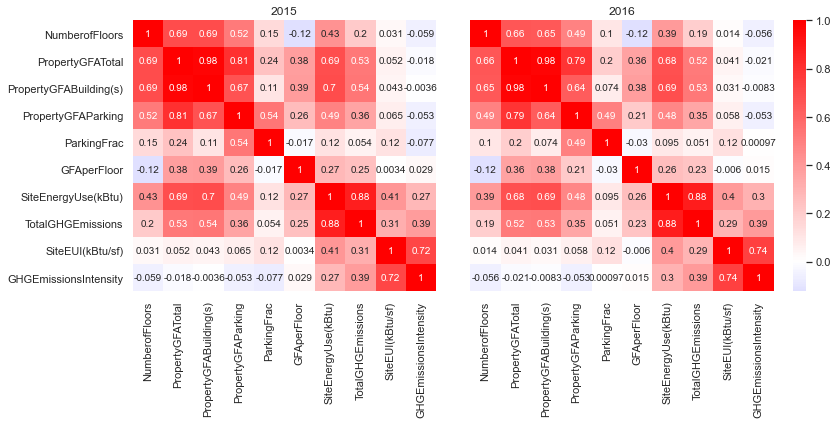

In [172]:
var = ['NumberofFloors', 'PropertyGFATotal', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'ParkingFrac',
       'GFAperFloor', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity']
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (12,6), gridspec_kw={'width_ratios': [1, 1.25]})
for i, (k, data) in enumerate(datasets.items()) :
    corr = data[var].corr()
    sns.heatmap(corr, center = 0, cmap = 'bwr', annot = True, cbar = bool(i), ax = ax[i])
    ax[i].set_title(k)
    i += 1
plt.tight_layout(w_pad = 3)

#### Simple Régression Linéaire : Consommation d'Energie / Emissions de CO2 vs. la Surface du Bâtiment

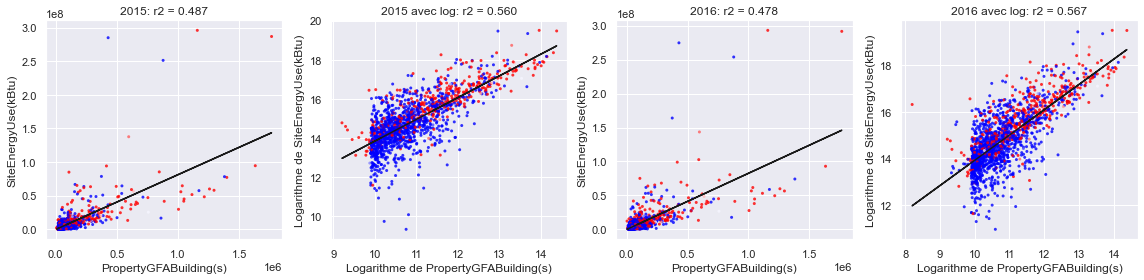

In [173]:
from scipy import stats

var_x = 'PropertyGFABuilding(s)'
var_y = 'SiteEnergyUse(kBtu)'
var_c = 'ParkingFrac'

fig, ax = plt.subplots(1, 4, figsize = (16,4))

for i, (k, data) in enumerate(datasets.items()):
    x = data[var_x]
    y = data[var_y]
    c = data[var_c]
    res = stats.linregress(x, y)

    plt.axes(ax[0+2*i])
    plt.scatter(x, y, c=c, cmap = 'bwr', vmax = 0.1, marker = '.', linewidth = 0, alpha = 0.8)
    plt.plot(x, x*res.slope + res.intercept, color = 'k' )
    ax[0+2*i].set_xlabel(var_x)
    ax[0+2*i].set_ylabel(var_y)
    plt.title(f"{k}: r2 = {res.rvalue**2:.3f}")

    x = np.log(data[var_x])
    y = np.log(data[var_y])
    res = stats.linregress(x, y)

    plt.axes(ax[1+2*i])
    plt.scatter(x, y, c=c, cmap = 'bwr', vmax = 0.1, marker = '.', linewidth = 0, alpha = 0.8)
    plt.plot(x, x*res.slope + res.intercept, color = 'k')
    ax[1+2*i].set_xlabel('Logarithme de ' + var_x)
    ax[1+2*i].set_ylabel('Logarithme de ' + var_y)
    plt.title(f"{k} avec log: r2 = {res.rvalue**2:.3f}")
    plt.tight_layout(w_pad = 1)

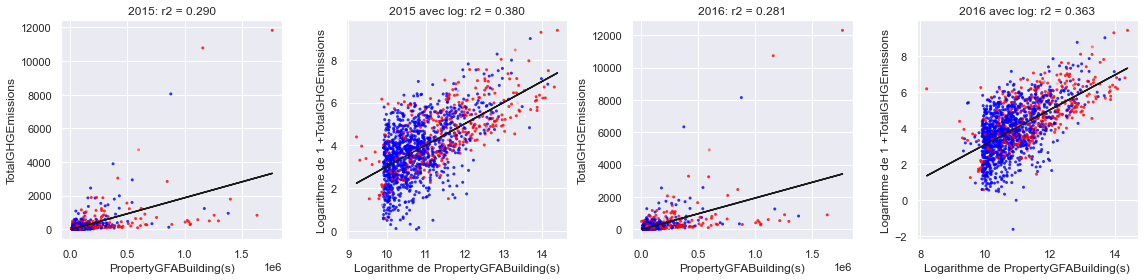

In [174]:
from scipy import stats

var_x = 'PropertyGFABuilding(s)'
var_y = 'TotalGHGEmissions'
var_c = 'ParkingFrac'

fig, ax = plt.subplots(1, 4, figsize = (16,4))

for i, (k, data) in enumerate(datasets.items()):
    x = data[var_x]
    y = data[var_y]
    c = data[var_c]
    res = stats.linregress(x, y)

    plt.axes(ax[0+2*i])
    plt.scatter(x, y, c=c, cmap = 'bwr', vmax = 0.1, marker = '.', linewidth = 0, alpha = 0.8)
    plt.plot(x, x*res.slope + res.intercept, color = 'k' )
    ax[0+2*i].set_xlabel(var_x)
    ax[0+2*i].set_ylabel(var_y)
    plt.title(f"{k}: r2 = {res.rvalue**2:.3f}")

    x = np.log(data[var_x])
    y = np.log1p(data[var_y])
    res = stats.linregress(x, y)

    plt.axes(ax[1+2*i])
    plt.scatter(x, y, c=c, cmap = 'bwr', vmax = 0.1, marker = '.', linewidth = 0, alpha = 0.8)
    plt.plot(x, x*res.slope + res.intercept, color = 'k')
    ax[1+2*i].set_xlabel('Logarithme de ' + var_x)
    ax[1+2*i].set_ylabel('Logarithme de 1 +' + var_y)
    plt.title(f"{k} avec log: r2 = {res.rvalue**2:.3f}")
    plt.tight_layout(w_pad = 1)

<a id="Section7.2.3"></a>

### 7.2.3 Age du Bâtiment

#### Histogramm

In [175]:
var = 'YearBuilt'

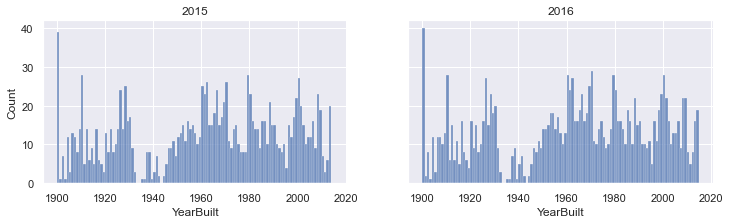

In [176]:
fig, ax = plt.subplots(1,2, figsize = (12,3), sharey = True, sharex = True)
for i, (k, data) in enumerate(datasets.items()):
    sns.histplot(data=data[var], binwidth = 1, ax = ax[i])
    ax[i].set_title(k)

#### Covariance

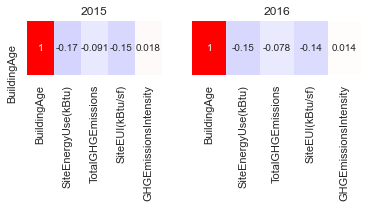

In [177]:
var = ['BuildingAge',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity']
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (6,1), gridspec_kw={'width_ratios': [1, 1.25]})
for i, (k, data) in enumerate(datasets.items()) :
    corr = data[var].corr()
    plt.axes(ax[i])
    sns.heatmap(corr[['BuildingAge']].T, center = 0, cmap = 'bwr', annot = True, cbar = False, ax = ax[i])
    ax[i].set_title(k)
plt.show()

#### Eta Carré

In [178]:
for k, data in datasets.items():
    data['DecadeBuilt'] = pd.cut(data['YearBuilt'], bins = [y for y in range(1890, 2021, 10)], 
                                 labels = [str(y) +'s' for y in range(1890, 2020, 10) ] )

In [179]:
features = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity']

var = ['DecadeBuilt']
for k, data in datasets.items():
    X = datasets[k][var + features].copy()
    print("Dataset de", k)
    for group_column in var:
        print("Eta Squared pour", group_column)
        eta_2_list = []
        for feature in features :
            eta_2 = eta_squared(X[group_column], X[feature])
            eta_2_list.append(eta_2)
            print(feature, eta_2 , sep = '\t\t')
        print()

Dataset de 2015
Eta Squared pour DecadeBuilt
SiteEnergyUse(kBtu)		0.04109815615510173
TotalGHGEmissions		0.019078552263807055
SiteEUI(kBtu/sf)		0.03373788419513533
GHGEmissionsIntensity		0.023752359954743233

Dataset de 2016
Eta Squared pour DecadeBuilt
SiteEnergyUse(kBtu)		0.034134278644494476
TotalGHGEmissions		0.01619957885411092
SiteEUI(kBtu/sf)		0.03332109236182012
GHGEmissionsIntensity		0.01934940829467673



<a id="Section7.2.4"></a>

### 7.2.4 Utilisation du Bâtiment - PropertyUseTypes

#### Eta Carré - PrimaryPropertyType, LargestPropertyUseType

In [180]:
features = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity']

var = ['PrimaryPropertyType', 'LargestPropertyUseType', 'SecondLargestPropertyUseType' , 'ThirdLargestPropertyUseType']
for k, data in datasets.items():
    X = datasets[k][var + features].copy()
    print("Dataset de", k)
    for group_column in var:
        print("Eta Squared pour", group_column)
        eta_2_list = []
        for feature in features :
            eta_2 = eta_squared(X[X[group_column] != 'Other'][group_column], X[X[group_column] != 'Other'][feature])
            eta_2_list.append(eta_2)
            print(feature, eta_2 , sep = '\t\t')
        print()

Dataset de 2015
Eta Squared pour PrimaryPropertyType
SiteEnergyUse(kBtu)		0.5101088430698841
TotalGHGEmissions		0.5536891553442996
SiteEUI(kBtu/sf)		0.4916266488932686
GHGEmissionsIntensity		0.4013350169060402

Eta Squared pour LargestPropertyUseType
SiteEnergyUse(kBtu)		0.533076368762568
TotalGHGEmissions		0.554918647398228
SiteEUI(kBtu/sf)		0.55272055438802
GHGEmissionsIntensity		0.4278245915386439

Eta Squared pour SecondLargestPropertyUseType
SiteEnergyUse(kBtu)		0.05101044405061922
TotalGHGEmissions		0.02794552364996798
SiteEUI(kBtu/sf)		0.07425448569557168
GHGEmissionsIntensity		0.08925361063008942

Eta Squared pour ThirdLargestPropertyUseType
SiteEnergyUse(kBtu)		0.16101464630585144
TotalGHGEmissions		0.14352986043534097
SiteEUI(kBtu/sf)		0.0896292008201459
GHGEmissionsIntensity		0.1598752750347526

Dataset de 2016
Eta Squared pour PrimaryPropertyType
SiteEnergyUse(kBtu)		0.5140961064818116
TotalGHGEmissions		0.5398034102875238
SiteEUI(kBtu/sf)		0.44568885976735406
GHGEmissionsI

#### Distributions / Boxplots - groupées par PrimaryPropertyType, LargestPropertyUseType

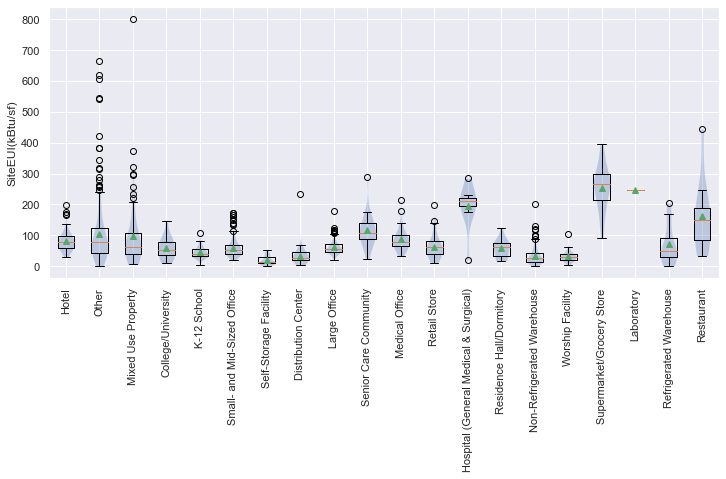

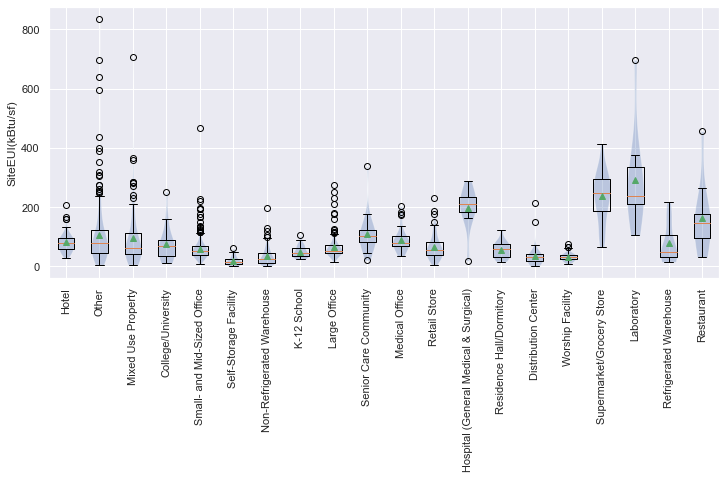

In [181]:
feature = 'SiteEUI(kBtu/sf)'
group_column = 'PrimaryPropertyType'

for k, data in datasets.items():
    group_values = data[group_column].unique()
    df_tmp = [data[data[group_column] == g][feature] for g in group_values if (data[group_column] == g).sum()]

    fig, ax = plt.subplots(figsize = (12,5))
    boxplot_violin(df_tmp)
    ax.set_xticklabels(group_values, rotation = 'vertical')
    plt.ylabel(feature)
    plt.show()

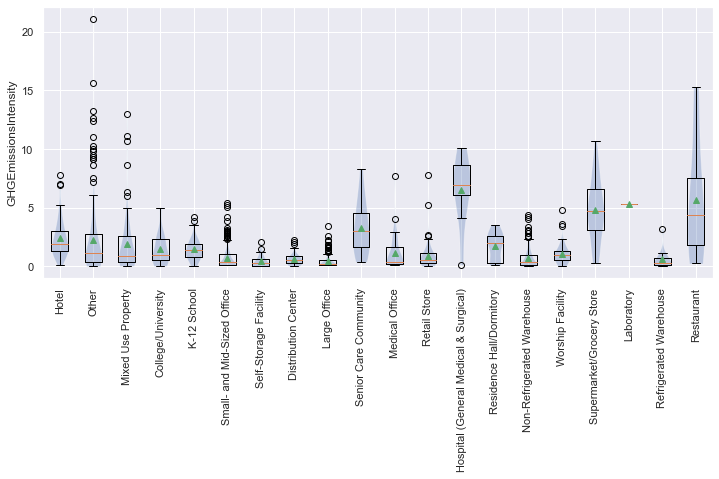

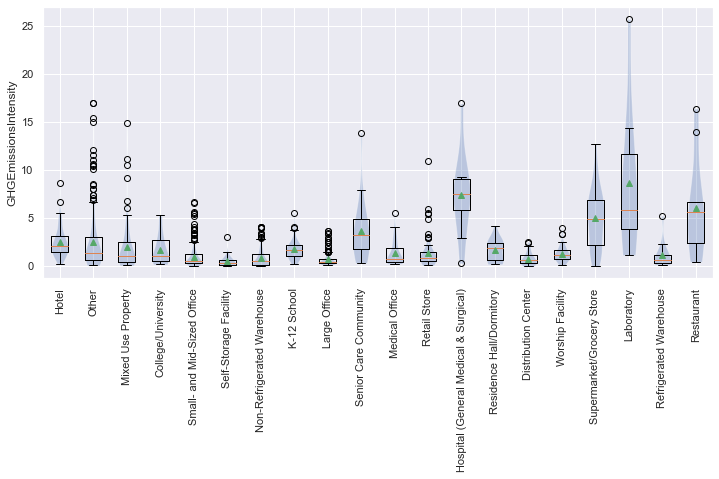

In [182]:
feature = 'GHGEmissionsIntensity'
group_column = 'PrimaryPropertyType'

for k, data in datasets.items():
    group_values = data[group_column].unique()
    df_tmp = [data[data[group_column] == g][feature] for g in group_values if (data[group_column] == g).sum()]

    fig, ax = plt.subplots(figsize = (12,5))
    boxplot_violin(df_tmp)
    ax.set_xticklabels(group_values, rotation = 'vertical')
    plt.ylabel(feature)
    plt.show()

In [183]:
group_values = ['Other', 'Data Center', 'Worship Facility', 'Hotel',  
                'Other - Entertainment/Public Assembly', 'Movie Theater','Performing Arts', 
                'Social/Meeting Hall', 'Convention Center',
                'Library', 'Museum',
                'Fitness Center/Health Club/Gym', 'Other - Recreation', 'Lifestyle Center',
                'College/University', 'Other - Education', 'Adult Education',
                'K-12 School', 'Pre-school/Daycare',
                'Large Office', 'Office', 
                'Financial Office', 'Bank Branch',
                'Medical Office', 'Outpatient Rehabilitation/Physical Therapy', 'Urgent Care/Clinic/Other Outpatient',
                'Hospital (General Medical & Surgical)', 'Other/Specialty Hospital',
                'Laboratory',
                'Self-Storage Facility', 'Distribution Center', 'Non-Refrigerated Warehouse', 'Refrigerated Warehouse',
                'Senior Care Community', 'Residential Care Facility',
                'Other - Lodging/Residential', 'Residence Hall/Dormitory',
                'Retail Store', 'Strip Mall', 'Other - Mall',
                'Automobile Dealership', 'Parking',
                'Supermarket/Grocery Store', 'Wholesale Club/Supercenter',
                'Other - Services',
                'Repair Services (Vehicle, Shoe, Locksmith, etc)',
                'Other - Public Services', 'Courthouse',  'Police Station', 'Fire Station',
                'Personal Services (Health/Beauty, Dry Cleaning, etc)',
                'Food Service',
                'Restaurant', 'Other - Restaurant/Bar', 
                'Manufacturing/Industrial Plant', 'Other - Utility']

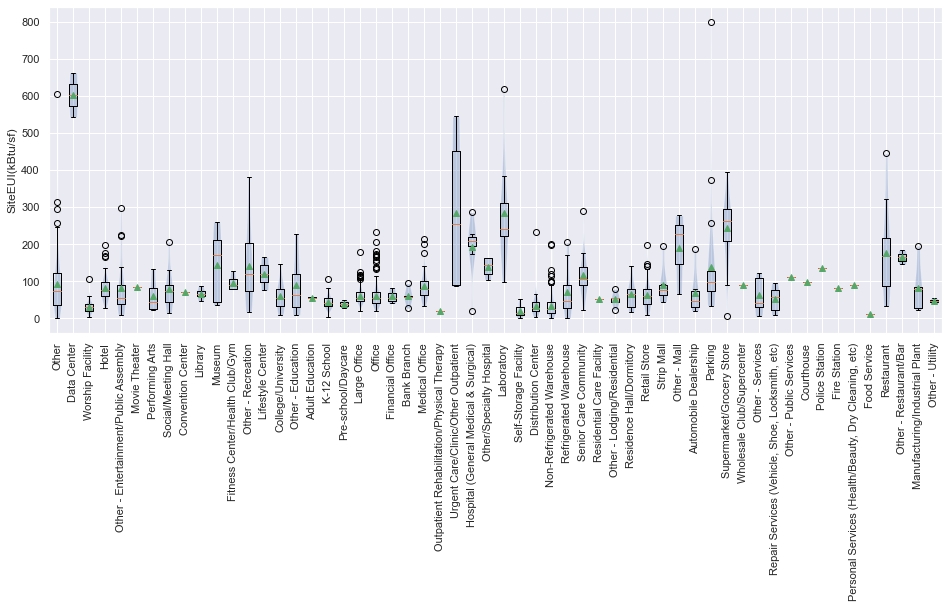

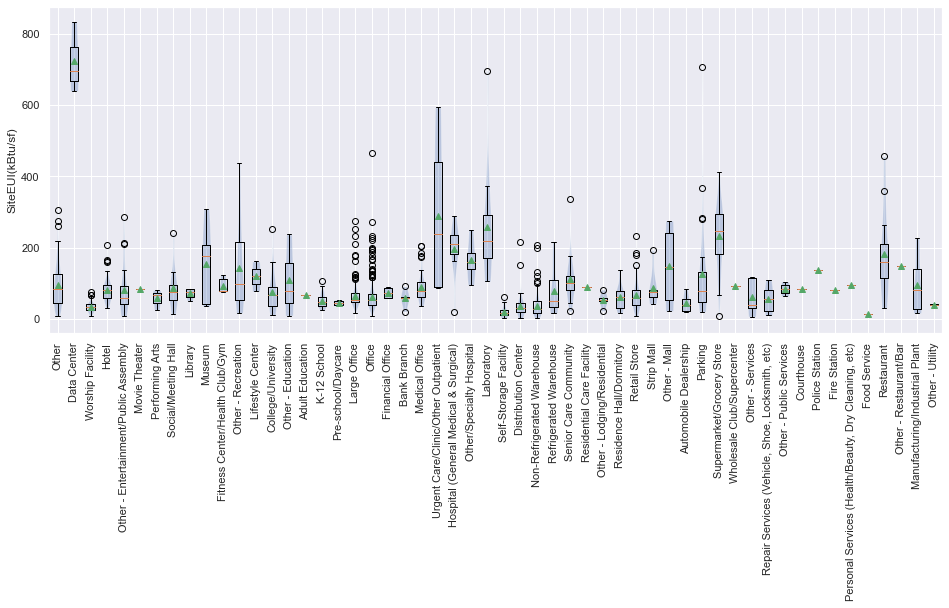

In [184]:
group_column = 'LargestPropertyUseType'
feature = 'SiteEUI(kBtu/sf)'

for k, data in datasets.items():
    df_tmp = [data[data[group_column] == g][feature] for g in group_values if (data[group_column] == g).sum()]
    group_labels = [g for g in group_values if (data[group_column] == g).sum()]
    #display(data[group_column].value_counts())

    fig, ax = plt.subplots(figsize = (16,6))
    boxplot_violin(df_tmp)
    #plt.setp(ax, xticklabels=group_values)
    ax.set_xticklabels(group_labels, rotation = 'vertical')
    plt.ylabel(feature)
    plt.show()

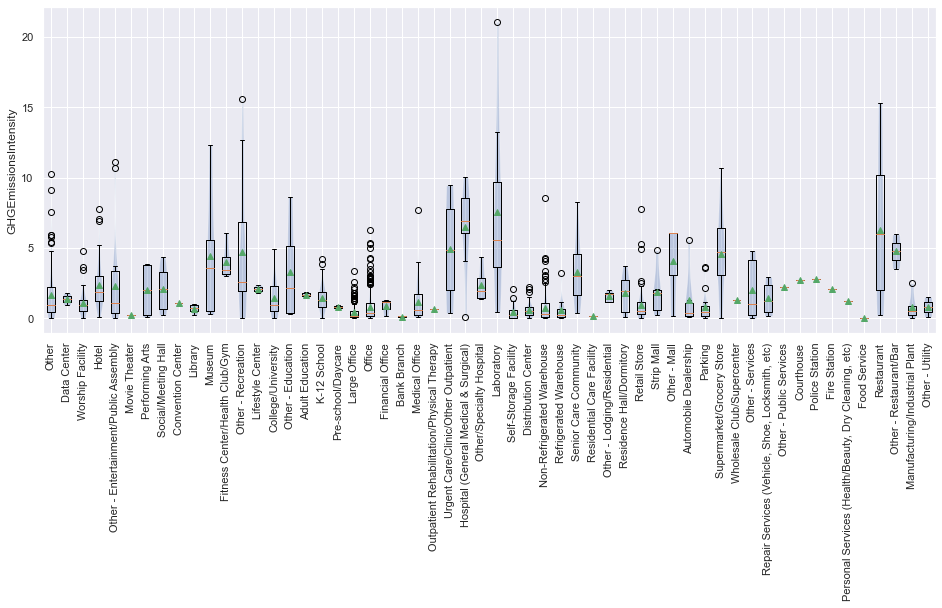

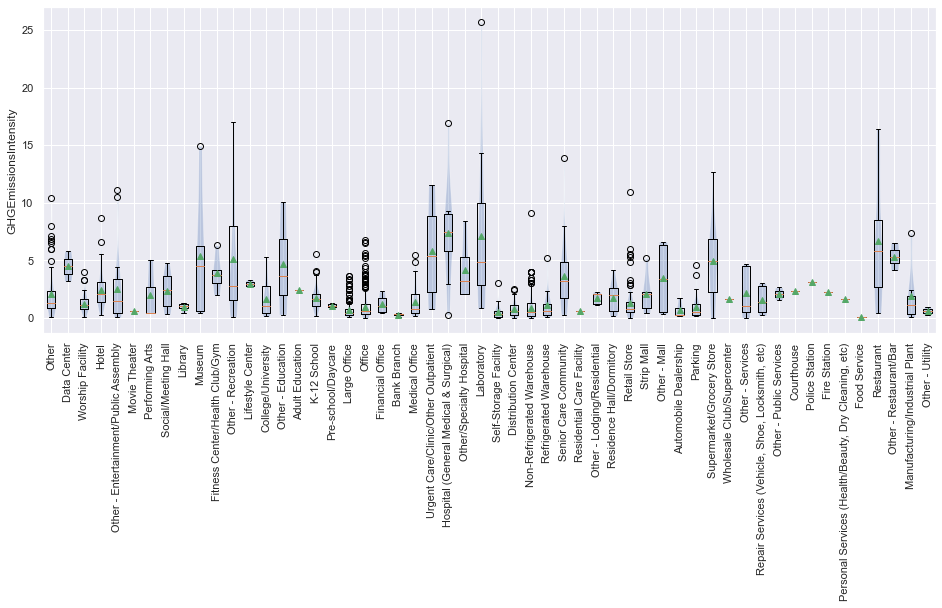

In [185]:
group_column = 'LargestPropertyUseType'
feature = 'GHGEmissionsIntensity'

for k, data in datasets.items():
    df_tmp = [data[data[group_column] == g][feature] for g in group_values if (data[group_column] == g).sum()]
    group_labels = [g for g in group_values if (data[group_column] == g).sum()]
    #display(data[group_column].value_counts())

    fig, ax = plt.subplots(figsize = (16,6))
    boxplot_violin(df_tmp)
    #plt.setp(ax, xticklabels=group_values)
    ax.set_xticklabels(group_labels, rotation = 'vertical')
    plt.ylabel(feature)
    plt.show()

#### Regroupement of PropertyUseTypes

In [186]:
propertyusetypes_groups = {'Office' : ['Office'],
                           'Parking' : ['Parking'],
                           'Non-Refrigerated Warehouse' : ['Non-Refrigerated Warehouse'],
                           'Retail Store' : ['Retail Store', 'Enclosed Mall', 'Other - Mall', 'Strip Mall',
                                            'Automobile Dealership', 'Wholesale Club/Supercenter'],
                           'Large Office' : ['Large Office'],
                           'Hotel' : ['Hotel'],
                           'Worship Facility' : ['Worship Facility'],
                           'Restaurant' : ['Restaurant', 'Fast Food Restaurant', 'Food Sales',
                                           'Other - Restaurant/Bar', 'Bar/Nightclub'],
                           'K-12 School' : ['K-12 School', 'Pre-school/Daycare'],
                           'Distribution Center' : ['Distribution Center'],
                           'Medical Office' : ['Medical Office', 'Outpatient Rehabilitation/Physical Therapy'],
                           'Supermarket/Grocery Store' : ['Supermarket/Grocery Store',
                                                          'Convenience Store without Gas Station'],
                           'Other - Recreation' : ['Other - Recreation', 'Fitness Center/Health Club/Gym', 
                                                   'Lifestyle Center', 'Museum'],
                           'Self-Storage Facility' : ['Self-Storage Facility'],
                           'Other - Entertainment/Public Assembly' : ['Other - Entertainment/Public Assembly',
                                                                      'Movie Theater', 'Performing Arts', 'Library',
                                                                     'Social/Meeting Hall', 'Convention Center'],
                           'Data Center' : ['Data Center'],
                           'Residence Hall/Dormitory' : ['Residence Hall/Dormitory', 'Other - Lodging/Residential',
                                                         'Multifamily Housing'],
                           'Laboratory' : ['Laboratory', 'Other - Technology/Science'],
                           'Other - Education' : ['Other - Education', 'Vocational School', 'Adult Education',
                                                  'College/University'],
                           'Residential Care Facility' : ['Residential Care Facility', 'Senior Care Community'],
                           'Other - Services' : ['Other - Services', 'Personal Services (Health/Beauty, Dry Cleaning, etc)',
                                                 'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Food Service'],
                           'Financial Office' : ['Financial Office', 'Bank Branch'],
                           'Refrigerated Warehouse' : ['Refrigerated Warehouse'],
                           'Other - Public Services': ['Other - Public Services', 'Fire Station', 'Police Station',
                                                       'Courthouse'],
                           'Hospital (General Medical & Surgical)' : ['Hospital (General Medical & Surgical)',
                                                                      'Other/Specialty Hospital',
                                                                      'Urgent Care/Clinic/Other Outpatient'],
                           'Other' : ['Other', 'Other - Utility', 'Prison/Incarceration', 'Manufacturing/Industrial Plant']}

propertyusetypes_dict = {}
for k, l in propertyusetypes_groups.items():
    for i in l :
        propertyusetypes_dict[i] = k

In [187]:
var = ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
suffix = "Gr1"
for k, data in datasets.items():
    for v in var :
        data[v + suffix] = [propertyusetypes_dict[i] for i in data[v]]

In [188]:
suffix = "Gr1"
for k, data in datasets.items() :
    largestpropertyusetype_counts = data['LargestPropertyUseType'+suffix].value_counts().add(
                                    data['SecondLargestPropertyUseType'+suffix].value_counts(), fill_value = 0).add(
                                    data['ThirdLargestPropertyUseType'+suffix].value_counts(), fill_value = 0
                                     ).sort_values(ascending = False)
    display(largestpropertyusetype_counts.iloc[:])

Other                                    1976.0
Office                                    485.0
Parking                                   336.0
Non-Refrigerated Warehouse                229.0
Retail Store                              198.0
Large Office                              156.0
Restaurant                                 82.0
Hotel                                      66.0
Worship Facility                           64.0
K-12 School                                63.0
Other - Entertainment/Public Assembly      62.0
Medical Office                             58.0
Distribution Center                        57.0
Other - Recreation                         51.0
Supermarket/Grocery Store                  45.0
Other - Services                           40.0
Residence Hall/Dormitory                   40.0
Self-Storage Facility                      33.0
Other - Education                          30.0
Financial Office                           23.0
Data Center                             

Other                                    2072.0
Office                                    528.0
Parking                                   391.0
Retail Store                              238.0
Non-Refrigerated Warehouse                238.0
Large Office                              168.0
Restaurant                                 84.0
Hotel                                      79.0
Worship Facility                           73.0
Other - Recreation                         70.0
Distribution Center                        64.0
K-12 School                                64.0
Other - Entertainment/Public Assembly      61.0
Medical Office                             59.0
Residence Hall/Dormitory                   52.0
Supermarket/Grocery Store                  52.0
Other - Services                           43.0
Self-Storage Facility                      33.0
Other - Education                          31.0
Data Center                                28.0
Financial Office                        

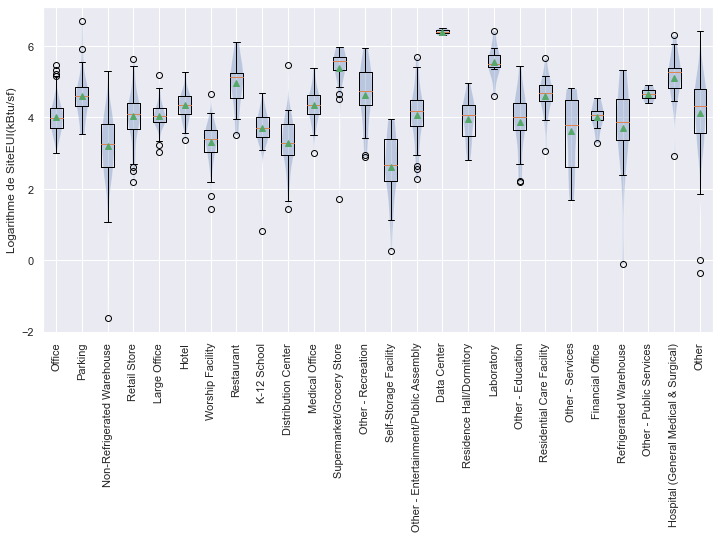

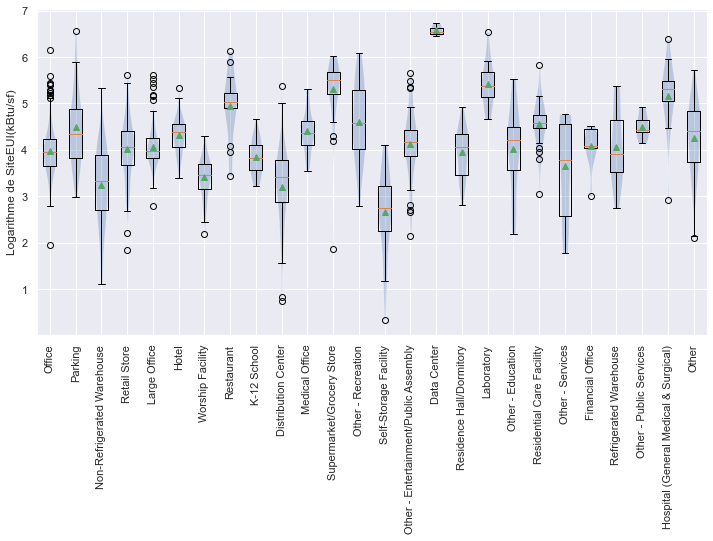

In [189]:
group_values = [k for k in propertyusetypes_groups.keys()]
group_column = 'LargestPropertyUseTypeGr1'
feature = 'SiteEUI(kBtu/sf)'

for k, data in datasets.items():
    df_tmp = [np.log(data[data[group_column] == g][feature]) for g in group_values if (data[group_column] == g).sum()]
    group_labels = [g for g in group_values if (data[group_column] == g).sum()]
    #display(data[group_column].value_counts())

    fig, ax = plt.subplots(figsize = (12,6))
    boxplot_violin(df_tmp)
    #plt.setp(ax, xticklabels=group_values)
    ax.set_xticklabels(group_labels, rotation = 'vertical')
    plt.ylabel("Logarithme de " + feature)
    plt.show()

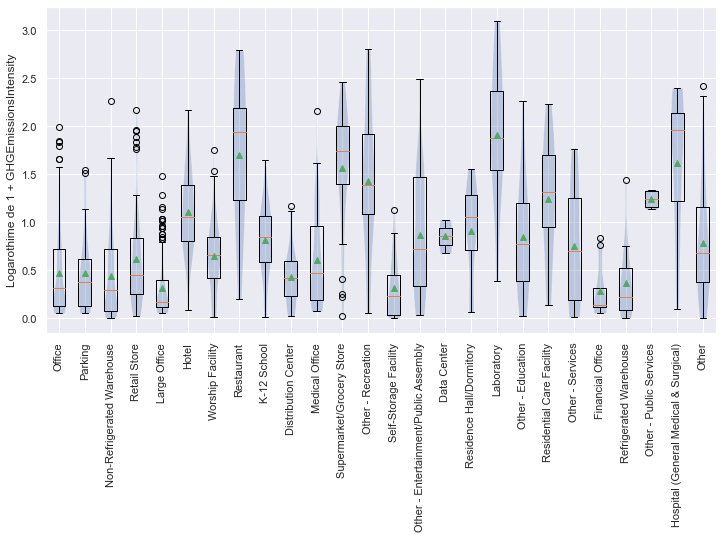

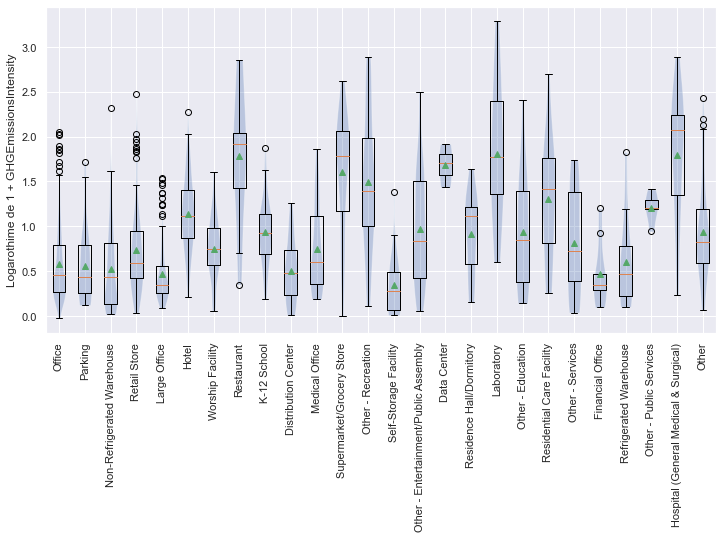

In [190]:
group_column = 'LargestPropertyUseTypeGr1'
feature = 'GHGEmissionsIntensity'

for k, data in datasets.items():
    df_tmp = [np.log1p(data[data[group_column] == g][feature]) for g in group_values if (data[group_column] == g).sum()]
    group_labels = [g for g in group_values if (data[group_column] == g).sum()]


    fig, ax = plt.subplots(figsize = (12,6))
    boxplot_violin(df_tmp)
    ax.set_xticklabels(group_labels, rotation = 'vertical')
    plt.ylabel("Logarothime de 1 + " + feature)
    plt.show()

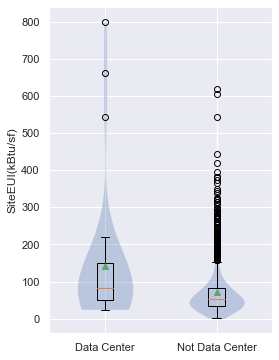

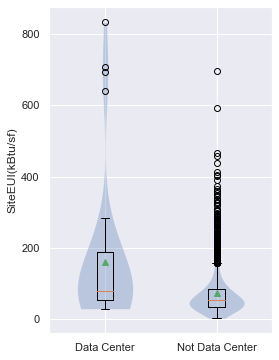

In [191]:
feature = 'SiteEUI(kBtu/sf)'
for k, data in datasets.items():
    select = (data['LargestPropertyUseType'] == 'Data Center') | (data['SecondLargestPropertyUseType'] == 'Data Center') | \
             (data['ThirdLargestPropertyUseType'] == 'Data Center') | \
             ([True if 'Data Center' in l else False for l in data['ListOfAllPropertyUseTypes']])
    df_tmp = [data[select][feature], data[~select][feature]]
    group_values = ['Data Center', 'Not Data Center']
    #display(data[group_column].value_counts())

    fig, ax = plt.subplots(figsize = (4,6))
    boxplot_violin(df_tmp)
    #plt.setp(ax, xticklabels=group_values)
    ax.set_xticklabels(group_values)
    plt.ylabel(feature)
    plt.show()

    data['HasDataCenter'] = np.where(select, 1, 0)

#### PublicBuilding, HasSwimmingPool, HasDataCenter

In [192]:
pd.concat([datasets["2015"]['PublicBuilding'].value_counts(), datasets["2015"]['HasSwimmingPool'].value_counts(),
           datasets["2015"]['HasDataCenter'].value_counts()], 
          axis = 1).join(
pd.concat([datasets["2016"]['PublicBuilding'].value_counts(), datasets["2016"]['HasSwimmingPool'].value_counts(),
           datasets["2016"]['HasDataCenter'].value_counts()], axis = 1), 
            lsuffix = "2015", rsuffix = "2016")

PublicBuilding2015  HasSwimmingPool2015  HasDataCenter2015  \
0                1310                 1380               1361   
1                  86                   16                 35   

   PublicBuilding2016  HasSwimmingPool2016  HasDataCenter2016  
0                1422                 1493               1472  
1                  92                   21                 42

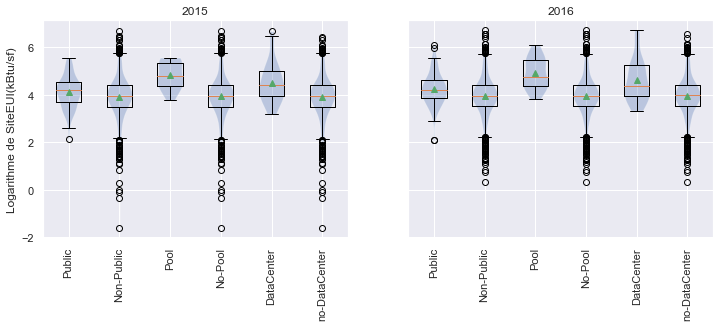

In [193]:
feature = 'SiteEUI(kBtu/sf)'

fig, ax = plt.subplots(1,2,figsize = (12,4), sharey = True)

for i, (k, data) in enumerate(datasets.items()):
    plt.axes(ax[i])
    boxplot_violin([np.log(data[data['PublicBuilding'] == 1][feature]), np.log(data[data['PublicBuilding'] == 0][feature]),
                    np.log(data[data['HasSwimmingPool'] == 1][feature]), np.log(data[data['HasSwimmingPool'] == 0][feature]),
                    np.log(data[data['HasDataCenter'] == 1][feature]), np.log(data[data['HasDataCenter'] == 0][feature])])
    ax[i].set_xticklabels(['Public', 'Non-Public', 'Pool', 'No-Pool', 'DataCenter', 'no-DataCenter'], rotation = 'vertical')
    if not i :
        plt.ylabel("Logarithme de " + feature)
    plt.title(k)
plt.show()

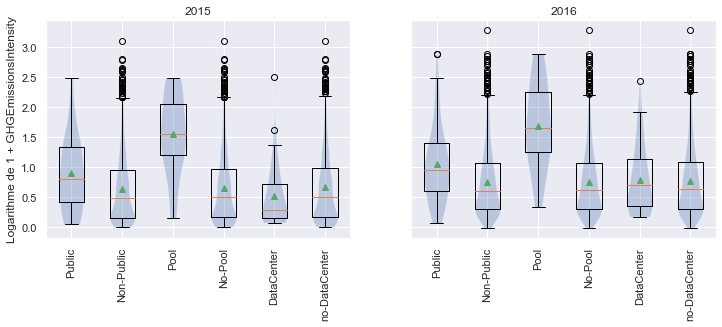

In [194]:
feature = 'GHGEmissionsIntensity'

fig, ax = plt.subplots(1,2,figsize = (12,4), sharey = True)

for i, (k, data) in enumerate(datasets.items()):
    plt.axes(ax[i])
    boxplot_violin([np.log1p(data[data['PublicBuilding'] == 1][feature]), np.log1p(data[data['PublicBuilding'] == 0][feature]),
                    np.log1p(data[data['HasSwimmingPool'] == 1][feature]), np.log1p(data[data['HasSwimmingPool'] == 0][feature]),
                    np.log1p(data[data['HasDataCenter'] == 1][feature]), np.log1p(data[data['HasDataCenter'] == 0][feature])])
    ax[i].set_xticklabels(['Public', 'Non-Public', 'Pool', 'No-Pool', 'DataCenter', 'no-DataCenter'], rotation = 'vertical')
    if not i :
        plt.ylabel("Logarithme de 1 + " + feature)
    plt.title(k)
plt.show()

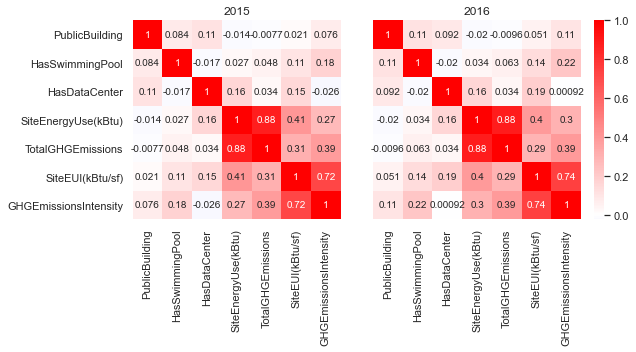

In [195]:
var = ['PublicBuilding', 'HasSwimmingPool', 'HasDataCenter',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity']
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (9,5), gridspec_kw={'width_ratios': [1, 1.25]})
for i, (k, data) in enumerate(datasets.items()) :
    corr = data[var].corr()
    sns.heatmap(corr, center = 0, cmap = 'bwr', annot = True, cbar = bool(i), ax = ax[i])
    ax[i].set_title(k)
plt.tight_layout(w_pad = 3)

In [196]:
features = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity']

var = ['PublicBuilding', 'HasSwimmingPool', 'HasDataCenter']
for k, data in datasets.items():
    X = datasets[k][var + features].copy()
    print("Dataset", k)
    for group_column in var:
        print("Eta Squared for", group_column)
        eta_2_list = []
        for feature in features :
            eta_2 = eta_squared(X[group_column], X[feature])
            eta_2_list.append(eta_2)
            print(feature, eta_2 , sep = '\t\t')
        print()

Dataset 2015
Eta Squared for PublicBuilding
SiteEnergyUse(kBtu)		0.00020443026549096384
TotalGHGEmissions		6.0022615614894316e-05
SiteEUI(kBtu/sf)		0.0004487506285277748
GHGEmissionsIntensity		0.005775483562576545

Eta Squared for HasSwimmingPool
SiteEnergyUse(kBtu)		0.0007222887189831072
TotalGHGEmissions		0.002348473433450393
SiteEUI(kBtu/sf)		0.011081857090130695
GHGEmissionsIntensity		0.03189957336639229

Eta Squared for HasDataCenter
SiteEnergyUse(kBtu)		0.027026120303393315
TotalGHGEmissions		0.0011729103160811841
SiteEUI(kBtu/sf)		0.023246032956508834
GHGEmissionsIntensity		0.0006505650145074001

Dataset 2016
Eta Squared for PublicBuilding
SiteEnergyUse(kBtu)		0.00040828696242290374
TotalGHGEmissions		9.283861264666129e-05
SiteEUI(kBtu/sf)		0.0026362695679417432
GHGEmissionsIntensity		0.012190475693467604

Eta Squared for HasSwimmingPool
SiteEnergyUse(kBtu)		0.0011787909573863472
TotalGHGEmissions		0.003924252192266063
SiteEUI(kBtu/sf)		0.020441184371066158
GHGEmissionsIntensity

#### PropertyUseTypeGFA Fractions and NumberofPropertyUseTypes

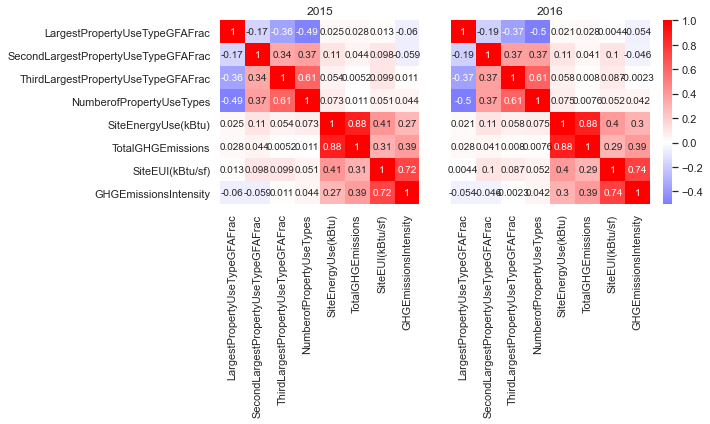

In [197]:
var = ['LargestPropertyUseTypeGFAFrac', 'SecondLargestPropertyUseTypeGFAFrac', 'ThirdLargestPropertyUseTypeGFAFrac',
       'NumberofPropertyUseTypes', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity']
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (10,6), gridspec_kw={'width_ratios': [1, 1.25]})
for i, (k, data) in enumerate(datasets.items()) :
    corr = data[var].corr()
    sns.heatmap(corr, center = 0, cmap = 'bwr', annot = True, cbar = bool(i), ax = ax[i])
    ax[i].set_title(k)
plt.tight_layout(w_pad = 3)

<a id="Section7.2.5"></a>

### 7.2.5 Sources d'Energie

In [198]:
pd.concat([datasets["2015"]['UseofSteam'].value_counts(), datasets["2015"]['UseofNaturalGas'].value_counts()], 
          axis = 1).join(
pd.concat([datasets["2016"]['UseofSteam'].value_counts(), datasets["2016"]['UseofNaturalGas'].value_counts()], axis = 1), 
            lsuffix = "2015", rsuffix = "2016")

UseofSteam2015  UseofNaturalGas2015  UseofSteam2016  UseofNaturalGas2016
0            1290                  409            1404                  439
1             106                  987             110                 1075

In [199]:
pd.DataFrame(datasets["2015"][['UseofSteam', 'UseofNaturalGas']].value_counts()).join(
pd.DataFrame(datasets["2016"][['UseofSteam', 'UseofNaturalGas']].value_counts()), lsuffix = "_2015", rsuffix = "_2016")

0_2015  0_2016
UseofSteam UseofNaturalGas                
0          1                   931    1014
           0                   359     390
1          1                    56      61
           0                    50      49

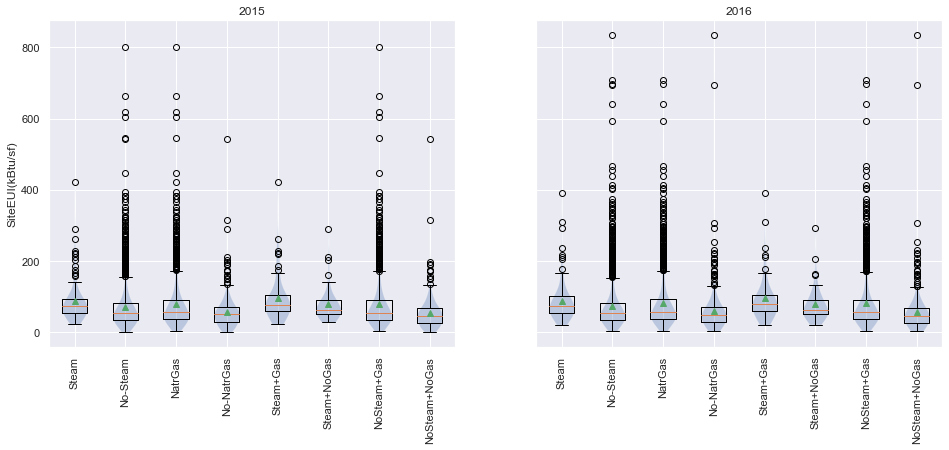

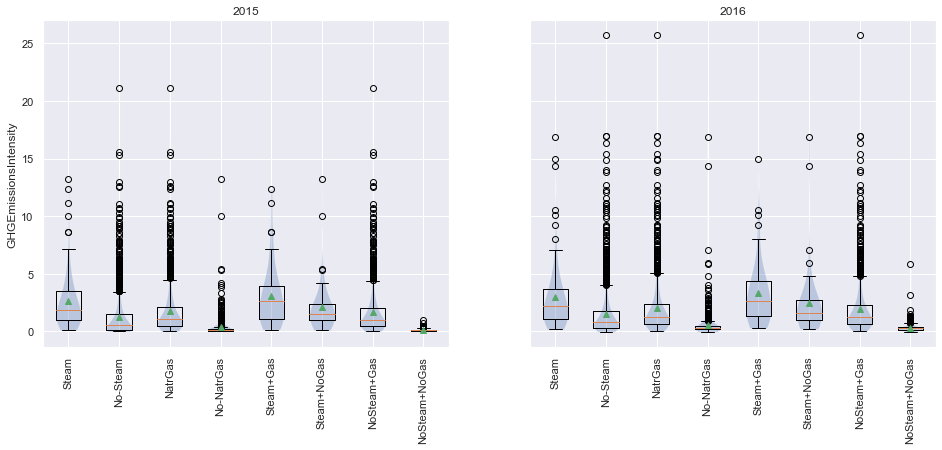

In [200]:
features = ['SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity']

for feature in features :
    fig, ax = plt.subplots(1,2,figsize = (16,6), sharey = True)

    for i, (k, data) in enumerate(datasets.items()):
        plt.axes(ax[i])
        boxplot_violin([data[data['UseofSteam'] == 1][feature], data[data['UseofSteam'] == 0][feature],
                        data[data['UseofNaturalGas'] == 1][feature], data[data['UseofNaturalGas'] == 0][feature],
                        data[(data['UseofNaturalGas'] == 1) & (data['UseofSteam'] == 1)][feature], 
                        data[(data['UseofNaturalGas'] == 0) & (data['UseofSteam'] == 1)][feature],
                        data[(data['UseofNaturalGas'] == 1) & (data['UseofSteam'] == 0)][feature],
                        data[(data['UseofNaturalGas'] == 0) & (data['UseofSteam'] == 0)][feature]])
        ax[i].set_xticklabels(['Steam', 'No-Steam', 'NatrGas', 'No-NatrGas', 
                               'Steam+Gas', 'Steam+NoGas', 'NoSteam+Gas', 'NoSteam+NoGas'], 
                               rotation = 'vertical')
        if not i :
            plt.ylabel(feature)
        plt.title(k)
    plt.show()

In [201]:
features = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity']

var = ['EnergySources']

for k, data in datasets.items():
    datasets[k]['EnergySources'] = np.where(data['UseofSteam'] == 0, np.where(data['UseofNaturalGas'] == 0, 0, 1), np.where(data['UseofNaturalGas'] == 0, 2, 3)).T
    X = datasets[k][var + features].copy()
    print("Dataset de", k)
    for group_column in var:
        print("Eta Squared pour", group_column)
        eta_2_list = []
        for feature in features :
            eta_2 = eta_squared(X[group_column], X[feature])
            eta_2_list.append(eta_2)
            print(feature, eta_2 , sep = '\t\t')
        print()

Dataset de 2015
Eta Squared pour EnergySources
SiteEnergyUse(kBtu)		0.05818221370816257
TotalGHGEmissions		0.08948177721683918
SiteEUI(kBtu/sf)		0.028723894364387534
GHGEmissionsIntensity		0.15005170390686176

Dataset de 2016
Eta Squared pour EnergySources
SiteEnergyUse(kBtu)		0.05737918658007591
TotalGHGEmissions		0.08568921497550551
SiteEUI(kBtu/sf)		0.021706850181578034
GHGEmissionsIntensity		0.12833695814420046



<a id="Section7.2.6"></a>

### 7.2.6 Emissions de CO2 et EnergyStarScore

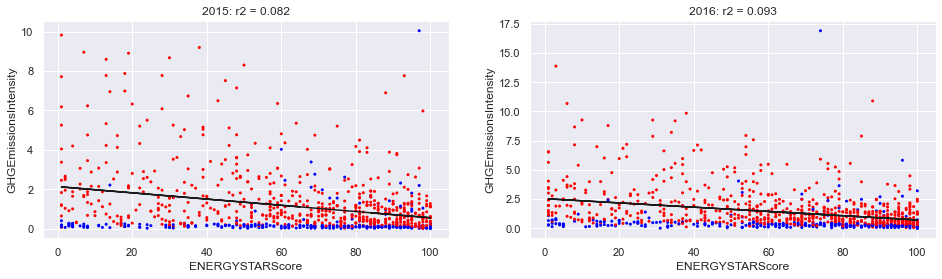

In [202]:
from scipy import stats

var_x = 'ENERGYSTARScore'
var_y = 'GHGEmissionsIntensity'
var_c = 'UseofNaturalGas'

fig, ax = plt.subplots(1, 2, figsize = (16,4))

for i, (k, data) in enumerate(datasets.items()):
    x = data[var_x].dropna()
    y = data[~data[var_x].isna()][var_y]
    c = data[~data[var_x].isna()][var_c]
    res = stats.linregress(x, y)

    plt.axes(ax[0+i])
    plt.scatter(x, y, c=c, cmap = 'bwr', vmax = 0.5, marker = '.', linewidth = 0)
    plt.plot(x, x*res.slope + res.intercept, color = 'k' )
    ax[0+i].set_xlabel(var_x)
    ax[0+i].set_ylabel(var_y)
    plt.title(f"{k}: r2 = {res.rvalue**2:.3f}")

<a id="Section7.2.7"></a>

### 7.2.7 Interdépendences des Variables Paramètres

#### Covariance

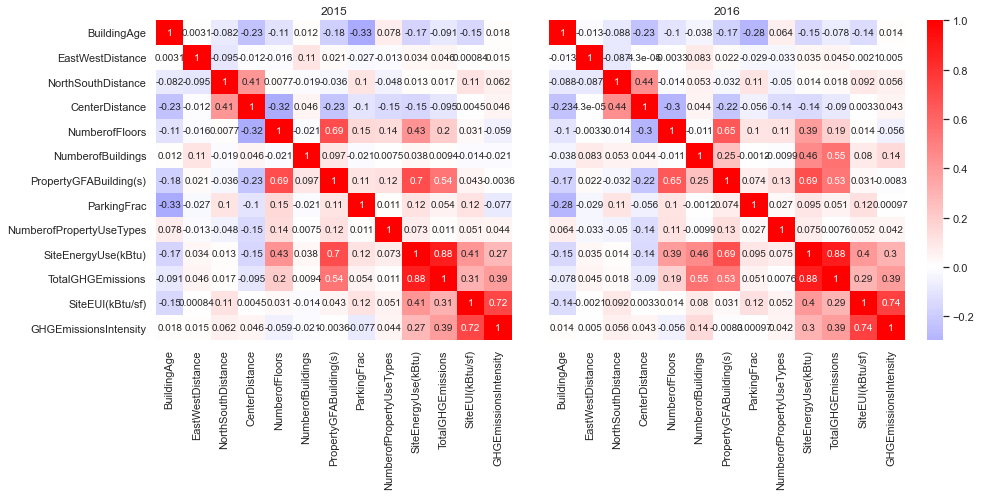

In [203]:
var = ['BuildingAge', 'EastWestDistance', 'NorthSouthDistance', 'CenterDistance',
       'NumberofFloors', 'NumberofBuildings', 'PropertyGFABuilding(s)', 'ParkingFrac', 'NumberofPropertyUseTypes',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity']
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (14,7), gridspec_kw={'width_ratios': [1, 1.25]})
for i, (k, data) in enumerate(datasets.items()) :
    corr = data[var].corr()
    sns.heatmap(corr, center = 0, cmap = 'bwr', annot = True, cbar = bool(i), ax = ax[i])
    ax[i].set_title(k)
plt.tight_layout(w_pad = 3)

#### Eta Carré

In [204]:
features = ['PropertyGFABuilding(s)', 'ParkingFrac', 'NumberofFloors', 'BuildingAge']

var = ['PrimaryPropertyType', 'LargestPropertyUseType', 'DecadeBuilt', 'Neighborhood',
       'PublicBuilding', 'HasSwimmingPool', 'HasDataCenter']
for k, data in datasets.items():
    X = datasets[k][var + features].copy()
    print("Dataset de", k)
    for group_column in var:
        print("Eta Squared pour", group_column)
        eta_2_list = []
        for feature in features :
            eta_2 = eta_squared(X[X[group_column] != 'Other'][group_column], X[X[group_column] != 'Other'][feature])
            eta_2_list.append(eta_2)
            print(feature, eta_2 , sep = '\t\t\t')
        print()

Dataset de 2015
Eta Squared pour PrimaryPropertyType
PropertyGFABuilding(s)			0.3467870832751531
ParkingFrac			0.21381762104981206
NumberofFloors			0.35327072213042954
BuildingAge			0.09896638982898444

Eta Squared pour LargestPropertyUseType
PropertyGFABuilding(s)			0.36168770087432733
ParkingFrac			0.4184805310918707
NumberofFloors			0.36332685669586817
BuildingAge			0.14371728312977414

Eta Squared pour DecadeBuilt
PropertyGFABuilding(s)			0.06110194882324147
ParkingFrac			0.15083124727729655
NumberofFloors			0.07146880797987036
BuildingAge			0.9923494571212677

Eta Squared pour Neighborhood
PropertyGFABuilding(s)			0.0804433401236278
ParkingFrac			0.08184827875731575
NumberofFloors			0.23376231441287787
BuildingAge			0.10180818811460744

Eta Squared pour PublicBuilding
PropertyGFABuilding(s)			1.5394723826690873e-08
ParkingFrac			0.003561290062646483
NumberofFloors			0.0027823707537592917
BuildingAge			0.003002368097620541

Eta Squared pour HasSwimmingPool
PropertyGFABuilding(s)			

#### Test de Chi2

Measure (for 2015): 1255.1854560953332
Measure (for 2016): 1352.9266634532007


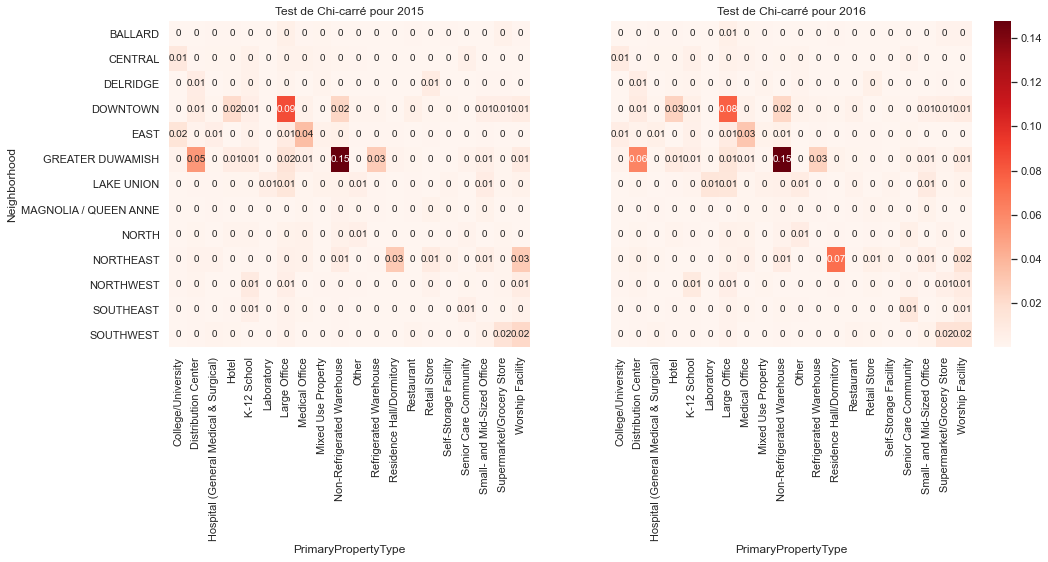

In [205]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (16,6), gridspec_kw={'width_ratios': [1, 1.25]})
  
for i, (k, data) in enumerate(datasets.items()) :   
    cont = data[['Neighborhood','PrimaryPropertyType']].pivot_table(
            index='Neighborhood',columns='PrimaryPropertyType',aggfunc=len,margins=True,margins_name="Total")
    tx = pd.DataFrame(cont['Total'])
    ty = pd.DataFrame(cont.T['Total'])
    tx.columns = ["foo"]
    ty.columns = ["foo"]
    n = tx.iloc[-1]["foo"]
    indep = tx.dot(ty.T) / n
    c = cont.fillna(0) # Null values are replaced by 0
    measure = (c-indep)**2/indep
    xi_n = measure.sum().sum()
    
    print(f"Measure (for {k}): {xi_n}")
    sns.heatmap((measure/xi_n).iloc[:-1,:-1], annot=round((measure/xi_n).iloc[:-1,:-1], 2), cmap="Reds", cbar = i, 
                ax = ax[i])
    ax[i].set_title("Test de Chi-carré pour " + k)
    if i :
        ax[i].set_ylabel(None)
plt.show()

Measure (for 2015): 567.1740710698306
Measure (for 2016): 567.1740710698306


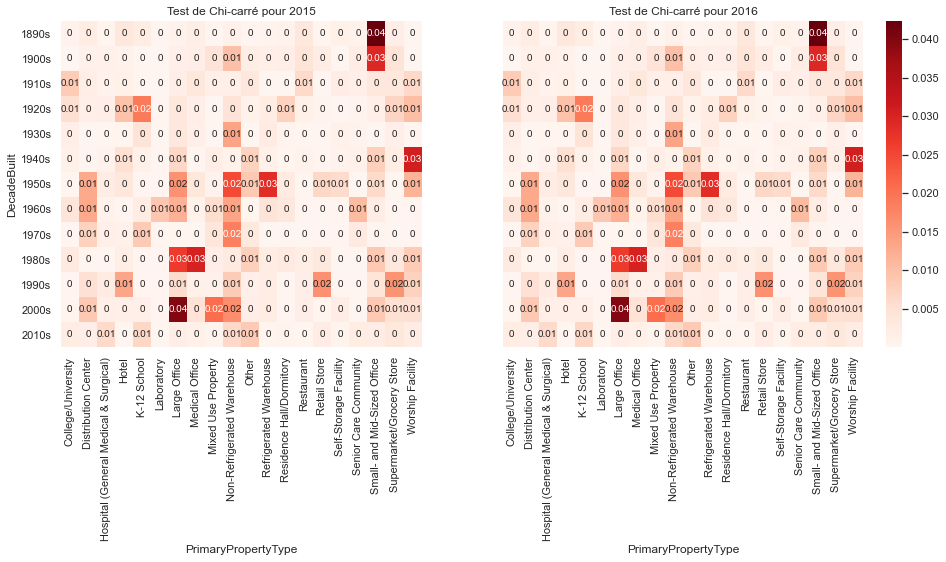

In [206]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (16,6), gridspec_kw={'width_ratios': [1, 1.25]})
  
for i, (k, data) in enumerate(datasets.items()) :   
    cont = datasets["2015"][['DecadeBuilt','PrimaryPropertyType']].pivot_table(
           index='DecadeBuilt',columns='PrimaryPropertyType',aggfunc=len,margins=True,margins_name="Total")
    tx = pd.DataFrame(cont['Total'])
    ty = pd.DataFrame(cont.T['Total'])
    tx.columns = ["foo"]
    ty.columns = ["foo"]
    n = tx.iloc[-1]["foo"]
    indep = tx.dot(ty.T) / n
    c = cont.fillna(0) # Null values are replaced by 0
    measure = (c-indep)**2/indep
    xi_n = measure.sum().sum()
    
    print(f"Measure (for {k}): {xi_n}")
    sns.heatmap((measure/xi_n).iloc[:-1,:-1], annot=round((measure/xi_n).iloc[:-1,:-1], 2), cmap="Reds", cbar = i, 
                ax = ax[i])
    ax[i].set_title("Test de Chi-carré pour " + k)
    if i :
        ax[i].set_ylabel(None)
plt.show()

### 7.2.7 Résumé - Variables Paramètres

 #### Les Paramètres les Plus Importants
En regardent les corrélations entre les variables target et les variables paramètre (covariance matrix et eta-carré), les variables paramètres les plus déterminant pour la consommation d'énergie et l'émission de CO2 sont:
* **la surface du bâtiment** ('PropertyGFABuilding(s)')
* **le type d'utilisation du bâtiment** ('PrimaryPropertyType' et 'LargestPropertyUseType') (Si on ne prend pas en compte la catégorie 'Other').

#### Les Paramètres avec une Variance Minimale
Certaines variables paramètre ont une variance très faible, dont certains peuvent quand même influencer significativement la consommation d'énergie et/ou l'emission de CO2 :
* **nombre de bâtiments** ('NumberofBuildings') - il y a que 5 et 37 propriétés pour les datasets 2015 et 2016, qui ont plus qu'un bâtiment (après le prémier nettoyage). De plus cette variable n'est pas très fiable. 33 des 37 propriétés notées avec plus qu'un bâtiment en 2016 était notées avec seulement un bâtiment en 2015. On ne va pas prendre cette variable en considération.
* **a une piscine** ('HasSwimmingPool') - il y a que 16 et 21 propriétés qui ont indiqué qu'ils ont une piscine en 2015 et 2016. C'est un nombre assez faible (un peu plus de 1% des bâtiments). Cependent, cette variable peut influencer la consommation d'énergie significativement.
* **catégories d'utilisation** - certains catégories d'utilisation ne sont pas très bien représenter dans les datasets, même après avoir fait un regroupement. Cependent certains peuvent avoir une influence assez forte sur des variables target.
    * il n'y a pas beaucoup de **Data Center** dans le dataset, cependent cette type d'utilisation est caractèristique pour une consommation énergitique très élévée en comparison avec les autres types d'utilisation. 
        * 2 / 3 propriétés ont un data center comme l'utilisation majeur en 2015 / 2016
        * 21 / 28 propriétés ont un data center dans un des trois plus le importants types d'utilisation en 2015 / 2016
        * 35 / 42 proprietés ont noté qu'ils ont un data center

#### Interdépendences entre les Variables
En normalisant la consommation d'énergie et l'emission de CO2 par la surface du bâtiment, on essaie à déterminer les paramètres à part la surface de la propriété et le type d'utilisation qui peuvent les influencer:
* Le percentage de parking, l'âge de bâtiment et le emplacement Nord-Sud ont l'air d'être de jouer un rôle dans la consommation d'énergie par surface d'un bâtiment.
* Mais ces variables ont des corrélations entre eux. C'est alors pas évident de dire lesquelles de ces variables vraiment déterminent la consommation d'énergie. (De plus, corrélation ne signifie pas causalité.)                                     
* On voit aussi qu'il y a des interdépendances entre les différents variables, par examples :
    * Une propriété avec plus de bâtiment et/ou étages a une tendence d'avoir une surface plus grande et donc une consommation d'énergie plus élévée.
    * Les bâtiments plus proche du centre ville ont une tendence d'avoir plus des étages. De même, ils ont une tendence d'être plus vieux.
    * Les bâtiments construits dans les années 1890s et 1900s sont aujourd'hui principalement utilisés comme bureaux de taille médium ou petite. Cependent les bureaux grands sont plutôt construits dans les années 1980s et 2000s est sont localisés dans le quartier 'Downtown'.
    * Les bâtiments utilisé comme dépot ou centre de distribution se trouvent principalement dans le quartier 'Greater Duwamish'.

<a id="Section8"></a>

# 8. Cohérence entre les Deux Années

Pour les entrées qui restent, on va regarder les caractéristiques des propriétés qui ne doivent normalement pas changées d'année à année. Un très grand changement indique que au moins une des deux entrées n'était pas bien saisie. Car la surface d'une propriété joue un rôle significant pour la consommation d'énergie et l'émission de CO2, on va vérifier qu'elle ne change pas de plus de 20%.

In [207]:
var = ['Latitude', 'Longitude']
loc_lim = 500
loc_change_id = (data_comparison(datasets["2015"], datasets["2016"], var, id_var, get_distance) > loc_lim)

var = ['PropertyGFATotal', 'PropertyGFABuilding(s)']
gfa_lim = 0.2
gfa_change_id = pd.DataFrame()
for v in var:
    gfa_change_id = pd.concat([gfa_change_id, 
                               abs(data_comparison(datasets["2015"], 
                                                   datasets["2016"], v, id_var, get_frac_difference)).fillna(0)], axis = 1)
gfa_change_id = ((gfa_change_id > gfa_lim)).sum(axis=1) > 0

var = ['NumberofBuildings']
build_lim = 1
building_change_id = (abs(data_comparison(datasets["2015"], datasets["2016"], var, id_var)) > build_lim )

var = ['NumberofFloors']
floor_lim = 1
floor_change_id = (abs(data_comparison(datasets["2015"], datasets["2016"], var, id_var)) > floor_lim)

print(f"{(loc_change_id).sum()} propriétés ont un grand changement sur leur emplacement (>{loc_lim}m)")
print(f"{(building_change_id).sum()} propriétés changent leur nombre de bâtiments de plus de {build_lim}.")
print(f"{(floor_change_id).sum()} propriétés changent leur nombre d'étage de plus de {floor_lim}.")
print(f"{(gfa_change_id).sum()} propriétés ont un changement de plus de {100*gfa_lim}% de leur surface.")
print(f"{(loc_change_id | building_change_id | floor_change_id | gfa_change_id).sum()} propriétés ont un grand changement " +\
        "pour au moins une de ces variables.")

3 propriétés ont un grand changement sur leur emplacement (>500m)
19 propriétés changent leur nombre de bâtiments de plus de 1.
0 propriétés changent leur nombre d'étage de plus de 1.
21 propriétés ont un changement de plus de 20.0% de leur surface.
41 propriétés ont un grand changement pour au moins une de ces variables.


In [208]:
select = gfa_change_id
select = select[select == True].index
for k, data in datasets.items():
    datasets[k].drop(index = data[data[id_var].isin(select)].index, inplace = True, errors = 'ignore')
    print(f"Après le deuxième nettoyage on a {datasets[k].shape[0]} entrées pour l'année {k}.")

Après le deuxième nettoyage on a 1375 entrées pour l'année 2015.
Après le deuxième nettoyage on a 1493 entrées pour l'année 2016.


<a id="Section9"></a>

# 9. Combinaison des Deux Datasets

On prendre le moyen des deux datasets quand de l'information pour les deux années. 

In [209]:
for k, data in datasets.items():
    print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1375 entries, 0 to 3334
Data columns (total 59 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   OSEBuildingID                        1375 non-null   int64   
 1   DataYear                             1375 non-null   int64   
 2   BuildingType                         1375 non-null   object  
 3   PrimaryPropertyType                  1375 non-null   object  
 4   PropertyName                         1375 non-null   object  
 5   CouncilDistrictCode                  1375 non-null   string  
 6   Neighborhood                         1375 non-null   object  
 7   YearBuilt                            1375 non-null   int64   
 8   NumberofBuildings                    1375 non-null   float64 
 9   NumberofFloors                       1375 non-null   float64 
 10  PropertyGFATotal                     1375 non-null   float64 
 11  PropertyGFAParkin

In [210]:
common_id = datasets["2015"].set_index(id_var)[datasets["2015"].set_index(id_var).index.isin(
            datasets["2016"].set_index(id_var).index)].index
print(len(common_id))

1329


In [211]:

var = ['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
type_change_id = (pd.DataFrame(np.transpose(display_variable_changes(datasets["2015"], datasets["2016"], var, id_var)), 
                  columns = [v + '_Change' for v in var], index = common_id).sum(axis = 1) > 0)

duplicate_id_list = list(set(type_change_id[type_change_id == False].index.values) )
                         #&\
                         #set(loc_change_id[loc_change_id == False].index.values) &\
                         #set(gfa_change_id[gfa_change_id == False].index.values)) #&\
                         #set(building_change_id[building_change_id == False].index.values))

num_columns = ['Latitude', 'Longitude', 'EastWestDistance', 'NorthSouthDistance', 'CenterDistance',
               'DataYear','YearBuilt', 'BuildingAge',
               'NumberofBuildings', 'NumberofFloors', 
               'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'NumberofPropertyUseTypes',
               'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
               'LargestPropertyUseTypeGFAFrac', 'SecondLargestPropertyUseTypeGFAFrac', 'ThirdLargestPropertyUseTypeGFAFrac',
               'ParkingPropertyUseTypeGFA', 'BuildingPropertyUseTypeGFA', 'TotalPropertyUseTypeGFA',
               'HasSwimmingPool', 'HasDataCenter', 'PublicBuilding',
               'UseofSteam', 'UseofNaturalGas', 
               'ParkingFrac','GFAperFloor', 'GFAperBuilding',
               'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 
               'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'EnergyUseDifference(kBtu)', 
               'TotalGHGEmissions', 'GHGEmissionsIntensity']


data_all = pd.concat([datasets["2015"][datasets["2016"].columns], datasets["2016"]], axis = 0
                     ).sort_values(['DataYear', 'OSEBuildingID'])

#only use the mean, if the use types did not change between the two years
duplicate_mean = data_all.loc[data_all[id_var].isin(duplicate_id_list),
                              [id_var] + num_columns].groupby(id_var).mean()
duplicate_mean = duplicate_mean.append(data_all.loc[~data_all[id_var].isin(duplicate_mean.index), [id_var] + num_columns
                                                    ].drop_duplicates(subset=['OSEBuildingID'], keep='last').set_index(id_var))

duplicate_building = data_all.drop_duplicates(subset=['OSEBuildingID'], keep='last').drop(num_columns, axis=1).set_index(id_var)

datasets["Combined"] = pd.merge(duplicate_building, duplicate_mean, how='left', on='OSEBuildingID'
                                ).sort_values(['OSEBuildingID']).reset_index()

#print(datasets["Combined"].shape, datasets["2015"].shape, datasets["2016"].shape, len(common_id))

   0 bâtiments changent le BuildingType
  25 bâtiments changent le PrimaryPropertyType
  19 bâtiments changent le LargestPropertyUseType
  36 bâtiments changent le SecondLargestPropertyUseType
  20 bâtiments changent le ThirdLargestPropertyUseType
  59 bâtiments changent un de ces variables


In [212]:
display(datasets["Combined"].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 59 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   OSEBuildingID                        1539 non-null   int64   
 1   BuildingType                         1539 non-null   object  
 2   PrimaryPropertyType                  1539 non-null   object  
 3   PropertyName                         1539 non-null   object  
 4   Address                              1539 non-null   object  
 5   City                                 1539 non-null   object  
 6   State                                1539 non-null   object  
 7   ZipCode                              1526 non-null   object  
 8   CouncilDistrictCode                  1539 non-null   string  
 9   Neighborhood                         1539 non-null   object  
 10  ListOfAllPropertyUseTypes            1539 non-null   object  
 11  LargestPropertyUs

None

* En totale, on a 1539 propriétés pour faire la modélisation.
* Tous les variables sont non-null à 100% sauf l'ENERGYSTARScore qui est rempli à 66%.

<a id="Section9.1"></a>

## 9.1. Export des Données

In [213]:
for k, data in datasets.items():
    filename = 'BuildingsEnergyBenchmarking' + k + 'Cleaned'
    data.to_csv(os.getcwd() + '\\' + filename)